In [3]:
import matplotlib.pyplot as pyplot
import numpy

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
xs = numpy.arange(0, 800, .1)

def histograma(rs, filter):
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(rs)
    kde.covariance_factor = lambda: filter
    kde._compute_covariance()
    return kde(xs)

def histograma_lognormal(rs):
    from pyqt_fit import kde, kde_methods
    est = kde.KDE1D(rs, method=kde_methods.linear_combination)
    return est(xs)

In [32]:
def chart_result(rs, color_hex, title, correct):
    color = matplotlib.colors.colorConverter.to_rgb
    color = color(color_hex)
    pyplot.xlim(250,320)
    median = 280
    rs_all = []
    for i, t in enumerate(rs):
        d = t['data']
        n = len(d)
        dev = numpy.std(t['data'])
        med = numpy.median(t['data'])
        v = t['browser_version']

        diff = median - med
        if correct:
            d = [e + diff for e in d]
            diff = 0
            
        rs_all += d

        label = "v. %s (n=%.0f, std=%.0f, med=%.0f)" % (v, n, dev, med)
        alpha = (i+1.0) / (len(rs)+1)
        pyplot.fill_between(xs, histograma(d, .125), facecolor=color, linewidth=0, alpha=alpha)
        print "v.%s \t dev=%.0f ms \t med.=%.0f ms (Δ=%.0f ms)" % (v, dev, med, diff)

    dev = numpy.std(rs_all)
    med = numpy.median(rs_all)
    total = "Tot. \t dev=%.0f ms \t med.=%.0f ms" % (dev, med)
    print len(total) * "-"
    print total
    pyplot.fill_between(xs, histograma_lognormal(rs_all), facecolor=color, linewidth=0, alpha=.9)
    pyplot.title(title)
    pyplot.show()

# Measuring latency in the browser

In [26]:
tests_chrome_w7 = [{'data': [272,272,270,273,276,270,276,291,277,270,274,275,279,273,276,278,277,277,267,274,281,272,266,266,283,266,268,267,270,268,270,268,272,276,278,275,274,274,274,279,270,269,265,266,268,279,268,272,273,272,278,278,276,275,277,298,275,272,276,282,270,270,276,279,268,269,268,275,278,277,277,276,281,275,274,280,279,270,269,275,280,283,278,280,269,279,266,277,277,274,279,279,273,265,279,279,276,284,279,266,274,272,279,275,279,286,291,275,276,275,280,281,280,279,277,269,281,274,273,266,268,273,272,275,269,275,272,276,281,270,270,278,276,268,279,274,277,280,272,278,276,273,274,272,284,279,267,268,298,269,276,269,268,268,271,266,270,266,267,270,267,268,267,275,267,271,269,273,268,275,276,268,274,271,271,271,267,272,270,276,267,269,273,268,267,275,264,277,274,278,269,268,279,281,268,278,282,278,274,272,273,268,274,272,274,269,294,276,268,269,276,268,278,272,274,277,277,275,275,278,267,267,277,278,270,280,274,275,274,275,270,269,272,268,281,278,286,273,277,271,276,270,266,267,274,280,278,270,273,268,277,269,266,273,277,270,269,275,270,274,273,277,272,266,272,278,273,272,269,345,275,276,270,268,269,296,268,285,270,271,279,275,273,272,272,278,267,290,269,266,271,265,267,269,268,275,272,273,273,278,271,272,278,267,269,269,271,281,274,270,275,266,277,271,275,268,272,273,278,280,265,278,275,272,272,264,272,271,275,270,273,275,276,270,281,272,276,279,264,274,274,274,279,271,274,272,275,272,277,277,270,267,282,279,267,274,304,270,268,268,284,281,279,279,280,277,271,276,268,316,274,279,270,273,284,268,273,269,272,264,274,278,278,277,265,265,269,268,266,268,270,267,266,266,266,276,285,267,279,277,282,272,275,272,297,271,271,269,268,267,275,267,278,275,280,281,278,280,270,278,270,276,267,274,274,270,279,279,277,274,274,272,271,277,279,278,278,277,273,273,280,268,271,271,270,270,265,268,276,274,278,274,279,279,270,276,269,277,275,271,272,279,273,272,277,277,266,276,287,279,275,281,275,278,278,276,270,273,274,274,266,277,277,273,266,273,274,277,279,279,271,277,277,276,280,267,271,272,271,277,274,278,274,273,269,272,269,275,284,294,267,269,266,276,270,272,276,269,267,267,270,266,274,283,280,269,270,272,269,276,281,268,270,274,278,279,278,265,266,269,269,283,268,278,271,278,268,275,275,285,275,269,273,272,270,271,278,274,278,275,278,280,278,277,277,275,274,271,280,279,276,267,273,273,273,275,281,275,270,273,272,266,266,265,270,276,281,272,272,277,273,277,278,268,278,336,295,273,266,274,269,270,275,281,277,269,275,279,270,269,269,270,267,269,275,271,278,275,266,291,270,275,272,280,274,272,271,277,266,276,272,271,280,281,273,277,268,270,272,273,285,278,277,279,268,267,269,269,273,284,280,279,292,278,269,266,274,274,273,268,276,270,266,277,280,274,273,273,279,272,284,282,277,277,275,283,274,274,280,272,271,277,267,276,273,274,273,267,272,279,266,273,268,276,275,272,274,279,277,267,276,277,280,280,270,272,272,272,272,282,275,275,275,286,281,272,277,276,270,275,267,280,280,281,271,278,280,267,274,277,268,273,271,268,346,275,273,276,272,271,268,272,267,269,268,267,269,268,269,282,270,268,272,276,273,269,274,273,268,268,267,268,266,285,266,266,269,266,268,266,264,273,274,265,284,271,266,267,272,267,323,267,275,275,274,273,274,279,275,266,270,274,269,272,269,266,271,280,265,278,271,272,275,281,272,272,282,268,277,285,279,281,273,280,278,288,278,269,274,275,278,275,270,278,280,271,270,277,271,277,268,273,278,276,283,276,269,267,272,273,278,280,268,277,271,277,275,274,268,272,272,279,287,274,276,274,279,276,273,271,267,269,274,264,268,278,269,277,273,274,280,269,276,290,277,267,283,268,278,271,276,276,270,275,276,271,271,269,267,280,275,275,274,273,271,271,271,268,276,273,266,274,273,278,270,271,274,270,281,268,269,273,278,272,273,270,271,276,266,266,279,266,265,287,271,265,270,270,274,279,275,268,272,278,273,273,267,266,273,278,270,268,269,276,269,274,274,276,272,276,276,267,277,307,269,271,276,266,266,278,270,277,268,270,268,269,267,266,277,274,272,275,274,283,266,277,283,270,272,268,277,265,274,277,278,278,272,268,269,268,279,290,273,271,280,279,272,269,268,276], 'browserstack.debug': True, 'os_version': '7', 'browser_version': 33, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [281,284,279,278,277,278,278,277,280,280,281,277,281,284,284,281,276,280,286,281,276,282,280,283,282,276,288,303,278,296,278,277,278,278,279,279,279,281,279,277,277,278,278,277,278,276,277,277,302,277,306,281,278,278,279,279,280,277,278,282,279,279,284,281,286,281,285,282,280,280,279,280,296,281,292,282,280,282,287,307,283,283,279,279,279,279,279,277,280,286,284,279,277,286,286,278,283,284,288,282,282,289,280,278,278,284,384,281,278,278,283,279,284,281,278,279,280,282,286,305,282,283,280,277,284,284,277,287,287,278,312,280,280,281,280,283,283,286,286,279,284,286,285,279,285,283,284,291,284,279,279,284,281,280,286,277,285,279,279,309,288,283,296,287,280,278,280,278,283,281,282,281,286,287,280,284,277,286,283,281,280,288,284,285,279,282,285,288,278,278,278,277,279,280,284,280,279,280,280,279,280,281,277,281,280,285,278,278,280,281,286,283,279,281,282,291,284,283,289,285,284,283,288,283,291,284,283,279,281,278,277,284,297,277,281,279,281,277,277,280,281,280,281,280,284,279,279,279,290,278,285,279,278,282,281,278,280,284,282,284,285,279,283,283,276,281,286,280,288,278,296,283,279,287,280,290,280,283,285,282,281,281,286,284,283,281,277,285,279,283,286,279,282,280,297,282,280,279,278,280,279,285,287,289,281,278,281,281,278,278,284,281,306,279,285,279,287,282,278,283,276,278,280,285,279,288,281,280,277,282,285,281,283,278,278,281,283,279,291,282,288,278,279,283,281,278,283,286,283,283,279,278,278,282,303,288,282,277,282,281,279,279,286,288,283,289,280,282,281,287,285,278,281,281,280,279,278,282,284,279,288,283,284,284,284,280,280,280,287,279,283,283,308,277,286,291,281,277,282,276,277,280,289,296,291,282,280,287,283,280,289,290,289,294,284,282,288,286,290,283,283,291,288,287,284,290,290,303,292,283,278,279,281,282,280,280,279,277,276,283,277,278,287,285,279,290,285,278,276,280,280,280,280,277,284,283,292,285,280,281,303,286,285,276,278,286,278,281,289,285,285,283,284,298,292,285,288,283,288,292,277,284,278,284,280,304,284,285,286,288,311,287,283,287,283,282,289,282,288,280,307,285,286,287,288,282,290,289,297,288,287,280,287,292,288,282,286,283,281,280,278,276,278,288,286,276,282,283,283,286,289,282,281,284,280,287,290,278,281,291,283,285,289,290,283,284,283,284,283,291,288,278,290,282,281,282,287,290,282,278,288,281,284,284,282,282,281,278,278,276,290,277,277,278,278,278,288,283,279,282,278,285,278,279,289,286,276,288,285,284,278,281,287,285,287,282,285,285,280,290,278,286,281,285,289,283,278,287,282,278,285,282,276,278,309,278,283,284,277,290,285,283,277,278,278,284,278,277,283,284,285,283,281,286,285,280,284,276,289,287,281,280,277,276,283,278,283,280,280,281,284,279,288,277,278,278,277,276,277,280,279,278,277,279,278,277,279,276,278,289,278,283,284,278,278,278,281,285,277,277,280,279,284,276,279,337,280,282,283,280,280,283,283,286,285,281,279,284,278,277,286,284,287,278,285,281,283,290,365,282,283,292,288,286,283,295,283,285,281,280,284,286,279,278,282,283,280,283,280,283,284,279,285,285,284,278,289,284,285,284,283,280,276,291,283,280,287,287,280,281,283,277,278,289,289,289,282,277,286,285,280,288,289,289,281,280,284,286,277,281,277,283,277,278,280,288,277,288,277,280,289,284,277,278,280,285,297,287,279,277,279,277,276,279,282,291,282,285,282,287,289,284,287,280,276,289,288,281,278,281,289,285,289,292,278,284,286,297,277,284,291,287,281,290,291,290,283,284,284,284,289,288,278,287,275,296,289,285,286,284,301,284,286,284,297,284,288,284,290,289,282,285,288,289,278,288,286,282,285,277,282,281,287,285,281,286,289,278,287,284,283,282,289,289,289,283,285,299,294,283,283,291,285,286,280,278,284,283,291,282,293,287,285,286,285,279,288,282,281,280,281,288,277,284,290,289,282,289,279,280,285,286,277,291,290,278,287,292,288,281,284,286,292,286,278,281,286,286,279,284,289,289,279,283,290,281,282,286,287,291,292,290,285,284,290,287,287,283,284,291,285,281,288,289,283,290,293,282,290,296,292,286,284,282,284,277,281,281,278,279,280,278,286,281,284,280,290,283,279,279,283,291,280,282,284,279,286,286,288,283,287,282,281,280,282,278,279,280,276,297], 'browserstack.debug': True, 'os_version': '7', 'browser_version': 34, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [279,281,282,277,280,282,298,276,282,279,279,277,283,285,281,279,283,282,278,277,281,278,285,284,288,280,281,287,278,276,281,276,277,282,278,282,278,278,278,280,285,279,279,281,278,280,280,276,278,276,276,280,289,283,281,275,276,282,282,278,277,277,277,280,278,280,279,277,278,277,277,276,274,282,283,352,278,296,278,276,281,277,274,287,287,277,278,276,281,279,281,277,276,286,280,277,283,279,279,281,278,277,275,276,276,277,279,295,279,279,277,280,276,278,280,281,279,278,275,278,286,283,275,277,280,276,277,275,276,278,278,278,276,282,275,277,278,276,276,279,279,277,279,275,277,284,277,279,281,291,280,277,278,275,275,276,277,278,281,280,277,277,281,285,279,278,279,277,276,286,278,278,277,279,280,277,277,286,285,280,282,277,286,276,279,277,278,281,280,277,277,278,280,286,277,280,277,283,280,278,276,278,278,277,278,277,275,281,288,282,286,278,282,293,287,276,281,286,278,280,284,276,283,277,282,281,275,278,278,277,279,278,276,275,283,284,280,275,277,308,284,278,275,277,277,282,277,275,278,284,278,285,275,280,279,280,284,276,285,276,279,277,276,285,281,278,281,282,279,277,300,286,285,283,287,280,280,278,277,285,279,276,283,285,281,278,278,282,287,281,284,369,279,283,285,280,279,287,278,281,286,286,286,282,282,283,282,280,288,295,283,276,286,278,286,284,284,286,285,286,280,279,280,282,285,284,280,282,288,287,289,285,286,278,276,282,280,282,285,285,282,284,307,286,275,276,289,290,286,282,283,285,285,277,287,327,285,286,286,276,276,276,287,278,293,278,282,280,286,280,286,275,290,283,281,279,285,286,282,286,294,278,285,282,283,279,277,278,277,284,286,284,284,282,286,286,281,286,275,286,287,283,292,285,281,286,289,277,282,286,307,279,279,279,279,278,286,284,282,281,286,286,280,286,282,279,285,278,278,282,283,287,276,284,287,286,280,284,282,280,276,281,285,277,279,280,283,287,286,292,287,286,287,286,280,281,283,286,280,278,288,287,285,283,284,279,286,276,281,286,286,294,287,290,286,286,316,284,288,283,285,279,288,284,287,279,284,286,276,283,274,285,282,280,278,282,277,278,281,283,276,277,282,285,287,286,279,286,280,283,284,300,285,283,281,280,279,279,286,281,281,282,280,287,285,276,281,286,284,284,290,280,295,287,287,280,286,285,283,287,286,278,284,282,286,283,287,286,285,283,286,274,281,279,287,287,286,285,286,275,278,282,283,282,278,277,276,273,278,277,280,276,282,278,276,279,277,278,273,279,275,281,279,274,277,291,280,275,276,277,281,279,306,276,275,277,282,276,275,277,277,280,279,283,278,279,284,283,281,278,279,277,309,277,279,280,276,280,277,281,281,283,286,287,286,284,285,280,286,285,280,276,276,279,278,278,278,275,277,275,277,277,277,283,280,276,278,279,282,283,283,285,283,279,279,287,282,287,283,287,286,280,286,286,286,286,286,286,287,289,285,283,286,282,281,287,287,276,283,281,281,275,280,286,279,282,286,283,298,286,287,282,282,288,287,284,286,281,285,287,277,284,278,276,277,276,276,280,282,280,277,281,275,281,278,281,281,277,277,279,281,279,276,285,278,284,276,276,283,287,278,282,284,290,277,278,286,282,280,277,282,286,284,288,281,287,280,286,281,276,289,279,279,275,286,291,281,278,292,284,293,279,283,276,286,275,282,288,281,280,282,287,280,285,283,283,285,286,286,287,283,282,288,286,284,284,282,285,280,281,280,286,280,282,296,286,283,285,282,283,281,286,280,287,284,276,280,284,278,284,283,284,283,293,286,284,285,275,285,278,279,283,279,284,279,284,283,285,284,284,291,285,280,285,282,276,281,286,284,275,369,284,281,282,291,282,284,284,284,282,285,282,284,285,280,291,287,281,283,288,281,286,276,280,282,285,286,275,286,282,280,282,285,285,277,291,285,285,276,278,284,286,285,285,285,284,285,280,285,283,285,287,279,288,281,284,285,280,289,284,286,276,286,284,284,278,279,282,287,278,288,280,276,277,282,293,282,286,281,285,280,288,278,279,283,287,278,284,276,279,293,285,285,280,290,278,277,285,286,285,275,281,283,281,279,281,285,285,284,286,277,285,286,296,286,283,286,280,287,284,286,279,284,282,279,282,283,285,286,287,287,292,280,280,295,280,283,293,283,283,281,284,281,282,282,279,288,282,274,281,279,281,283,276,284,284,278,339,282,288], 'browserstack.debug': True, 'os_version': '7', 'browser_version': 35, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [274,265,267,271,277,271,276,276,269,274,274,271,273,273,280,297,271,274,274,278,273,275,271,270,266,266,267,267,275,271,275,289,279,278,278,281,274,274,274,268,279,271,271,275,277,278,273,277,272,279,273,277,279,275,274,275,272,265,273,270,271,271,266,274,266,276,274,271,271,268,275,276,279,275,273,266,273,269,271,276,276,272,270,273,274,278,278,275,281,275,283,275,273,273,274,277,270,271,273,273,275,274,273,277,268,277,271,275,271,272,271,272,274,266,273,269,268,276,273,273,271,270,271,275,271,267,279,274,270,271,266,272,277,273,275,285,286,266,282,274,277,271,277,276,269,268,266,268,278,271,276,276,270,274,274,273,271,272,270,277,271,268,276,271,290,277,273,270,270,274,276,277,270,273,273,268,279,266,279,274,276,273,280,276,271,275,271,275,265,270,280,270,270,277,273,271,280,271,267,276,273,273,279,273,273,272,271,284,275,273,276,270,270,278,276,278,275,282,274,272,267,267,279,273,275,276,271,273,275,280,279,274,272,276,268,275,278,274,268,278,278,277,269,267,274,267,266,299,271,277,277,269,266,268,274,281,280,279,270,278,277,265,266,279,272,273,273,272,276,277,275,275,273,274,272,271,279,271,266,273,275,271,282,274,271,272,279,274,276,274,270,281,272,279,271,272,281,272,267,274,279,273,271,276,270,273,268,267,275,269,272,275,276,295,277,274,275,274,282,277,277,272,269,276,275,271,271,272,275,277,278,267,272,274,275,275,273,273,280,277,285,276,267,275,275,275,279,281,276,272,270,275,265,275,289,279,263,270,284,270,274,276,275,283,279,266,262,277,278,266,282,278,275,264,270,280,276,278,271,278,282,267,270,270,268,278,278,266,265,270,279,272,268,274,269,276,273,276,278,282,271,270,274,275,276,280,274,277,267,267,272,270,272,268,272,270,274,277,272,269,277,270,274,271,264,266,266,273,268,274,295,268,274,264,267,279,264,272,267,285,269,269,267,269,273,267,270,268,272,282,269,268,266,265,267,269,272,268,268,268,266,270,269,266,270,267,267,266,268,277,269,272,274,270,268,268,266,268,269,271,266,272,272,271,270,271,272,269,274,276,273,274,272,275,274,275,275,272,268,272,272,270,265,275,271,267,273,270,278,279,275,270,268,266,281,274,280,272,273,277,266,273,289,279,279,273,271,270,273,272,275,286,275,271,273,269,273,271,271,336,273,264,264,272,270,270,278,267,264,266,274,269,265,265,269,272,271,269,271,263,267,272,273,280,268,268,313,268,264,266,269,266,263,274,266,267,267,264,266,265,268,265,266,646,266,268,277,270,269,268,267,268,268,296,274,268,274,270,268,265,266,273,274,267,272,266,269,270,270,279,276,266,267,275,289,273,265,279,270,267,275,270,277,281,273,271,277,270,276,269,274,290,273,279,276,276,271,269,276,273,273,274,271,278,278,265,285,276,270,279,273,268,267,267,268,271,275,268,273,276,270,277,277,275,270,280,273,265,273,298,278,275,270,277,271,267,276,280,271,279,271,270,270,276,269,274,284,277,267,279,273,270,269,274,278,282,265,275,284,277,267,277,281,272,269,278,284,270,269,277,273,273,270,273,271,277,265,277,268,271,269,266,279,270,266,269,266,271,272,267,276,277,276,276,276,284,288,267,265,276,272,345,282,272,276,274,267,269,273,267,276,274,278,273,269,268,265,274,274,270,276,266,274,273,267,276,266,273,273,273,278,271,279,280,275,273,276,272,272,266,266,278,270,268,269,273,278,276,278,272,276,273,276,291,282,271,270,270,276,273,275,280,274,268,278,278,279,272,276,266,276,278,274,272,269,277,277,269,274,266,271,273,266,273,281,276,270,274,276,279,273,274,268,284,275,267,269,271,271,274,272,277,263,275,266,273,270,274,270,276,275,277,277,276,279,273,274,281,267,268,275,277,267,271,267,273,265,270,271,276,277,264,267,266,266,277,275,271,270,267,279,268,265,274,269,266,273,276,266,266,268,268,267,268,268,266,272,266,268,264,268,266,267,267,266,267,266,266,267,266,268,266,265,266,274,274,267,265,269,267,269,265,278,271,280,292,275,265,264,263,268,264,267,266,271,267,274,272,266,267,278,266,268,267,269,264,267,277,266,266,265,264,268,266,265,287,271,276,274,266,269,272,274,273,269,273,271,273,287,272,270,269,272,274,268,266,266,266,263,268,273,267,264,271,275,267,268,266,270,268,269,268,268,272,266,266,276,271,267,268], 'browserstack.debug': True, 'os_version': '7', 'browser_version': 37, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [275,281,296,284,289,282,284,275,284,289,293,290,294,316,290,283,290,285,281,279,277,277,292,284,283,278,286,282,286,276,283,288,278,284,278,283,293,277,278,276,274,276,277,277,276,287,282,277,276,279,277,281,278,276,287,281,279,276,281,277,277,283,278,277,287,277,284,283,280,276,284,275,284,284,277,276,276,296,279,278,285,293,284,280,289,280,285,291,283,290,285,275,278,283,278,285,275,279,285,278,277,277,276,284,290,284,289,277,287,291,293,284,282,292,290,291,283,284,287,292,286,291,285,292,276,285,283,285,292,302,279,291,290,275,288,292,284,296,277,275,275,280,278,275,284,279,277,280,278,277,278,284,279,277,276,277,279,293,276,282,279,277,278,276,280,277,277,280,277,282,278,290,283,277,278,278,275,279,277,280,277,277,283,283,279,277,285,275,278,279,278,277,282,283,279,280,278,278,278,287,302,277,277,281,277,275,280,278,278,282,279,281,279,278,281,277,286,277,275,278,277,274,275,276,276,278,279,277,277,280,297,276,280,280,280,278,278,283,277,285,281,275,278,278,277,283,279,282,277,277,278,283,278,276,303,277,279,276,288,282,276,281,277,278,279,280,278,278,281,282,277,276,283,275,280,277,278,280,277,294,276,277,368,280,280,279,278,281,276,277,278,279,277,276,283,278,277,279,277,276,279,286,277,276,275,276,276,277,277,276,285,276,276,279,278,276,282,278,281,277,277,287,289,278,278,279,277,276,285,277,277,285,277,279,276,281,284,278,284,276,281,278,282,282,280,280,276,278,279,278,280,276,305,282,277,279,277,283,277,284,276,277,281,276,276,278,276,278,279,282,278,280,275,277,277,276,282,278,283,278,282,281,283,291,276,275,277,282,277,285,278,277,283,276,279,282,289,277,289,287,277,277,294,276,279,279,278,276,281,280,278,281,276,277,282,278,277,287,280,281,284,282,280,280,278,282,281,288,281,275,279,285,278,276,280,278,281,282,278,280,279,283,352,277,282,284,276,285,278,277,279,279,277,283,281,278,320,282,278,281,296,278,283,279,276,282,285,276,290,284,279,278,282,276,281,279,277,277,287,276,277,277,283,278,292,278,280,283,282,279,307,279,281,281,277,284,275,274,287,284,281,290,282,280,283,284,278,283,276,282,278,283,277,275,278,279,283,316,285,296,279,278,282,282,298,288,277,282,278,279,277,276,282,279,276,277,290,279,288,286,280,279,283,280,277,290,292,288,302,288,284,277,283,276,275,279,278,276,276,283,285,287,291,291,286,278,284,284,311,289,304,284,291,282,282,290,277,285,282,282,280,290,284,291,291,278,278,289,276,286,288,283,285,290,276,290,285,291,291,281,290,284,284,285,302,283,291,292,283,277,289,291,282,292,284,280,286,278,279,294,292,285,292,363,284,277,276,280,292,291,289,287,288,282,291,285,285,275,276,282,277,291,279,291,285,292,283,275,291,289,290,286,285,305,288,290,282,289,282,287,278,282,282,285,283,279,282,286,290,283,288,282,282,289,283,290,287,277,282,283,282,283,277,277,281,282,286,284,276,277,277,278,291,291,278,282,277,280,275,277,277,283,288,278,282,285,280,280,279,278,279,282,283,279,277,282,282,279,301,283,293,278,285,282,284,284,283,294,283,276,277,279,278,276,275,276,278,277,276,280,276,276,280,277,277,281,276,276,275,277,276,276,280,281,277,276,275,276,284,280,276,282,276,279,278,276,285,277,282,303,279,277,291,278,286,276,281,278,281,285,279,277,276,277,278,278,276,276,279,278,274,276,278,290,280,276,356,277,276,280,285,276,280,279,282,284,277,279,277,276,282,279,283,282,279,281,281,295,280,277,279,276,276,279,275,285,289,283,279,277,280,278,279,291,294,284,280,282,283,275,280,283,281,282,278,287,281,282,286,278,285,278,289,275,283,282,281,278,276,277,281,281,279,288,278,285,286,277,277,282,278,279,278,284,279,280,291,280,278,276,277,278,278,275,277,276,279,278,277,275,276,281,277,278,279,285,279,278,275,277,278,275,284,285,282,290,286,287,292,284,275,286,277,282,276,289,291,277,287,280,281,279,280,291,282,281,284,282,280,280,286,279,276,290,281,282,284,280,291,282,275,282,281,284,280,278,279,282,278,297,290,281,278,283,283,279,276,282,289,282,279,288,275,277,290,282,284,290,288,291,278,287,283,291,288,289,276,276,359,278,293,289,281,278,282,281,291,279,281,275,288,278,276,282,278,281,282,289,289,289], 'browserstack.debug': True, 'os_version': '7', 'browser_version': 38, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [283,269,265,267,267,267,274,274,270,269,264,268,274,269,270,265,266,268,275,271,271,272,283,279,271,272,270,276,268,273,280,272,270,280,265,277,267,268,266,271,297,282,264,269,268,267,274,274,265,286,272,270,279,274,273,276,278,274,273,272,276,294,277,277,267,275,273,277,280,296,265,277,265,266,270,265,266,275,266,266,269,267,268,279,275,275,271,265,265,268,269,267,263,268,273,270,267,265,268,267,272,276,272,268,267,270,269,269,264,274,264,268,265,267,269,270,269,269,266,267,293,269,277,268,267,270,273,268,266,265,272,267,268,267,267,267,269,266,270,265,280,269,271,269,264,274,268,269,270,266,268,269,267,273,271,268,268,268,277,267,265,266,272,269,266,270,272,267,270,267,293,267,267,280,267,268,266,265,265,265,274,276,269,269,272,268,266,266,271,265,267,272,341,271,266,268,269,267,268,271,267,267,266,267,272,268,266,266,266,271,270,265,265,267,266,270,267,267,274,266,265,265,266,266,267,268,266,266,266,269,267,276,267,269,271,268,267,272,267,266,268,280,265,267,266,268,270,269,267,266,276,268,269,266,267,267,267,268,267,271,266,269,264,266,268,263,274,266,268,270,281,273,268,266,279,270,268,268,267,272,268,265,268,266,273,268,267,268,282,265,269,276,269,265,267,266,273,265,267,265,266,307,266,267,276,270,269,267,271,271,266,268,271,266,272,265,268,268,267,269,270,374,270,272,276,267,267,267,266,266,273,265,269,270,265,266,268,267,265,264,268,269,264,266,265,265,265,269,264,263,265,267,293,269,266,268,277,269,265,343,268,266,268,267,265,266,264,268,268,263,267,266,270,265,272,271,267,268,265,272,266,266,270,272,266,267,265,267,266,308,270,268,280,266,268,266,265,266,267,269,270,264,269,265,272,272,273,265,264,274,273,267,265,266,266,276,264,265,264,264,265,267,273,269,269,272,265,271,268,267,264,265,266,268,286,276,272,269,265,268,265,266,267,267,276,266,271,272,265,266,268,264,271,290,265,270,265,266,265,267,265,266,270,265,275,265,270,267,266,269,276,272,280,274,265,265,265,266,269,272,270,277,271,266,266,269,272,269,282,268,270,272,271,267,277,266,278,265,269,274,272,269,268,271,267,268,269,267,267,275,269,266,267,266,265,265,266,475,276,264,268,264,265,266,275,265,271,274,267,269,266,274,265,266,267,265,274,267,272,267,267,270,267,265,269,273,265,265,266,266,267,272,266,268,280,266,267,266,266,266,276,266,266,273,265,265,270,267,266,266,294,268,283,286,265,266,269,266,273,268,268,271,271,265,270,265,270,268,277,266,284,267,267,272,272,272,277,276,276,265,267,271,275,268,267,268,267,267,278,265,269,268,279,344,267,275,266,278,270,264,265,265,269,266,272,285,272,276,269,269,275,272,267,272,275,264,264,266,266,268,266,266,270,268,269,267,267,270,268,264,266,266,268,280,264,264,266,267,271,264,268,297,271,270,268,267,266,266,273,265,265,278,274,273,267,268,265,272,268,273,268,264,269,266,278,266,267,267,273,268,266,269,269,274,272,270,267,267,272,273,266,265,269,264,272,264,264,267,265,270,266,267,270,263,267,266,264,267,271,267,270,265,279,270,266,269,266,268,265,266,283,269,264,266,271,267,268,276,267,268,271,269,265,265,264,270,268,265,266,264,270,280,264,266,266,272,269,266,283,266,272,267,282,268,266,268,268,272,268,273,271,265,269,271,272,272,284,268,278,269,269,270,268,266,266,266,272,266,268,266,269,271,266,274,267,267,269,269,266,269,266,265,267,272,293,267,273,266,275,270,267,270,278,269,279,265,267,267,269,267,266,267,269,270,267,265,265,272,271,272,266,270,266,268,265,279,284,266,266,269,264,273,271,269,265,271,270,267,270,281,270,266,267,267,269,268,266,265,276,265,265,266,266,269,266,274,268,270,271,273,273,265,271,267,267,268,269,275,265,270,266,269,269,266,266,272,267,273,266,274,266,268,264,267,271,281,264,268,266,270,266,270,267,272,268,267,270,275,266,268,266,264,267,268,264,265,264,268,267,264,266,266,269,268,265,269,267,272,273,266,272,268,268,265,267,270,291,267,271,269,265,275,271,267,269,270,266,282,291,264,272,266,266,268,281,274,270,266,267,268,277,271,268,270,265,274,275,265,268,507,266,269,266,269,266,277,265,274,265,269,266,264,271,273,269,268,270,275,267,268,272,264,272,276,265,277,269,264,274,266], 'browserstack.debug': True, 'os_version': '7', 'browser_version': 39, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [266,268,263,263,263,270,271,277,267,268,268,267,273,272,265,267,267,265,267,271,273,268,269,267,282,267,294,269,267,266,268,275,282,265,270,275,263,275,270,294,271,264,265,286,279,266,267,265,267,268,271,268,265,270,265,266,275,265,268,270,265,266,269,269,277,268,273,273,268,270,264,265,267,268,267,269,266,281,284,274,266,266,270,265,265,274,266,268,266,265,270,273,269,267,277,268,267,266,268,270,274,270,266,265,265,266,269,266,266,267,268,363,276,265,272,627,270,268,267,266,267,266,269,273,267,265,271,267,268,272,268,267,266,269,266,266,265,267,267,271,266,265,266,266,269,266,265,266,269,287,268,264,265,269,266,265,269,267,267,265,269,268,267,269,273,268,268,267,268,269,267,286,268,278,267,268,272,266,268,269,264,270,265,272,271,269,268,271,267,268,265,272,269,271,268,271,278,266,271,270,267,270,270,267,272,279,268,269,264,270,278,271,267,273,270,275,270,267,274,268,288,266,267,265,276,276,266,272,266,271,281,266,276,271,272,270,274,266,271,269,272,285,270,270,267,270,279,269,264,271,272,277,267,266,264,269,266,266,263,267,266,264,267,267,272,269,281,266,265,269,264,271,291,273,267,268,276,267,266,268,271,266,266,266,266,268,267,280,275,275,269,264,275,266,268,266,265,269,270,266,266,266,266,266,266,267,266,266,267,279,267,267,270,268,267,265,264,268,268,270,268,266,265,269,268,268,266,266,270,272,268,264,268,267,266,264,271,268,282,268,266,266,268,272,275,278,278,272,277,267,268,281,265,279,271,267,271,270,267,272,267,271,265,271,274,272,268,270,274,270,271,274,268,271,272,271,271,270,271,267,281,287,272,272,269,268,271,275,278,268,269,279,268,269,266,267,270,269,265,266,266,265,265,269,268,267,266,272,263,266,274,266,265,272,265,268,264,266,267,265,267,268,268,264,300,267,266,266,268,264,265,268,268,266,269,268,267,273,266,271,266,267,267,267,266,266,274,267,266,268,276,267,275,267,268,267,271,267,266,265,270,266,366,273,268,266,267,269,266,267,276,266,275,277,266,266,268,267,268,269,268,266,311,269,269,266,265,266,269,271,270,270,269,268,268,267,268,264,270,267,266,266,267,266,267,270,265,264,267,271,270,273,266,267,267,272,267,266,268,266,270,272,266,268,281,266,265,265,308,276,278,266,266,266,272,273,278,269,270,271,268,275,269,272,275,278,280,266,268,266,271,266,268,266,265,268,267,270,265,265,270,270,267,267,266,265,267,268,265,265,268,268,268,284,267,265,266,265,269,274,268,268,266,277,269,270,269,267,269,269,266,268,266,268,267,267,268,267,263,266,275,276,267,272,266,269,271,292,271,264,265,268,266,266,285,272,275,269,268,274,268,274,267,270,272,280,276,270,268,272,275,268,275,280,273,270,278,269,273,268,265,267,272,273,272,264,267,267,266,296,266,268,265,267,265,268,272,267,275,267,278,269,268,266,269,268,275,271,272,267,267,266,268,265,284,266,269,268,270,274,266,269,266,265,267,267,267,271,268,265,271,267,267,270,270,509,267,267,270,266,267,267,266,276,268,267,267,268,286,267,270,267,270,276,273,267,270,268,266,268,273,266,272,271,267,264,268,269,273,273,272,268,267,276,267,270,270,271,266,269,278,285,270,280,281,269,268,268,269,265,268,269,270,270,275,275,268,280,274,266,276,266,268,267,267,265,269,266,268,267,264,266,268,267,265,285,265,269,265,270,266,265,267,268,270,266,264,269,267,269,267,278,267,268,270,267,269,270,265,270,268,266,269,274,269,274,265,269,267,268,275,268,273,265,273,266,270,270,270,265,269,269,271,267,272,268,276,275,273,274,267,268,268,265,269,277,273,267,273,264,266,270,264,273,269,267,273,267,265,276,272,272,270,264,268,269,281,266,271,269,275,267,269,266,274,266,265,273,270,269,270,269,272,273,271,274,287,267,268,273,272,271,267,272,274,272,274,268,268,273,265,266,270,271,276,286,268,274,267,267,275,273,266,276,266,270,278,274,267,267,276,267,274,276,273,266,275,269,280,268,266,280,271,269,269,274,272,280,275,274,267,276,272,266,275,270,270,269,272,273,271,267,273,274,274,266,273,282,271,276,270,275,275,643,267,271,285,267,268,269,266,267,267,264,270,266,266,271,270,267,265,280,281,267,273,265,266,318,268,266,266,270,273,277,266,269,269,273,265,266,271,265,270,271,269,276,266,267,268,269], 'browserstack.debug': True, 'os_version': '7', 'browser_version': 40, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [268,398,263,267,268,263,266,268,266,288,268,266,271,268,265,275,267,273,265,268,267,267,281,270,268,268,273,272,274,277,268,266,268,267,266,268,265,266,267,267,270,266,266,267,266,270,267,266,266,267,265,265,266,274,267,270,267,270,271,289,266,277,269,266,266,268,265,276,266,266,268,267,266,277,274,280,996,518,276,265,282,335,270,266,270,268,274,268,274,268,273,269,266,273,265,267,265,266,270,269,266,267,266,266,267,269,267,297,275,265,266,267,265,264,267,266,269,266,271,268,275,268,267,269,271,270,267,266,271,266,266,263,267,268,268,276,268,268,267,267,267,269,266,265,267,281,272,268,276,268,266,268,268,266,269,286,270,266,274,266,274,284,274,274,264,266,274,268,271,267,267,267,269,267,265,267,268,267,273,270,266,267,273,267,267,267,267,267,266,268,263,267,264,270,266,270,268,266,270,288,268,271,266,271,269,267,266,268,271,269,265,266,262,271,267,267,269,267,269,268,269,266,266,265,268,270,289,269,271,266,269,271,267,265,267,269,270,269,267,272,277,266,268,272,272,267,266,268,266,268,265,267,267,267,267,268,272,266,267,267,266,275,268,291,265,267,266,268,283,266,278,267,274,266,272,272,266,267,269,266,268,271,266,272,273,270,271,267,267,269,269,266,271,268,265,267,267,270,267,271,322,269,277,271,272,267,267,267,268,269,465,277,266,271,271,268,268,267,270,270,278,270,269,274,271,268,272,269,277,280,265,272,270,269,268,268,268,268,274,269,271,266,272,270,267,276,267,277,273,267,269,267,270,267,272,267,285,272,266,272,281,268,270,267,272,268,266,275,270,273,269,283,269,268,268,270,278,282,268,270,269,271,271,269,267,268,267,268,279,268,270,293,272,275,266,267,269,265,268,280,277,277,271,282,268,270,268,276,268,268,268,271,273,278,267,275,267,265,271,281,273,269,268,271,267,264,265,266,268,272,271,275,270,272,271,266,271,266,267,266,274,269,268,273,269,268,270,269,270,270,267,270,270,273,268,273,267,269,267,267,269,295,284,269,266,265,270,268,266,277,267,269,274,269,272,266,268,271,267,270,266,267,272,271,276,269,275,269,267,267,268,266,269,272,270,271,271,274,274,268,273,272,268,274,268,273,267,272,269,268,267,269,270,268,267,271,271,274,270,269,267,271,270,265,273,273,271,271,270,274,273,268,269,267,269,272,267,269,269,273,273,287,269,271,598,268,267,271,268,271,269,267,275,269,268,268,270,270,269,267,275,269,274,314,268,268,268,272,271,268,272,267,275,268,269,273,266,269,269,265,270,268,266,273,285,272,266,276,277,272,276,273,270,293,267,273,281,270,267,276,267,267,272,273,270,267,280,272,266,268,269,267,270,275,269,267,273,273,288,267,278,278,274,270,267,289,269,270,271,269,268,274,271,269,269,264,273,268,276,270,269,268,269,267,273,271,271,268,268,274,271,268,274,268,269,270,268,268,266,267,267,268,270,278,287,270,273,269,267,297,269,270,271,277,270,267,268,270,268,276,273,267,278,277,556,265,267,268,270,267,269,267,272,268,300,270,280,266,272,272,268,270,267,267,271,273,266,269,267,271,269,270,268,268,269,273,270,275,269,269,279,268,266,266,267,268,272,266,269,278,269,271,268,269,267,267,269,267,267,273,279,267,269,265,266,268,286,266,271,279,267,274,270,266,268,270,273,275,267,274,272,271,269,271,270,274,269,268,269,281,270,266,267,266,269,272,274,268,272,268,271,272,265,275,265,272,274,267,279,268,270,271,276,274,278,274,268,273,266,277,277,267,273,269,274,271,275,271,287,272,267,269,267,269,269,267,269,268,268,272,267,279,272,266,267,265,274,268,269,270,275,273,270,266,268,265,279,268,275,275,265,269,271,275,267,269,267,567,271,267,265,276,266,275,275,266,265,266,274,269,267,281,270,285,268,269,313,269,271,270,266,266,274,267,272,279,265,270,266,272,275,274,271,278,265,271,268,265,269,268,275,269,264,316,268,276,275,267,274,269,276,268,278,269,266,267,269,359,274,274,266,279,279,266,275,269,278,275,266,268,281,274,279,265,276,270,273,269,273,278,269,269,271,270,268,269,266,268,267,263,271,289,269,271,274,274,271,273,269,272,280,269,275,269,274,271,274,273,271,278,271,278,274,271,267,271,275,304,281,273,270,268,275,277,265,271,270,268,268,267,267,282,268,280,274,274,277,265,278,274,269,278,273,290,267,271,264,273], 'browserstack.debug': True, 'os_version': '7', 'browser_version': 41, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [280,280,275,307,279,278,282,279,276,277,290,278,278,277,283,279,277,282,281,281,281,281,282,281,277,278,281,283,282,292,279,280,287,281,277,290,307,288,281,293,287,285,279,280,280,284,280,277,286,278,287,284,280,285,279,284,281,282,291,281,279,275,282,279,284,286,286,281,287,286,286,286,281,284,285,286,287,279,276,285,279,287,287,276,279,277,285,283,283,277,279,285,286,286,288,283,287,280,281,278,282,286,284,278,277,287,286,284,284,286,290,288,284,286,279,286,278,282,280,285,278,277,283,286,286,276,287,287,280,277,286,286,278,287,285,283,278,281,280,283,278,280,282,286,284,281,279,286,288,286,283,286,277,275,278,281,282,280,285,285,279,281,287,290,282,279,284,281,279,280,289,287,287,277,278,276,284,287,281,287,286,286,285,284,279,278,285,281,277,282,288,280,282,277,280,280,295,277,281,283,286,276,278,285,279,276,280,303,277,301,282,287,287,282,286,281,276,287,281,282,284,277,284,280,286,278,296,278,280,285,296,286,280,285,285,279,284,326,283,280,280,276,285,284,290,290,284,285,283,282,280,284,285,285,286,280,285,286,276,285,280,282,278,276,280,285,286,277,280,277,283,285,276,285,278,278,284,290,284,284,291,280,281,280,283,287,282,292,284,284,293,280,291,285,283,727,285,286,279,285,284,283,280,285,282,279,283,278,288,277,303,287,284,282,279,277,277,281,279,279,276,278,283,282,279,277,279,278,276,276,279,277,284,281,279,281,275,280,285,291,278,277,279,278,281,278,287,282,284,278,276,290,284,284,323,285,280,284,279,281,276,275,288,282,281,285,284,281,277,277,282,284,281,280,282,277,282,285,289,284,280,295,285,284,284,283,283,285,284,278,278,285,284,277,290,285,312,283,285,284,279,285,279,285,280,278,283,279,283,277,280,283,279,285,278,277,285,276,278,277,280,278,283,283,277,280,282,285,286,284,281,282,279,281,280,285,285,281,285,275,284,276,285,280,284,286,283,285,284,279,286,285,277,278,277,280,288,282,283,284,284,284,279,281,285,285,284,294,277,281,284,285,288,283,277,286,284,278,285,278,284,282,280,277,278,281,278,278,282,279,283,277,279,289,275,278,277,278,277,278,276,282,284,276,275,280,276,276,276,277,286,278,278,279,284,293,278,284,277,278,277,279,278,276,285,280,275,277,277,276,277,288,294,284,284,281,281,275,286,278,280,281,282,285,286,283,280,281,280,279,276,279,292,276,281,283,290,276,285,284,284,283,277,277,277,278,280,277,280,279,291,282,283,288,287,284,279,281,286,285,284,278,276,294,278,279,278,287,280,285,279,289,278,276,277,277,274,279,276,277,277,278,298,280,279,276,280,282,277,278,280,278,279,287,285,283,279,283,278,284,276,279,283,278,275,286,276,282,280,278,280,284,306,279,281,278,275,285,278,287,280,280,277,277,283,277,282,276,276,279,284,276,277,278,277,277,285,280,277,283,278,280,298,299,278,287,280,278,283,276,278,278,276,284,276,276,278,279,282,277,276,276,275,280,280,277,278,275,282,281,281,278,284,280,277,290,277,285,277,277,282,280,276,284,275,277,279,278,276,280,297,281,279,280,305,287,279,278,275,284,282,277,292,276,278,284,279,278,276,284,278,279,277,278,278,281,279,276,279,278,277,283,277,277,278,284,276,277,276,281,285,277,280,277,278,278,280,277,280,279,280,280,280,283,276,282,283,277,283,278,277,282,287,278,275,276,276,277,278,286,280,280,284,282,278,279,278,278,278,277,277,276,276,275,323,277,371,275,278,280,276,279,276,279,279,277,275,280,278,277,283,287,277,279,278,303,280,278,284,282,276,277,281,278,278,283,281,280,278,286,283,281,285,292,278,279,279,280,277,278,282,281,277,284,285,276,278,277,280,279,278,280,277,275,281,277,281,290,278,280,278,277,277,287,277,278,279,278,277,290,280,284,278,276,280,276,281,278,277,276,279,278,280,278,280,284,312,278,280,276,279,278,291,277,279,278,278,278,277,278,280,278,283,300,281,278,278,277,279,278,276,286,281,280,278,280,279,278,284,287,275,281,278,285,280,277,277,276,279,281,280,281,278,281,279,276,283,283,277,291,278,284,280,288,277,277,277,280,285,278,276,277,290,276,279,277,275,277,275,278,277,276,280,282,278,276,278,278,278,277,278,277,277,276,277,284,278,298,276,280,279,279,280,278,279,277,276,274,291,278,283,277,280,277,278,276,279,277,278,279], 'browserstack.debug': True, 'os_version': '7', 'browser_version': 42, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True}]
tests_chrome_w8 = [{'data': [284,278,282,281,304,281,287,288,281,284,287,287,289,278,289,286,288,291,286,286,285,301,290,292,287,286,281,283,284,285,283,291,282,288,296,288,283,286,296,288,291,289,284,283,283,292,287,284,286,313,307,282,292,277,289,281,304,297,290,325,294,300,284,288,289,279,290,281,291,289,279,286,286,286,286,283,282,290,287,278,284,287,283,278,278,286,281,289,285,282,286,286,284,286,278,284,288,277,277,280,282,284,291,278,284,282,288,286,287,282,278,280,284,276,278,289,283,279,281,281,289,279,280,284,283,283,300,284,281,283,291,278,295,287,278,286,286,279,283,287,283,283,297,276,278,279,280,280,277,277,278,279,279,282,280,277,278,279,285,297,278,282,283,283,284,278,279,276,279,276,277,278,276,285,278,290,286,284,280,283,298,281,283,285,278,284,281,279,286,281,284,293,279,291,284,283,319,286,282,283,285,277,291,279,284,282,277,289,286,276,284,290,288,283,287,289,286,279,285,286,291,286,282,283,285,285,281,287,283,287,284,284,306,289,286,279,281,276,292,278,290,301,278,343,280,301,277,279,286,281,283,282,288,286,286,284,286,283,286,279,286,277,284,279,277,290,284,282,296,285,287,290,284,281,286,296,278,287,289,283,281,281,284,281,289,277,287,287,286,285,286,292,283,283,278,277,284,284,278,284,287,283,282,287,287,285,292,283,276,283,278,285,288,283,287,297,289,280,285,281,287,282,288,284,280,285,279,281,285,282,283,277,287,284,279,288,283,318,288,283,341,288,282,281,301,357,291,291,289,279,279,287,304,288,286,276,279,291,286,283,393,281,287,283,278,280,288,284,277,277,282,286,287,284,284,312,291,286,280,290,285,281,288,293,294,279,285,280,285,285,288,279,315,281,281,286,286,289,280,282,284,283,287,288,298,284,283,289,289,290,279,284,298,297,287,286,284,294,283,288,284,281,285,304,284,284,283,283,285,286,277,286,286,285,291,281,287,283,292,284,287,279,279,305,285,285,283,288,287,285,287,339,279,283,301,277,282,278,278,286,281,297,282,293,277,280,282,280,303,281,278,280,291,281,284,289,293,281,292,282,290,283,291,280,289,287,296,277,289,283,286,301,284,280,283,284,284,277,299,290,277,278,278,275,276,279,283,284,280,284,276,284,279,281,307,277,279,282,286,285,288,279,285,282,282,280,276,287,284,279,280,283,278,294,283,277,278,278,277,279,281,281,276,284,326,279,282,293,274,285,283,309,280,281,283,282,277,282,286,274,279,284,276,275,284,277,295,277,283,284,306,283,282,454,357,280,428,277,280,284,288,277,323,281,278,283,277,283,282,355,283,287,306,295,298,281,293,284,277,276,284,277,289,277,343,278,283,282,282,295,283,285,278,277,290,284,290,286,287,294,284,279,279,281,290,287,285,287,275,281,282,277,278,288,281,298,285,307,283,297,282,303,286,290,286,282,278,287,281,282,284,284,276,291,281,280,280,287,287,284,284,287,286,281,283,286,289,278,284,298,341,285,289,276,279,278,275,292,289,284,295,292,287,286,282,284,285,360,286,293,306,288,297,285,285,286,284,296,288,286,287,283,287,292,279,281,288,297,289,288,284,285,284,279,303,282,283,277,280,282,278,278,276,276,279,284,279,277,280,277,279,278,284,288,284,277,300,276,293,363,285,284,283,280,345,287,285,276,282,292,412,283,276,288,473,376,275,347,288,278,281,337,309,283,280,384,277,277,285,316,310,288,419,276,281,292,281,284,289,281,448,288,286,284,337,294,286,292,288,283,278,280,274,287,323,312,288,297,278,289,346,277,278,284,277,282,281,298,281,278,317,283,279,287,281,279,288,280,293,277,278,286,286,283,289,286,287,281,289,286,286,282,284,299,290,285,296,287,291,300,289,280,290,288,295,286,284,285,291,295,285,286,278,284,282,285,282,283,313,286,286,277,287,281,288,282,288,283,283,291,282,281,278,302,284,284,282,284,289,286,286,281,289,284,282,287,284,290,287,296,290,278,285,284,286,282,284,281,288,287,281,285,290,299,286,290,276,286,281,280,300,283,291,282,293,284,296,284,286,294,282,289,299,279,277,286,285,362,293,291,287,291,288,474,408,299,286,285,281,283,280,299,290,285,279,281,280,288,284,280,281,288,284,299,282,287,284,284,280,285,287,280,286,292,282,284,288,301,287,283,298,306,279,290,285,277,289,282,285,308,284,279,286,285,282,286,289,287,282,281,288,285,282,290,288,286,276,286,306,283], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 33, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [268,276,275,263,283,286,279,273,276,277,269,273,270,270,278,265,273,277,275,282,276,269,272,265,267,266,270,270,269,314,270,278,267,273,285,268,270,268,279,265,284,275,267,271,271,278,266,271,281,277,323,271,299,272,294,280,276,268,265,265,266,264,268,266,275,269,277,277,264,282,269,280,272,266,265,287,270,288,279,274,273,291,265,280,268,271,270,278,266,266,276,268,271,266,267,279,274,274,286,268,277,274,276,278,278,275,272,286,276,274,278,278,271,268,275,286,268,272,274,268,266,270,269,268,266,268,265,268,267,266,266,280,267,266,266,270,274,272,271,292,268,266,265,268,267,265,266,285,265,300,265,265,275,267,268,267,268,266,269,276,288,270,265,272,269,265,268,269,267,280,283,278,272,276,271,275,271,279,270,273,271,271,312,271,282,302,263,271,270,267,358,267,271,269,269,277,265,272,269,272,278,274,267,266,276,272,265,273,272,302,269,270,279,270,273,264,268,265,269,378,271,267,262,275,269,292,273,271,268,268,265,270,269,267,266,272,269,270,296,271,268,268,276,269,269,271,276,276,265,276,276,276,267,273,477,264,265,268,271,275,271,264,281,268,266,270,265,266,274,266,265,265,268,280,267,265,267,267,267,266,267,273,285,267,269,269,266,271,281,270,279,268,273,266,281,264,275,266,264,265,270,267,265,266,276,267,280,271,270,264,269,268,264,267,272,267,266,265,271,270,266,267,264,267,656,273,270,273,265,270,267,268,269,268,268,266,267,268,265,269,265,269,266,265,274,270,267,285,269,266,270,270,272,267,279,271,267,272,267,390,266,270,278,267,276,271,266,270,282,268,266,275,275,269,309,278,267,268,277,273,268,278,274,269,273,270,274,273,279,279,273,269,273,271,280,276,281,273,282,268,269,290,272,273,264,265,270,266,271,279,266,285,275,267,272,275,277,274,265,268,266,273,275,276,267,272,269,265,278,314,286,270,272,283,277,270,273,283,294,270,265,266,266,268,265,273,269,274,272,271,279,277,275,270,274,281,275,279,267,277,270,269,265,274,451,288,273,273,267,278,270,275,271,274,281,277,279,270,271,267,280,270,266,267,266,268,265,265,267,268,267,267,266,267,268,267,266,282,266,377,288,283,268,272,266,266,296,270,272,266,272,265,270,271,271,273,268,274,282,266,272,265,270,277,263,269,267,280,276,275,269,293,271,268,279,281,273,270,281,271,269,274,273,276,274,275,275,274,268,278,278,275,272,272,266,300,272,274,272,270,268,267,282,270,267,274,292,278,272,281,270,273,275,267,265,281,270,272,267,266,269,279,297,267,291,267,265,268,280,264,283,272,265,267,271,272,270,277,284,268,267,280,272,287,271,276,268,275,273,269,265,265,270,266,267,273,269,267,341,283,270,277,272,268,268,265,270,265,265,267,266,266,265,278,281,274,271,267,271,267,265,272,290,265,267,267,266,267,265,275,268,266,265,274,275,267,268,275,266,279,355,272,274,270,266,271,268,282,271,273,268,271,270,273,269,270,279,272,272,273,271,274,274,280,274,271,280,271,267,274,284,267,319,278,273,278,269,267,270,267,273,279,286,270,277,267,271,270,268,277,278,277,276,271,264,277,282,274,264,271,274,273,265,270,267,267,270,272,266,277,276,296,265,270,279,268,268,269,332,269,270,273,266,266,265,266,269,272,269,267,267,268,273,277,277,283,273,289,275,271,266,272,283,269,279,273,270,264,289,275,264,278,279,267,270,278,278,270,270,268,279,266,267,270,273,276,269,267,272,274,274,283,270,271,266,313,268,267,269,267,272,279,266,271,278,280,272,284,281,271,287,271,280,270,272,275,266,281,269,270,267,277,280,277,276,282,275,271,333,270,271,267,276,267,266,280,268,266,266,284,266,269,274,275,266,266,270,288,264,267,267,270,266,267,272,271,268,265,269,269,276,269,268,275,272,270,272,268,270,270,272,266,267,270,264,270,268,276,279,269,311,581,277,287,280,269,284,270,274,270,266,284,267,264,268,271,273,279,282,269,273,268,271,271,265,277,280,265,265,265,267,266,280,264,279,271,272,273,270,277,270,265,267,269,270,279,268,271,267,293,265,275,263,279,272,270,269,266,275,273,268,296,272,296,277,268,275,271,269,277,269,276,273,268,281,270,269,273,272,275,265,274,284,268,267,270,284,269,267,264,272,271,269,276,265,272,274,275,278,270,266,271,273,265,270,266,274,270,266,267,269,269,284,271,282,271,272,267,282], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 34, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [270,284,265,272,273,266,273,276,275,280,266,269,267,270,274,272,275,263,277,267,271,274,269,265,264,268,270,267,279,274,263,264,266,266,275,265,266,266,266,278,266,292,267,281,264,272,272,268,276,268,268,269,267,274,272,278,277,277,274,269,274,266,274,279,271,269,276,275,271,266,266,264,280,276,265,271,277,270,267,283,272,270,268,278,275,277,268,273,271,271,274,275,271,277,266,271,270,280,266,277,276,280,278,261,267,265,265,272,264,271,271,267,270,267,265,272,273,265,264,271,272,268,275,264,265,268,268,264,263,271,263,272,264,276,274,276,270,265,288,270,264,269,266,266,272,272,272,265,270,268,265,271,268,269,274,264,270,266,266,262,263,273,268,264,264,265,265,265,265,265,266,265,265,266,266,274,265,273,266,267,273,267,269,264,274,271,263,273,272,279,278,267,269,275,276,294,273,266,268,271,268,271,275,281,275,271,281,270,285,277,269,265,267,267,277,280,269,269,274,277,274,270,266,273,266,272,267,269,279,264,268,274,273,281,265,289,277,276,273,268,267,275,272,270,267,270,276,273,269,268,271,281,279,271,278,280,266,272,274,265,265,266,267,267,268,268,267,270,263,265,268,275,272,269,269,273,268,263,271,265,272,271,262,270,267,271,264,276,273,273,264,264,269,270,273,274,265,290,281,272,272,272,267,267,272,270,272,272,279,275,269,267,303,274,269,267,267,272,265,267,264,262,273,265,272,265,268,265,266,264,264,269,270,270,289,265,278,263,269,271,272,272,272,275,269,279,270,273,270,268,280,275,266,272,277,267,270,269,280,277,268,268,271,272,266,274,271,276,279,280,272,271,278,267,276,287,270,268,276,273,278,278,270,273,275,273,277,274,275,272,284,271,274,270,265,275,272,272,279,279,275,267,275,263,279,277,270,268,270,272,272,274,267,263,264,280,270,277,270,273,264,264,280,270,271,278,268,265,278,271,274,270,272,274,265,294,270,267,266,263,280,269,265,273,278,275,274,267,277,276,271,270,270,268,273,267,275,275,269,266,277,269,265,270,265,266,270,265,268,266,267,265,265,276,274,274,268,270,278,277,265,269,268,275,273,270,271,267,267,271,267,266,269,269,267,267,269,270,268,275,267,272,270,271,266,267,300,269,273,266,275,268,452,267,269,265,266,265,269,267,264,269,265,265,275,269,268,266,265,275,270,267,266,266,269,281,268,275,264,279,278,273,287,277,269,274,269,269,267,279,267,276,278,270,270,274,273,276,271,276,268,271,284,269,272,281,267,279,265,275,264,271,267,269,264,266,293,278,273,265,285,269,280,263,281,274,271,275,268,266,271,273,275,275,268,277,280,276,269,267,269,266,268,269,270,274,269,289,267,275,292,280,279,276,277,275,272,269,276,273,286,273,267,275,271,270,273,278,277,271,266,271,304,282,279,274,283,273,292,279,277,278,271,270,276,269,266,271,277,274,277,269,274,273,280,265,267,277,272,270,268,275,276,268,271,279,273,278,277,265,286,272,274,271,281,268,271,274,276,267,271,266,277,271,275,277,272,272,269,276,268,270,266,276,278,275,273,277,289,275,273,278,271,273,280,276,270,268,267,280,273,284,279,264,276,278,275,265,271,274,272,273,276,271,277,266,281,283,276,278,281,271,266,276,267,272,270,277,278,283,282,271,278,284,268,272,274,279,281,279,273,266,271,273,279,273,283,282,280,266,275,282,288,269,271,266,265,267,276,267,268,266,272,268,266,282,279,268,273,271,270,266,275,274,267,270,272,269,274,269,278,269,266,304,267,319,272,276,272,280,280,273,268,271,266,271,268,275,265,270,279,278,277,276,283,269,280,279,269,274,271,272,270,265,269,271,266,269,263,266,269,277,266,274,270,280,272,278,265,267,277,270,274,273,271,275,265,267,275,276,273,277,276,274,274,280,275,270,269,274,276,268,265,274,277,267,296,269,263,276,302,280,274,276,264,276,269,273,272,285,275,281,273,281,271,278,269,273,272,277,272,281,274,273,284,275,270,274,273,273,273,279,274,267,277,274,274,266,265,269,291,272,269,268,270,264,265,266,277,276,276,269,276,269,264,272,274,278,278,277,268,265,287,267,274,271,281,272,280,275,275,275,273,282,273,277,274,269,277,276,274,273,270,266,273,273,278,276,267,276,275,263,271,276,271,284,273,276,277,289,280,277,278,270,270,273,270,276,288,282,274,270,272,277,273,276,269,280,283,274,270,270,278,277,275,276,282,267,278,272], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 35, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [288,284,270,269,269,284,279,270,273,292,265,269,268,272,278,276,283,274,276,271,270,273,270,265,268,270,265,265,270,278,273,283,268,276,276,265,277,287,276,291,299,284,273,266,270,269,274,268,271,271,289,271,270,277,266,270,270,269,271,277,275,267,268,277,275,278,279,277,278,273,344,273,275,266,289,265,274,278,268,268,271,278,276,269,269,265,272,273,279,278,270,292,269,276,276,269,276,273,271,269,266,269,265,263,277,276,269,274,275,276,273,303,275,274,271,278,266,278,272,278,270,285,281,267,267,270,278,264,278,284,273,273,277,270,281,264,267,275,271,268,276,269,273,268,275,276,272,269,272,265,270,271,269,276,276,275,275,271,266,287,266,300,269,269,272,277,264,271,277,277,274,271,265,273,278,273,277,273,274,274,275,279,274,266,284,291,269,272,273,264,276,273,279,268,270,265,272,267,270,269,265,262,266,268,267,264,264,263,270,265,280,270,274,270,264,264,267,293,266,275,278,265,282,270,267,264,272,273,282,266,269,266,274,269,275,270,276,269,264,271,265,273,266,271,264,271,270,273,264,272,271,268,263,264,270,271,265,266,263,263,265,268,280,265,270,266,267,266,267,270,277,275,270,265,269,270,271,278,267,336,271,269,265,269,289,267,272,274,267,265,316,280,274,269,271,330,270,276,270,284,269,264,266,264,268,352,265,273,269,272,276,278,264,270,264,265,263,265,269,266,264,268,271,271,265,270,265,272,271,272,269,274,280,282,270,263,270,268,265,274,269,268,265,273,272,267,269,270,269,267,265,268,270,278,268,266,269,263,267,270,269,268,278,266,274,271,266,264,273,270,269,271,266,265,278,271,339,269,267,265,274,272,269,276,270,270,1122,583,270,266,269,274,275,276,275,270,264,268,263,281,270,271,279,262,271,274,266,268,265,265,265,266,271,270,265,282,278,266,270,368,268,267,265,278,264,262,268,268,271,268,272,279,268,274,270,276,269,267,270,269,272,277,266,280,270,272,280,270,283,268,290,273,279,264,268,279,268,269,275,276,275,273,270,288,268,270,277,287,271,274,270,278,276,275,270,278,269,268,305,326,268,277,267,286,270,276,273,269,278,277,269,272,268,271,273,269,277,265,296,284,265,288,265,275,269,276,270,278,265,274,276,273,275,274,289,276,269,277,273,269,267,276,276,266,276,277,267,267,270,275,272,274,278,274,299,273,278,275,273,276,277,268,275,265,275,272,270,267,269,268,272,274,279,282,271,275,277,272,266,270,273,273,266,271,274,271,269,279,271,267,269,272,268,277,273,271,275,264,278,272,267,265,270,275,289,270,270,277,278,277,277,272,266,275,264,268,265,275,266,270,276,297,265,271,265,268,266,266,267,271,265,278,269,276,269,277,276,271,276,276,282,262,269,277,281,275,271,264,276,271,270,264,284,269,277,284,277,279,274,264,276,273,273,275,270,276,269,266,274,266,283,279,270,274,268,276,279,273,276,276,273,265,267,273,274,285,267,270,273,278,278,282,267,267,278,273,276,269,269,273,264,273,269,278,272,271,273,277,270,273,275,281,272,338,283,273,273,266,275,270,267,272,273,276,269,272,267,273,271,270,274,276,264,277,269,270,266,288,268,278,285,272,274,318,332,275,277,274,265,277,271,276,264,277,268,272,276,268,280,290,269,274,268,270,284,269,276,271,270,275,276,270,274,265,266,281,272,268,274,277,277,276,271,273,264,268,268,289,264,267,266,271,267,273,269,270,266,270,267,265,275,265,268,270,267,284,280,264,267,265,273,265,263,278,275,269,275,272,274,273,277,277,269,268,289,268,267,274,280,269,271,271,276,265,270,274,277,267,273,269,269,274,280,281,273,274,278,265,273,271,282,269,264,287,277,282,277,291,275,281,269,312,269,267,268,272,265,277,280,276,271,271,266,270,275,267,268,282,278,268,272,272,267,266,269,275,269,277,275,269,273,269,274,271,278,268,275,270,279,264,274,264,274,273,265,269,274,279,269,272,286,308,268,265,272,269,270,269,267,272,276,277,277,268,265,275,270,277,270,275,270,271,268,264,267,278,271,272,266,266,278,278,269,277,278,274,273,267,269,267,277,275,271,270,276,273,277,274,279,288,276,279,271,278,276,270,270,268,268,265,271,269,266,271,269,274,265,346,269,279,267,266,270,271,264,266,266,270,266,269,272,266,268,270,270,265,267,276,264,268,278,265,267,266,264,266,267,269,272,268,268,266,266,265,265,268,272,264,268,268], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 36, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [300,278,278,278,277,279,280,277,276,281,275,275,282,278,282,284,278,277,281,279,282,277,282,288,284,277,284,276,286,281,293,277,277,281,284,288,289,283,280,285,278,281,291,277,277,289,279,275,276,277,285,282,276,284,277,278,277,290,280,277,284,276,275,275,276,282,279,277,276,281,280,279,277,280,279,277,278,287,279,275,276,278,274,276,277,280,278,277,276,282,284,284,293,274,282,280,284,284,300,287,276,288,282,282,278,280,369,277,281,278,277,276,282,279,280,279,288,292,278,279,284,284,277,278,278,280,278,289,277,285,277,276,278,277,278,277,275,277,289,278,280,276,276,276,293,282,276,282,661,275,307,284,284,277,277,282,280,276,276,314,274,291,283,275,282,279,279,290,285,283,275,276,286,277,275,275,276,275,277,313,277,279,277,278,278,281,279,276,276,281,276,279,275,274,274,275,280,279,276,276,280,275,276,275,288,281,278,282,278,276,284,277,279,276,277,277,276,290,277,279,277,278,278,279,278,277,277,305,282,277,278,280,280,274,278,275,276,278,277,274,277,277,285,279,277,280,277,276,278,279,277,278,278,283,279,279,278,279,275,279,279,278,279,277,278,281,278,278,277,278,302,277,284,280,277,277,281,287,283,279,278,293,279,282,279,278,277,279,289,288,302,282,276,284,290,291,281,284,288,278,276,287,280,281,278,286,286,287,288,278,290,280,289,290,284,291,289,344,276,277,282,274,281,285,283,289,285,290,291,286,282,290,290,278,279,276,286,272,277,289,293,291,288,290,280,298,294,287,302,331,290,283,289,275,282,285,290,288,288,286,278,279,283,281,283,292,286,285,282,285,283,290,287,282,286,289,279,284,278,289,291,290,276,274,290,285,286,284,287,289,278,289,279,290,276,291,307,299,280,284,282,290,285,281,278,283,282,278,303,288,281,276,275,284,285,292,281,283,286,278,284,282,281,290,290,293,290,300,288,276,289,276,282,277,279,283,278,277,276,276,288,276,289,283,316,301,277,278,277,282,282,288,286,290,282,292,289,301,277,278,281,289,280,284,280,284,289,283,284,280,290,278,278,279,287,281,307,274,276,281,290,281,669,278,278,277,277,288,277,274,284,291,283,282,290,286,295,287,279,289,290,290,288,278,290,289,285,282,276,288,277,277,277,279,281,277,276,287,277,276,276,281,287,290,281,289,286,286,290,299,281,284,289,288,276,287,289,289,288,290,282,290,279,284,291,289,289,287,277,282,284,284,282,286,284,301,280,284,291,290,283,283,289,283,281,291,283,282,284,281,276,287,291,288,291,287,284,287,283,279,274,288,277,276,279,290,280,282,290,290,675,413,284,281,283,281,288,289,292,284,278,276,281,282,281,289,288,282,276,276,288,289,288,294,278,303,290,295,282,279,276,281,286,281,289,282,296,291,295,282,289,281,295,282,299,282,277,275,278,280,281,282,288,277,280,287,277,287,276,278,278,276,283,284,275,275,291,285,283,288,283,281,286,277,286,283,282,285,291,285,276,290,288,285,278,278,284,280,287,302,284,291,282,281,289,281,283,277,306,283,288,278,282,290,296,286,280,285,290,293,290,290,290,289,280,276,274,282,279,290,290,282,283,277,277,291,277,281,287,275,277,277,292,281,282,280,282,279,997,297,288,288,282,300,281,282,289,275,288,281,286,281,281,278,288,279,284,283,292,278,288,286,285,281,281,290,287,280,282,290,280,281,283,281,278,279,277,279,278,284,282,281,278,295,290,286,300,282,278,283,277,274,279,282,283,292,278,275,277,279,276,277,280,277,275,282,287,284,278,282,276,273,274,291,280,280,280,286,281,286,283,281,277,275,282,280,277,280,288,278,288,279,290,281,285,289,278,287,289,290,294,282,288,283,278,298,287,283,288,289,281,277,290,284,283,273,276,288,285,284,285,289,288,278,280,283,286,289,289,288,279,277,289,287,283,281,287,284,286,286,279,277,290,286,294,281,285,282,284,282,287,282,289,280,283,289,278,276,299,282,287,287,283,280,276,280,281,288,285,285,286,298,290,288,289,283,279,281,289,276,288,281,281,286,277,289,289,287,282,284,289,280,301,277,290,291,276,283,288,288,283,282,288,275,284,285,287,277,283,284,289,285,282,278,277,280,288,291,278,276,276,281,277,283,277,282,291,280,287,277,283,284,284,277,279,276,281,276,273,290,275,277,276,290,277,295,288,291,282,283,283,294,285,277,282,288,285,278,280,287,285,279,306,280,282,287,283,290,290,280], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 37, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [317,279,282,278,279,278,278,289,279,278,280,279,551,278,277,280,275,280,277,278,282,279,277,276,278,285,280,277,303,277,279,357,298,279,283,278,327,278,280,281,288,286,281,279,283,280,287,282,294,277,279,277,283,278,281,277,280,277,276,277,280,274,302,276,278,279,280,281,281,278,278,276,292,277,277,277,278,280,276,281,348,278,323,280,277,279,279,277,277,280,282,278,295,278,278,277,278,281,281,297,278,285,279,286,278,279,279,279,284,278,288,280,278,282,279,277,279,331,279,281,282,277,293,278,285,279,276,282,278,310,287,281,279,277,281,297,284,285,285,283,387,279,277,279,279,283,281,282,281,280,286,293,476,278,284,284,277,291,282,277,280,278,280,284,280,283,283,281,279,282,282,281,278,276,279,277,278,282,292,278,283,280,299,278,283,279,282,401,276,278,277,277,288,282,283,284,284,277,277,281,281,279,286,278,275,278,279,279,295,277,273,281,297,281,282,277,279,280,288,280,277,279,290,276,276,281,276,279,277,279,280,276,278,278,277,278,282,280,278,281,274,307,292,279,279,286,279,301,281,277,276,280,279,277,277,277,275,278,404,275,293,275,278,278,280,282,278,275,278,279,279,279,292,278,291,283,276,278,277,279,280,277,276,281,278,349,281,277,280,278,285,275,277,283,281,280,281,281,282,278,287,282,293,283,277,283,278,280,277,423,281,279,278,287,279,284,282,293,285,283,286,279,279,277,277,276,285,278,278,287,296,280,299,360,278,284,280,277,466,279,279,276,277,283,283,284,282,286,279,281,278,279,281,284,283,279,278,279,282,277,277,279,281,293,279,277,279,277,283,292,278,277,282,283,277,280,281,278,279,278,280,279,279,280,286,276,283,278,282,285,283,279,298,275,284,279,279,278,290,284,283,289,280,279,280,280,281,278,279,281,279,276,280,280,274,278,280,279,278,280,275,277,291,293,282,277,281,279,276,285,280,278,281,277,286,285,288,278,291,360,280,279,284,277,279,277,278,280,279,292,295,295,300,276,279,278,279,278,278,276,280,280,279,277,277,280,277,276,284,282,277,276,281,279,283,294,278,282,285,280,281,279,298,278,280,283,294,282,355,281,283,280,279,279,282,293,280,276,279,278,283,278,278,283,272,277,278,272,291,278,285,278,297,284,278,278,282,279,285,283,362,278,280,279,279,279,284,275,280,278,278,283,276,277,326,281,277,284,290,280,278,278,297,277,281,280,274,276,278,277,279,281,278,279,276,276,287,277,285,277,291,280,280,285,278,276,285,286,279,278,280,275,297,287,283,279,278,279,278,279,285,277,279,281,284,277,279,287,317,280,277,281,278,280,294,280,294,279,280,283,279,277,295,282,290,281,279,279,277,285,292,277,295,291,280,279,280,279,278,285,278,279,283,277,282,286,343,286,281,278,278,282,298,280,286,283,278,278,280,278,277,272,282,283,277,279,280,279,279,278,277,279,278,280,278,278,276,279,279,278,276,278,298,278,293,277,279,285,278,280,277,359,277,277,280,279,280,299,277,281,286,291,284,280,298,282,277,291,328,281,286,279,335,351,280,279,287,284,294,280,280,322,279,278,283,283,278,283,278,279,278,295,275,277,277,278,287,280,277,280,286,280,298,277,276,280,275,285,280,291,277,288,278,283,287,279,320,287,281,285,284,276,282,279,279,280,282,286,280,287,282,280,295,277,276,275,286,279,288,282,279,282,283,276,286,281,278,284,289,278,284,280,281,284,279,284,277,278,283,277,279,279,302,286,292,293,287,282,284,276,277,280,281,287,282,278,280,279,283,290,284,285,278,285,278,275,284,278,284,279,277,285,293,286,281,292,279,276,294,291,278,290,278,279,287,280,280,280,287,280,289,277,275,479,387,288,285,283,278,286,280,278,282,280,278,288,277,280,291,292,301,281,278,280,277,277,287,279,279,278,280,279,279,286,283,300,282,304,277,279,283,288,293,277,291,283,278,285,276,304,281,295,284,288,280,288,281,283,279,279,286,278,279,291,280,282,279,281,291,284,277,313,298,285,279,281,279,279,279,279,278,281,278,279,276,285,283,281,288,278,277,281,278,277,279,281,277,278,277,279,277,292,290,280,279,276,301,277,278,277,279,276,281,286,279,279,278,276,278,278,282,279,284,277,280,279,279,279,278,277,277,286,290,284,277,284,344,280,280,330,311,282,276,280,280,278,277,275,322,278,284,280,286,277,279,291,280,298,278,281,281,280,331,277,281,281,299,276,282,286], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 38, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [278,276,283,278,279,277,285,288,276,276,278,283,284,276,278,277,281,276,276,275,279,278,276,276,279,278,286,283,278,289,278,282,279,279,279,277,282,279,277,278,279,278,275,280,287,278,278,285,286,283,284,283,288,291,286,276,282,291,283,285,281,287,280,282,277,280,282,276,276,279,282,302,287,278,277,278,278,282,289,283,284,288,278,281,279,282,281,277,287,284,283,279,284,277,281,283,288,274,279,279,283,280,277,277,280,281,284,276,280,284,276,279,278,274,285,282,280,277,276,276,277,278,278,277,282,277,276,277,276,275,281,278,284,279,278,276,275,276,284,277,276,286,279,282,289,284,278,287,279,277,277,279,277,277,285,277,276,282,279,277,276,279,278,277,282,279,286,283,279,285,280,282,304,281,280,285,279,282,278,279,277,276,277,283,286,278,282,277,277,276,282,277,281,276,277,276,277,277,282,278,276,278,280,287,283,283,337,288,282,286,283,279,280,279,281,280,279,286,277,281,282,284,277,277,286,277,279,280,280,281,286,280,276,279,279,279,282,281,278,279,279,278,282,279,280,276,285,279,287,278,277,279,282,285,286,281,283,278,283,287,290,290,282,284,291,287,277,287,278,282,282,279,282,288,278,284,279,281,280,277,282,291,277,279,285,282,285,277,283,280,278,287,287,284,276,283,284,278,278,280,283,282,277,291,282,288,285,283,288,284,277,281,280,282,275,282,277,282,281,285,274,284,278,286,279,283,284,280,284,276,282,285,282,279,277,289,287,279,280,292,278,282,282,280,282,286,277,279,284,290,276,281,282,282,281,281,277,287,286,281,280,281,285,280,288,282,282,281,278,285,279,276,278,281,308,284,281,278,289,281,281,280,281,286,281,281,286,281,285,284,281,280,276,278,283,283,278,279,276,278,279,277,282,277,282,278,282,277,274,277,279,279,285,277,277,280,278,278,276,278,277,288,278,276,277,276,277,281,288,276,279,276,286,278,277,278,277,280,283,278,278,278,277,278,276,278,282,277,311,283,278,278,284,280,282,279,280,277,277,283,277,276,276,284,283,285,277,286,283,275,279,277,276,278,276,275,276,278,278,279,276,278,275,277,278,275,277,276,276,279,278,281,285,277,280,292,279,285,275,279,280,281,278,278,284,276,366,275,277,278,281,276,277,286,310,281,285,279,280,277,277,276,289,293,277,279,275,281,286,277,279,275,276,278,278,278,279,278,277,277,276,288,277,277,276,285,278,275,283,274,279,279,284,283,279,279,277,278,285,278,276,279,280,281,276,274,284,278,277,284,279,281,283,279,287,285,280,279,280,281,276,279,277,278,278,277,283,278,287,276,274,327,283,288,281,275,286,286,353,283,281,287,290,281,276,286,277,276,281,283,294,276,280,282,277,288,276,278,278,280,278,280,279,279,278,277,278,279,281,298,276,279,276,277,279,282,278,282,277,281,279,277,279,276,300,280,277,289,284,284,284,280,278,280,280,277,277,283,276,281,286,284,285,284,277,281,287,303,283,278,279,285,283,283,285,278,282,281,277,276,276,279,277,282,285,280,296,275,276,278,278,282,287,282,282,278,280,274,280,287,281,280,292,278,282,280,281,277,281,296,288,280,278,278,277,278,275,292,277,278,278,276,283,277,278,277,284,277,279,277,276,284,281,289,278,278,286,285,279,276,277,278,277,278,278,280,278,277,279,282,278,296,288,284,289,280,277,284,287,274,275,276,283,282,283,279,279,277,278,276,276,277,278,286,278,277,279,284,277,278,275,281,282,278,283,284,282,280,280,277,284,290,281,290,283,286,308,286,286,291,280,290,357,287,285,285,283,281,304,280,278,287,281,289,278,290,287,284,283,286,279,287,284,278,292,277,283,282,288,288,285,285,286,288,282,285,278,287,313,295,284,281,287,283,282,282,276,280,281,285,278,286,286,289,283,285,289,286,286,284,292,283,283,291,287,285,277,282,284,300,286,283,285,280,285,280,278,277,293,290,290,289,280,282,285,286,278,287,283,276,282,283,357,285,285,283,284,289,289,289,275,276,277,281,281,276,289,291,289,277,274,277,277,280,283,277,279,279,278,280,276,278,278,277,278,277,280,275,280,277,285,280,282,276,282,282,287,287,277,278,277,281,279,282,284,295,280,275,276,282,283,281,285,281,281,289,276,283,290,284,289,282,283,287,295,286,285,276,285,282,294,299,278,280,301,285,282,283,286,281,283,289,295,282,286,280,288,283,283,285,303,286,278,289,284,289,283,308,285,294], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 39, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [295,290,279,310,277,278,277,280,280,291,291,279,278,279,280,277,277,275,277,281,291,279,285,282,294,287,281,283,278,281,285,280,286,279,284,279,282,279,280,289,285,278,286,279,284,282,286,283,280,285,285,286,281,280,300,280,292,283,277,296,278,283,277,277,286,278,291,278,278,286,277,286,284,294,280,278,284,285,299,282,278,282,279,295,278,279,283,280,288,287,288,281,279,280,281,277,293,276,276,277,287,280,280,290,280,280,282,278,275,278,279,285,276,280,281,277,288,279,282,296,290,282,287,280,287,286,283,301,282,276,281,277,287,279,279,286,278,286,284,281,293,277,284,280,295,282,278,277,281,284,277,285,284,283,286,283,274,279,277,293,278,285,283,286,282,276,286,288,281,285,282,277,277,282,287,286,292,284,283,301,280,277,281,276,289,278,285,286,280,283,285,277,281,279,279,279,278,278,276,282,278,279,275,278,277,276,279,280,277,293,278,282,279,277,295,280,281,281,278,277,278,279,280,279,279,289,283,284,279,286,279,293,284,280,292,281,286,284,277,298,277,285,284,277,292,279,282,281,279,283,275,284,283,281,281,278,278,282,284,286,274,293,283,281,284,294,282,281,291,294,278,283,282,286,277,285,287,279,285,284,283,281,277,298,282,293,285,283,283,280,289,279,278,280,279,279,283,280,286,299,280,282,279,285,278,277,278,285,283,280,285,279,284,286,281,282,280,282,276,281,281,276,276,276,279,284,277,276,293,298,286,283,277,283,284,283,284,278,278,283,276,284,275,284,279,272,278,277,279,278,284,283,279,286,304,284,288,280,277,294,417,281,278,276,281,279,301,284,280,278,280,285,280,281,277,284,281,276,282,278,283,276,283,296,288,280,279,281,289,293,286,287,279,281,285,276,277,288,287,290,291,285,282,283,285,281,277,286,279,278,285,276,299,279,279,282,278,283,278,291,287,284,290,289,277,394,288,281,286,276,287,276,281,287,279,277,289,286,282,284,290,290,290,288,287,287,286,296,277,292,276,277,286,279,279,279,278,288,280,281,275,284,277,278,277,278,278,287,284,278,281,281,286,277,280,281,280,286,284,298,283,280,286,289,290,284,278,278,280,283,286,278,277,286,278,278,284,279,281,281,278,282,280,284,278,288,289,285,276,304,286,278,283,289,292,282,283,285,278,283,289,284,290,287,290,287,313,284,289,283,282,283,288,290,281,284,282,284,286,298,289,283,285,288,278,276,279,281,277,276,278,281,277,284,285,282,280,290,284,281,289,288,279,284,282,278,292,276,288,284,288,283,277,287,276,278,277,292,288,285,280,286,277,284,276,290,281,282,288,287,284,278,284,290,296,281,282,289,290,299,281,277,283,289,289,289,288,277,282,279,281,291,278,322,294,285,296,294,281,284,280,293,286,283,289,280,289,292,292,292,310,277,283,292,285,296,278,290,289,278,288,282,287,277,284,282,288,283,283,280,281,283,284,276,279,294,286,284,284,314,287,284,278,285,282,326,288,289,280,306,285,290,287,276,286,284,280,293,287,285,283,283,286,282,290,286,280,278,277,303,283,278,290,287,298,289,287,278,283,280,289,280,278,288,288,284,279,290,290,284,278,304,286,297,286,275,277,283,276,292,282,287,282,277,277,279,277,278,283,284,278,279,281,280,290,280,279,283,279,276,284,278,278,279,280,286,278,278,278,292,280,278,278,278,286,277,283,277,279,278,280,276,277,277,280,278,280,280,279,279,278,284,277,278,281,279,281,276,276,291,280,279,278,276,284,286,298,282,284,278,281,285,281,291,275,287,282,285,290,288,285,282,281,313,286,282,277,281,284,282,284,278,277,279,276,278,280,278,282,278,284,278,280,276,277,284,286,276,278,310,281,294,281,279,277,275,278,290,287,291,278,284,282,288,290,277,279,287,276,280,285,289,293,277,285,282,278,277,287,280,281,299,285,287,279,282,283,285,290,300,292,288,285,290,281,278,291,286,285,283,285,287,288,298,279,285,299,286,301,276,290,286,288,287,284,295,286,289,292,297,286,289,433,296,285,298,277,286,283,287,296,285,285,288,282,284,279,304,282,281,282,282,288,278,286,280,277,278,277,296,278,281,291,282,280,299,313,285,284,277,284,277,288,282,289,289,281,287,281,280,283,282,290,290,280,279,289,279,280,284,281,288,299,292,279,282,277,284,294,285,279,278,289,276,285,279,276,278,278,278,277,282,285,276,283,278,276,276,279,279,282,279,289,281,276,277,281,278,277,277], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 40, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [299,272,268,303,273,273,272,294,281,267,279,272,271,278,272,279,272,275,280,275,267,267,280,277,270,272,271,271,282,278,268,278,265,268,271,268,280,273,266,279,278,273,264,266,268,270,269,277,274,331,277,273,277,273,275,270,273,266,267,265,268,274,265,269,274,267,268,288,269,267,273,268,272,284,265,265,559,272,270,283,267,270,268,266,265,271,265,265,273,266,267,267,274,267,268,266,268,267,265,276,272,266,268,274,264,266,264,266,274,274,269,271,288,273,263,266,273,273,265,269,268,272,279,267,270,266,268,271,269,265,266,266,264,267,268,264,270,267,312,266,265,265,276,268,275,266,266,265,267,268,270,265,271,268,271,276,274,285,279,270,271,272,273,265,267,280,270,271,267,271,267,270,272,265,267,266,265,276,265,261,268,269,266,264,265,265,268,266,266,273,266,266,271,268,272,267,287,284,270,266,265,285,268,294,267,265,275,272,279,370,276,268,266,269,267,267,274,264,272,270,267,267,268,271,265,271,277,269,272,282,270,285,270,270,279,280,272,273,273,270,272,275,276,274,276,270,278,273,270,273,280,277,273,274,278,276,277,269,274,284,276,273,274,277,272,265,276,272,273,277,268,265,277,276,270,271,282,272,266,273,264,268,333,275,271,320,267,266,271,267,271,268,271,268,269,266,272,287,274,273,270,268,269,269,268,270,265,273,266,268,268,267,267,273,275,269,270,278,272,272,265,264,273,274,272,273,268,273,267,271,273,275,274,281,264,269,268,268,267,269,274,271,275,266,276,279,268,269,270,273,278,268,267,273,279,269,266,266,273,268,267,265,279,278,266,281,268,265,267,266,270,266,265,266,267,266,269,260,267,268,267,272,268,266,270,281,264,264,266,266,266,268,269,269,268,266,268,266,275,267,270,269,271,272,314,269,276,268,280,270,270,271,265,265,276,272,273,268,272,274,269,272,267,269,267,274,277,266,266,275,265,300,272,268,273,273,267,271,266,271,266,267,269,267,263,269,264,276,266,277,267,269,275,281,270,289,266,270,274,271,286,267,271,265,269,270,265,271,270,402,267,279,269,267,284,276,272,264,265,270,270,270,349,271,270,275,278,272,265,285,271,272,273,269,274,266,271,264,282,267,269,269,271,280,268,267,273,271,269,285,271,276,274,267,276,274,277,266,266,271,273,279,273,270,279,269,270,270,289,271,288,268,280,284,276,269,273,267,282,274,280,265,275,272,265,267,273,266,266,272,270,265,270,282,267,270,264,268,267,268,265,274,267,268,273,266,266,267,267,271,266,272,269,265,268,270,265,266,269,280,265,266,267,271,271,265,265,266,266,265,267,266,264,268,267,267,265,265,266,272,269,265,267,264,264,267,271,269,277,275,266,270,264,267,269,271,269,266,270,273,273,267,278,280,270,265,274,264,274,276,281,269,275,273,270,272,268,265,266,264,267,267,266,277,266,268,266,272,271,277,277,269,261,265,266,265,265,269,283,268,264,264,267,270,275,279,269,268,276,270,275,278,266,265,273,272,278,274,267,269,264,275,281,266,270,273,268,280,273,277,267,268,280,272,271,265,277,289,268,273,272,266,269,271,274,267,268,269,267,277,271,275,279,264,303,264,267,268,271,266,271,266,278,271,267,264,264,266,267,267,266,267,271,268,269,271,281,266,267,266,269,263,266,273,283,268,264,273,264,267,278,267,267,270,268,271,270,273,269,270,269,276,267,267,265,279,269,277,266,268,271,264,278,265,268,270,271,268,266,271,272,271,265,271,271,277,271,267,265,272,273,273,271,267,268,266,270,280,283,266,273,281,277,275,266,273,265,276,265,266,266,268,267,265,268,270,272,273,280,265,267,270,279,268,266,275,272,276,281,279,317,267,266,268,267,287,267,268,275,268,272,270,275,274,268,268,281,270,266,283,269,265,274,267,268,263,265,269,269,267,272,268,263,265,265,268,264,266,266,265,265,266,267,265,268,268,267,265,267,267,265,268,273,270,269,266,266,267,267,273,269,295,268,281,275,269,283,272,266,267,266,268,278,262,267,270,273,265,269,269,271,267,276,268,269,269,279,265,266,267,267,269,269,265,269,268,297,268,273,271,268,267,267,267,374,284,266,267,270,270,266,271,272,278,272,266,266,270,269,270,268,307,265,267,266,269,275,264,267,273,271,274,265,266,282,288,273,265,267,272,279,283,287,273,268,271,273,266,265,267,269,269,267,267,266,269,275,269,275,270,272,266,266,268,265,265,266,271,278,283], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 41, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [285,277,277,277,276,279,295,278,287,277,275,279,277,282,286,280,287,278,275,277,307,276,281,277,279,278,276,276,279,282,286,280,277,278,276,287,281,276,284,280,296,277,281,277,280,278,286,280,275,281,299,277,284,288,277,289,291,279,279,278,278,279,281,280,276,284,278,282,277,283,281,285,284,277,280,279,281,284,284,300,284,284,282,282,282,280,290,283,279,277,285,281,277,278,289,277,274,278,277,298,279,284,283,284,281,279,291,272,278,276,307,304,278,279,278,282,293,285,277,279,274,276,280,281,293,281,280,285,280,292,285,284,274,280,290,286,285,281,283,280,280,277,276,278,278,279,280,276,278,289,281,281,281,280,287,280,282,313,292,280,278,280,278,279,285,277,283,280,276,279,279,287,277,285,278,286,284,283,284,288,278,291,278,279,284,283,280,290,281,287,296,277,288,277,283,278,279,277,279,291,279,278,282,278,277,279,278,289,289,276,275,285,281,283,278,277,278,287,281,275,277,280,288,276,278,278,278,282,279,278,278,278,366,276,277,280,277,280,283,278,276,280,279,287,293,282,280,279,278,277,290,279,282,279,276,277,280,279,279,279,277,276,276,277,279,278,278,279,277,278,277,276,286,280,287,276,277,278,276,277,278,277,277,279,279,277,277,277,278,276,280,298,281,277,276,276,278,278,311,276,277,274,278,278,277,283,277,287,283,281,292,283,277,278,281,276,278,282,283,302,306,302,284,288,283,279,428,284,283,283,282,294,289,290,282,284,279,289,278,279,289,284,282,284,277,279,280,287,280,282,290,279,287,283,278,288,290,282,276,279,277,279,292,276,277,280,284,291,278,276,278,278,277,280,277,293,286,286,282,276,278,285,287,279,290,280,278,277,277,277,278,277,276,279,288,277,277,274,276,275,277,278,276,272,295,277,277,278,279,277,278,278,276,278,288,276,279,278,276,279,279,289,283,289,291,279,277,284,279,286,288,278,280,280,279,277,279,280,277,277,277,284,279,281,283,278,288,278,279,281,281,285,278,277,285,284,280,278,278,292,287,280,277,283,279,278,276,280,285,281,284,278,282,284,281,281,287,296,281,290,280,290,281,289,277,288,284,277,278,281,280,395,278,287,285,281,278,280,284,286,291,283,277,284,283,291,277,275,290,277,279,281,277,277,278,279,278,284,281,278,277,287,281,277,277,293,277,277,274,280,280,287,284,289,281,282,277,279,283,277,282,285,284,284,282,282,277,288,281,284,278,280,277,283,277,278,284,283,278,279,281,285,278,276,288,282,286,276,279,278,289,277,278,280,282,279,279,283,283,279,278,281,290,286,281,286,297,288,278,302,283,287,282,287,288,282,284,299,285,275,288,279,276,289,286,279,278,277,280,298,281,283,284,290,277,290,290,289,288,282,286,282,286,282,284,277,289,312,280,282,278,286,279,302,290,279,278,277,276,278,279,391,290,280,276,284,285,283,276,292,283,309,280,287,274,277,287,281,280,283,285,284,292,287,304,279,286,286,280,291,278,276,290,285,280,279,277,282,281,282,277,287,282,276,286,277,278,279,283,274,282,285,287,287,282,286,282,284,279,278,288,285,276,286,299,284,284,289,284,286,286,281,277,280,276,278,280,280,277,283,278,281,286,277,287,275,277,278,278,277,288,276,275,278,277,276,276,283,276,278,276,276,276,278,280,277,278,276,276,275,275,275,277,276,278,279,277,278,277,277,280,279,278,276,277,276,277,278,276,281,285,281,277,284,279,281,278,274,277,276,279,281,278,276,278,275,292,279,375,277,281,287,277,281,276,283,284,284,279,278,276,277,276,275,274,281,284,294,277,277,278,278,277,276,278,277,276,279,277,277,276,275,276,277,277,280,277,293,285,284,281,282,279,284,281,277,282,279,278,276,275,276,280,277,283,276,287,276,280,279,279,280,279,278,282,278,281,280,276,274,287,279,289,303,286,281,282,280,278,284,288,287,284,278,278,292,281,281,289,299,284,285,285,289,289,283,282,277,280,288,287,283,284,285,292,291,280,288,286,283,290,285,279,289,286,279,277,284,277,286,280,279,394,307,284,287,292,282,290,279,276,290,281,278,280,285,285,285,284,287,290,283,279,276,277,279,302,277,276,278,276,278,276,278,280,276,283,277,279,299,308,286,289,278,276,277,280,281,286,278,285,277,279,276,285,278,280,277,278,275,282,278,280,279,277,285,282,278,288,277,280,275,278,282,276,276,288,281,278,279,275,276,277,280,284,279,278,283,277,278], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 42, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True}]
tests_ff_w8 = [{'data': [278,278,278,282,277,275,282,288,288,280,275,284,283,278,275,278,288,283,281,307,276,278,280,282,293,275,280,275,285,279,281,275,295,280,280,277,284,275,279,282,281,279,282,278,281,281,276,281,281,278,292,277,281,276,291,278,292,280,280,281,296,280,278,293,282,280,279,280,276,291,281,479,292,281,291,358,278,283,283,279,277,288,293,280,292,279,283,279,295,279,279,292,281,283,292,291,281,290,280,293,283,282,278,280,280,284,279,277,284,282,275,278,280,296,279,290,281,280,289,283,279,276,278,293,282,275,279,279,279,276,282,275,282,275,276,276,280,279,275,280,277,275,282,281,276,275,280,274,314,277,277,277,284,278,277,282,284,278,280,277,283,290,278,283,279,279,285,277,278,286,287,275,277,275,273,275,278,275,278,274,279,279,318,276,275,277,287,282,275,274,281,279,274,277,275,276,281,279,275,278,275,278,278,275,278,352,292,281,280,277,275,278,279,278,276,282,278,280,283,292,295,282,278,284,277,274,280,276,289,280,282,280,278,280,281,280,275,281,280,276,275,276,277,278,292,277,280,277,274,283,281,283,278,279,277,282,298,280,300,278,278,283,286,278,281,274,280,278,274,280,277,283,276,285,276,276,280,310,275,287,279,282,288,329,279,285,283,283,279,291,283,315,278,275,283,277,281,282,282,282,277,278,275,279,287,277,277,302,278,279,282,297,281,286,287,280,281,387,292,276,276,281,282,285,280,280,275,296,279,288,281,303,282,279,284,283,297,277,289,281,290,279,280,277,294,275,281,289,294,279,277,278,279,281,286,300,289,277,279,278,279,279,300,278,292,280,304,278,281,290,284,286,274,278,277,278,304,320,279,277,277,277,280,280,315,290,274,289,274,278,276,285,290,273,285,276,276,276,279,287,274,275,275,275,277,275,280,281,275,278,276,292,304,277,287,274,288,276,275,295,281,298,279,310,318,276,285,280,284,276,277,281,277,287,276,276,276,284,286,276,276,344,287,279,274,280,276,280,301,280,291,291,291,276,279,310,300,286,279,279,276,293,295,285,292,279,295,276,281,274,279,289,275,277,289,274,287,282,300,278,277,277,277,279,281,279,277,281,289,292,292,274,276,278,292,276,278,274,282,280,290,283,291,278,291,276,277,290,276,288,278,281,283,281,304,288,277,289,279,278,278,276,278,293,290,277,278,282,292,277,279,296,285,278,275,288,274,275,278,275,281,289,276,276,278,275,294,292,278,289,290,291,279,245,288,281,274,289,277,285,281,289,278,279,284,283,283,291,288,281,292,291,280,294,277,275,305,284,285,282,279,281,279,284,280,285,279,291,292,280,283,296,279,281,298,279,279,300,281,278,279,277,281,288,279,284,276,280,283,275,281,298,275,277,294,277,276,290,280,283,289,280,288,275,289,276,280,296,290,277,277,286,279,281,288,290,278,280,280,294,280,281,288,308,288,278,280,289,277,278,277,278,300,286,293,287,286,283,284,277,277,276,275,280,283,276,277,275,288,278,276,277,279,275,279,290,277,290,280,276,741,301,290,279,280,284,284,280,306,280,283,282,290,280,284,282,276,283,279,280,286,280,279,275,274,279,279,292,292,286,298,278,282,280,280,290,300,284,276,292,285,276,278,287,293,281,278,278,276,287,290,279,275,283,296,285,277,287,312,291,278,289,290,276,284,279,280,280,287,283,280,282,284,275,277,298,285,277,286,275,277,276,280,275,275,292,284,280,277,282,287,278,277,282,277,280,275,281,276,276,278,297,282,299,277,277,285,291,280,276,284,283,276,284,282,292,309,281,286,275,294,283,284,289,283,281,276,276,298,281,282,284,288,280,279,276,281,280,297,289,279,275,295,287,285,280,303,279,295,278,279,291,276,277,305,282,286,278,306,276,274,290,294,283,279,277,308,279,289,290,296,280,283,295,277,277,277,284,276,303,277,277,281,277,276,275,286,277,300,303,277,278,282,280,293,283,291,277,279,285,282,279,286,290,304,281,337,306,288,282,285,279,280,281,280,277,287,283,277,281,288,276,277,286,288,284,279,278,286,279,280,284,278,300,288,291,293,284,280,290,282,289,285,298,278,283,277,282,276,289,282,277,282,275,282,276,288,280,276,282,283,278,283,282,289,276,278,288,280,278,294,284,281,285,308,274,283,286,293,286,287,283,292,277,288,284,282,277,277,276,279,277,304,278,281,286,298,281,285,307,300,277,283,288,277,276,289,294,274,279,283,281,296,280,278,278,290,420], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 29, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [264,351,266,264,268,292,267,275,266,266,265,274,269,272,275,270,270,269,267,275,266,274,270,267,271,267,277,271,275,375,282,275,271,268,267,269,266,274,270,268,269,282,273,267,266,265,263,265,268,298,270,340,278,281,285,270,265,282,265,270,276,292,280,270,272,270,281,268,266,265,267,271,268,285,266,263,364,269,289,269,264,274,283,265,269,264,282,269,266,270,278,267,267,265,267,279,271,264,268,267,271,271,276,269,289,272,270,279,275,276,268,269,277,276,274,268,272,272,282,266,272,269,280,268,275,269,271,281,285,272,269,273,267,268,272,268,268,266,266,277,290,275,288,270,277,274,276,275,268,276,268,269,273,273,266,287,264,269,272,268,273,283,271,273,267,270,269,284,281,282,265,272,273,273,269,265,277,267,264,267,266,284,265,275,284,273,273,269,268,266,263,266,268,266,272,264,269,269,264,262,281,275,276,274,286,263,271,265,270,268,263,265,264,266,278,362,266,267,269,284,269,274,265,264,266,262,265,266,263,280,345,268,272,288,276,269,270,268,267,263,267,265,268,265,268,274,270,264,264,264,263,271,268,269,266,270,270,271,271,281,277,280,266,267,266,273,265,271,270,268,263,269,270,267,269,265,270,269,285,277,268,265,268,271,272,276,270,271,273,264,267,282,310,263,270,269,273,269,270,267,269,279,266,269,268,272,271,268,265,286,284,267,274,265,266,270,269,272,276,307,265,265,273,273,263,265,265,267,274,283,266,273,273,271,268,268,274,279,269,265,279,282,271,283,268,264,270,280,270,269,270,266,300,265,275,270,272,269,272,300,269,265,271,266,267,270,274,267,272,274,266,268,282,273,279,279,277,266,261,285,283,280,269,264,268,279,282,267,266,263,271,279,270,265,267,267,265,264,269,264,267,265,283,263,263,268,280,272,269,263,278,264,268,272,265,264,266,282,270,273,266,264,268,265,264,289,278,269,269,274,281,273,268,277,264,263,287,274,271,278,265,270,266,280,267,264,273,271,272,272,267,286,269,271,264,268,272,270,284,269,272,276,265,264,278,270,273,269,265,264,270,276,268,261,265,282,264,264,263,266,263,279,268,280,278,269,262,267,265,269,267,294,276,266,263,267,266,270,267,269,267,267,271,269,264,268,267,268,270,281,267,263,271,270,268,280,280,274,269,271,269,267,269,268,266,276,268,267,269,271,269,285,276,263,265,273,266,268,277,269,267,262,277,268,286,265,275,271,280,264,265,266,270,264,274,265,268,265,266,269,267,275,270,273,270,273,286,270,276,277,272,267,272,270,267,268,264,273,265,312,266,277,265,267,267,268,266,265,262,272,273,269,276,267,268,269,296,268,272,265,268,271,266,271,269,269,277,278,267,267,271,270,268,263,303,266,278,267,268,270,272,285,267,271,270,267,265,272,268,265,264,275,268,263,272,280,266,268,263,263,288,282,270,269,270,270,287,264,267,274,265,271,266,269,269,266,268,268,267,267,266,269,275,264,265,264,266,274,284,265,270,266,274,267,270,266,270,265,268,290,265,268,270,265,265,277,265,273,268,263,263,276,267,263,290,264,260,267,276,263,264,266,265,266,263,269,277,295,264,300,282,268,267,268,270,264,267,270,264,268,267,265,281,271,301,272,281,270,269,271,270,267,271,267,285,275,265,269,266,274,272,272,265,273,293,273,269,266,269,271,270,267,271,280,265,267,267,274,269,272,274,280,276,279,268,267,278,272,284,266,269,264,266,264,262,266,273,277,276,268,267,273,277,267,264,282,271,271,263,268,265,265,275,266,264,266,267,266,270,267,268,274,274,270,280,279,265,267,268,265,268,272,271,270,272,264,261,263,262,270,266,265,266,268,265,265,267,273,263,268,265,264,266,264,291,273,265,266,265,263,267,269,269,265,276,271,266,264,265,264,264,263,266,264,263,265,264,272,271,265,267,279,274,263,265,265,278,266,277,264,269,265,262,269,264,265,274,264,266,263,264,264,265,266,272,265,265,265,267,268,264,264,264,266,266,262,266,273,278,268,263,266,266,266,265,267,264,266,281,271,263,273,266,268,264,262,266,264,268,265,264,266,263,262,263,264,265,262,265,264,264,266,267,264,271,264,283,317,270,265,266,285,268,283,265,265,264,268,266,273,268,281,264,280,273,265,273,270,278,266,271,274,272,266,274,271,275,269,265,274,281,286,264,266,274,265,264,264,266,267,268,279,279,270,268,268,282,288,268,271,263,266,266,268,264,268,269,271,275,267], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 30, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [279,278,279,282,275,274,283,280,285,282,283,278,280,279,281,280,293,281,281,277,274,279,281,283,274,281,278,279,283,279,284,282,281,286,278,280,279,286,279,275,274,282,284,281,280,282,279,279,282,285,283,282,295,278,278,275,278,275,282,282,275,282,281,279,279,281,283,283,274,280,282,282,278,280,278,283,279,281,284,282,279,277,285,278,276,283,285,281,280,280,278,290,280,283,286,289,296,283,281,278,279,279,274,283,276,278,283,280,280,281,276,286,281,284,281,281,316,286,285,281,283,274,276,277,281,313,283,280,283,276,279,280,276,281,275,275,276,278,274,281,282,279,279,282,280,278,280,282,283,278,282,286,281,278,283,285,281,284,283,285,280,285,276,281,296,287,283,279,277,275,281,280,277,277,275,282,283,277,281,284,279,303,277,275,287,278,276,275,283,280,278,280,282,276,277,287,281,280,274,283,286,281,300,280,288,281,283,283,279,279,282,278,281,280,283,284,279,280,279,327,275,278,289,285,389,279,281,281,283,283,281,278,282,276,278,281,280,274,274,279,278,278,275,284,283,281,284,280,282,277,281,282,281,281,274,281,285,277,276,282,280,282,287,277,291,275,276,280,278,280,280,289,282,282,280,282,281,280,281,280,277,303,278,282,285,277,280,282,278,277,275,278,275,283,279,279,281,280,277,286,275,277,289,285,278,276,282,282,278,280,273,279,282,277,279,322,306,281,284,280,284,284,281,282,276,274,277,283,283,274,275,288,282,285,278,285,285,278,276,274,298,276,275,277,276,274,272,275,274,276,280,277,274,275,280,275,278,278,273,276,278,275,274,276,276,276,273,274,300,276,275,274,273,275,275,274,274,276,278,274,274,273,276,276,275,278,275,275,276,276,274,275,275,278,278,275,274,276,280,275,275,275,277,273,275,275,280,274,273,275,277,276,276,314,277,275,276,274,280,277,274,274,275,276,274,275,282,288,283,281,279,277,275,274,283,281,280,283,280,281,279,283,278,280,283,277,279,280,283,280,274,277,289,281,282,280,277,281,279,279,282,282,282,275,281,275,275,274,276,298,277,277,274,280,309,286,279,282,287,276,274,283,306,283,277,280,279,277,279,277,279,280,281,277,285,275,278,283,274,277,294,273,276,274,275,275,275,275,273,275,279,273,273,280,277,279,280,305,278,278,273,278,282,275,283,280,280,275,276,277,285,279,283,283,277,287,282,280,279,279,284,283,283,281,278,279,278,281,293,287,280,277,280,282,278,281,290,282,276,283,282,281,277,278,283,283,284,276,300,278,281,282,274,282,278,312,467,291,285,284,281,280,280,281,283,283,286,280,282,280,286,283,293,284,285,280,282,283,280,279,281,288,285,285,284,287,282,278,281,282,285,282,275,283,282,286,282,284,277,286,277,278,286,281,278,280,278,280,275,279,288,284,275,276,282,287,280,281,278,285,284,283,279,280,280,282,280,291,299,278,282,282,281,280,276,278,283,276,281,282,278,279,282,281,278,278,283,298,278,280,278,280,279,279,278,280,317,280,279,275,281,278,280,279,290,284,274,283,283,279,281,279,283,280,287,287,280,283,282,280,278,289,276,286,275,282,282,280,278,285,278,273,284,281,282,280,279,281,292,278,283,282,279,277,295,282,277,284,276,284,284,278,281,277,280,281,287,279,279,282,288,281,425,279,280,278,288,281,278,280,287,287,279,278,275,314,283,284,277,282,282,281,280,276,274,278,283,282,278,281,278,282,280,285,281,277,283,302,280,279,281,275,282,280,284,279,285,277,281,276,278,279,281,279,280,281,286,280,278,285,283,276,279,279,278,277,280,281,274,283,279,283,281,282,280,279,286,283,289,285,276,287,281,281,277,280,282,285,275,275,282,277,277,276,282,292,278,282,284,279,281,284,280,284,282,288,284,280,279,277,280,281,320,276,282,282,274,284,282,279,277,281,275,285,280,280,277,285,280,276,279,285,284,282,279,275,279,276,279,278,280,279,278,275,290,285,279,276,280,284,306,286,284,283,281,282,280,279,275,282,280,279,287,274,279,279,285,284,281,279,280,282,280,278,279,277,279,284,315,282,277,279,276,276,283,277,280,284,275,276,275,280,284,279,283,278,277,284,285,276,279,282,277,284,285,274,279,281,278,282,279,286,306,284,284,279,274,279,278,279,276,281,284,292,307,280,279,281,280,277,281,278,282,281,283,282,278,285,281,279,275,275,282,283,277,279,284,280,285,282,280,279,279,280,277,280,277,280,289,280], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 31, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [285,281,280,281,278,310,303,275,276,274,274,280,278,276,277,278,283,277,288,273,282,274,279,275,279,315,278,309,277,283,280,278,275,281,274,290,278,279,278,283,277,281,286,282,279,288,275,282,299,278,283,282,300,279,277,281,281,286,277,279,283,275,277,288,294,276,293,281,278,293,278,276,283,277,289,282,273,276,280,298,290,275,277,282,284,293,274,280,277,276,295,278,279,285,276,278,278,283,288,280,281,283,279,280,282,297,276,277,282,289,274,296,292,278,279,290,281,276,281,282,283,287,278,278,278,280,283,280,276,289,281,283,280,288,278,274,283,282,285,278,280,279,276,275,276,279,281,281,277,280,283,280,276,281,293,275,285,279,277,288,276,294,278,277,282,293,279,281,275,287,278,278,287,276,285,282,275,278,280,285,289,281,284,279,282,279,278,276,279,290,277,282,278,276,280,281,277,278,276,281,293,283,281,278,274,278,289,280,282,283,279,277,281,278,278,279,284,278,281,283,280,301,277,326,278,283,280,293,280,278,280,279,279,299,323,278,275,281,278,282,277,294,278,285,281,275,319,279,277,276,275,277,277,274,276,274,293,275,321,274,277,276,290,274,273,273,273,276,274,274,274,281,280,275,280,276,276,278,275,275,276,274,273,274,274,274,275,278,274,274,273,276,273,293,273,273,275,281,293,279,274,274,274,274,274,274,274,278,274,277,290,277,285,279,286,277,285,277,282,277,279,285,283,280,273,302,276,275,279,275,278,299,283,284,283,301,275,280,280,277,275,292,278,293,288,277,275,280,276,276,278,291,276,275,279,281,278,278,279,281,295,277,282,282,275,276,288,275,295,284,275,280,280,281,278,277,281,287,279,280,285,282,280,291,278,283,278,277,285,281,282,281,279,277,276,277,299,281,279,277,283,279,278,276,278,283,295,280,279,280,277,274,276,283,283,293,304,281,282,275,287,295,281,288,304,275,282,281,276,275,279,280,283,282,278,277,281,290,280,288,280,284,281,284,299,282,275,280,359,285,275,280,274,278,282,275,279,282,282,285,274,281,279,277,276,275,280,282,277,287,287,287,278,278,275,282,278,281,299,278,280,281,280,291,274,291,285,280,277,278,279,297,284,275,286,286,278,277,274,275,278,282,283,280,288,328,280,290,278,275,277,283,276,284,281,287,282,280,279,280,279,276,284,280,279,278,277,288,277,283,283,280,278,275,275,275,290,276,275,274,280,274,276,274,276,272,292,305,275,283,281,273,279,275,275,280,292,282,283,290,276,272,273,274,281,284,276,277,283,285,273,276,275,275,277,274,277,277,282,281,278,295,301,278,279,277,290,314,276,292,277,275,278,276,276,276,289,280,279,289,281,289,276,273,287,296,288,285,275,290,275,281,279,277,280,274,275,298,274,276,279,280,282,290,282,275,273,276,288,279,288,278,289,280,277,279,278,318,274,289,297,279,281,285,281,280,284,279,282,278,288,278,283,277,277,276,275,275,275,311,280,278,279,276,274,275,279,279,277,282,281,284,279,283,277,275,276,282,293,288,274,295,278,282,287,274,279,280,278,277,280,280,276,278,275,278,276,280,275,280,272,283,290,278,295,282,278,279,290,276,295,277,279,280,279,278,278,279,290,283,281,286,281,288,296,286,274,277,290,276,278,289,279,278,280,278,277,279,301,277,282,274,280,288,281,301,277,291,278,275,274,272,274,275,273,290,276,278,274,279,277,278,276,282,284,276,276,276,282,278,302,288,292,277,278,290,281,276,280,280,289,294,281,277,276,278,279,279,279,277,281,277,287,281,278,277,279,280,277,292,274,282,279,291,280,279,286,284,281,293,283,279,293,279,276,278,283,297,285,283,280,286,280,276,279,277,282,281,280,279,280,278,288,280,277,274,274,276,279,277,281,279,276,288,278,283,282,277,284,327,280,279,289,278,281,285,281,290,280,282,277,299,278,300,277,276,278,278,279,276,281,279,294,286,287,306,280,272,277,281,282,294,291,282,278,277,278,280,284,285,297,276,282,287,285,275,281,276,282,274,278,273,300,273,273,278,275,275,275,289,275,273,276,292,273,279,275,288,280,293,278,281,283,276,279,278,281,278,275,276,283,309,276,273,275,276,275,279,278,277,277,276,274,274,272,279,282,275,275,279,288,274,280,292,277,274,275,274,277,274,278,279,289,277,274,275,293,273,273,281,272,287,275,288,276,276,288,289,274,278,284,277,274,274,275,286,273,277,273,284,275,274,275,278,276,273,287,275,276,278], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 32, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [267,266,271,267,276,274,271,268,274,273,276,264,266,267,272,267,268,273,268,271,270,279,278,269,270,269,275,282,272,265,288,269,270,269,269,265,265,266,290,271,266,269,268,270,267,268,269,269,276,275,268,266,283,272,309,319,271,291,269,267,266,269,270,272,270,270,267,267,285,266,268,266,270,267,277,268,267,269,272,264,266,264,287,279,281,290,268,266,267,267,266,267,267,268,268,268,266,265,281,273,268,264,268,271,266,267,274,266,267,264,265,277,272,270,275,268,271,294,269,263,270,268,270,287,269,265,279,271,265,269,270,265,275,270,264,270,265,264,268,270,275,268,271,268,268,264,272,273,268,264,266,269,282,265,271,278,288,266,289,269,271,264,266,268,269,269,268,270,278,266,267,268,270,284,267,266,267,264,268,268,282,268,285,265,292,275,272,269,274,276,270,271,265,269,264,271,284,269,265,289,272,264,267,270,268,295,268,267,267,269,267,268,267,270,271,265,274,265,268,268,266,266,277,270,270,273,269,280,273,273,272,286,281,267,265,268,268,268,270,267,264,270,267,269,280,267,264,269,271,272,276,269,263,289,294,267,268,264,268,267,268,269,268,269,293,269,270,266,268,281,267,267,273,264,271,266,266,268,278,267,267,268,268,273,272,277,273,269,293,266,270,266,268,267,270,267,270,263,265,267,265,267,269,269,273,268,269,271,267,267,271,265,270,285,265,269,269,266,268,276,267,297,280,266,265,264,277,264,270,267,266,268,274,270,263,268,269,270,267,270,271,269,265,263,265,269,296,267,280,273,264,265,266,268,284,267,274,289,280,269,263,272,263,267,262,264,266,265,282,262,274,270,264,278,262,274,276,268,266,277,264,271,291,264,266,268,265,267,269,267,262,266,284,266,267,268,264,264,265,333,291,266,279,265,266,268,268,265,266,269,266,286,276,265,290,270,268,267,264,269,267,293,284,267,268,264,263,266,268,266,266,267,264,269,264,267,268,266,264,266,266,264,265,280,268,264,269,267,272,268,265,272,267,266,268,268,289,271,265,269,268,298,266,266,268,277,268,280,269,265,276,270,270,271,267,267,266,274,265,272,269,267,279,273,268,270,268,267,280,274,267,267,270,270,269,280,266,267,286,281,265,267,274,268,275,266,266,268,273,269,269,268,272,264,283,283,266,270,266,267,265,265,267,266,274,264,268,293,270,264,264,265,271,265,270,268,265,266,277,272,266,268,270,294,267,268,262,265,284,268,269,281,301,268,282,267,272,284,264,285,312,270,264,270,270,268,266,269,268,275,265,267,265,267,267,269,266,264,265,277,275,270,281,268,269,272,263,415,288,266,269,275,268,267,272,265,271,268,268,269,266,270,280,266,270,268,264,270,269,267,267,267,264,268,265,269,263,264,269,270,269,270,274,265,277,267,270,267,265,273,269,265,269,269,262,268,270,269,267,275,269,268,272,274,268,279,266,266,278,267,269,265,267,266,268,283,281,286,264,265,267,272,267,266,262,267,271,265,265,270,277,276,269,266,306,273,267,265,268,267,267,266,264,296,266,269,279,269,263,272,268,280,276,269,264,266,310,267,280,273,263,268,310,267,264,266,284,275,271,267,265,274,267,265,265,269,265,263,264,275,263,290,266,266,264,263,261,266,264,262,277,266,268,273,283,264,263,263,274,279,263,276,265,265,272,266,275,265,265,267,265,264,266,280,274,266,268,264,264,266,265,265,268,265,267,265,265,264,263,271,264,269,274,300,269,266,265,265,264,264,273,285,266,265,262,266,267,266,265,268,263,276,267,269,266,265,267,266,304,266,266,266,273,264,262,273,264,267,275,264,277,288,277,269,268,342,273,265,268,318,280,267,266,278,271,264,263,264,267,269,290,290,275,299,267,274,275,276,270,271,265,290,273,270,279,278,269,267,273,267,272,276,445,596,270,271,263,268,264,275,266,266,261,269,266,269,269,270,275,274,268,274,274,267,267,276,275,270,264,274,267,272,267,278,265,265,292,268,270,500,275,281,283,274,290,265,271,273,271,273,266,266,264,273,266,265,285,270,269,264,279,280,268,276,274,269,280,274,269,282,279,289,270,267,270,277,277,278,286,271,266,272,264,266,266,265,276,264,264,267,281,264,268,265,267,269,268,273,265,264,278,296,275,269,267,267,273,289,273,267,267,281,267,267,268,276,287,269,267,265,270,272,268,288,270,266,295,283,277,280,272,273,271,268,270,274,273,269,278,269,274,266,275,272,265,265,270,263,272,273], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 33, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [266,270,266,273,269,266,272,266,270,271,280,296,273,266,284,270,268,269,268,271,267,267,268,267,271,268,271,276,268,271,265,268,267,270,269,268,299,268,271,276,267,269,272,268,276,273,277,270,272,268,275,265,266,264,266,266,266,269,271,283,281,282,268,266,270,273,267,268,275,265,264,270,270,266,266,269,266,272,271,269,269,270,268,269,267,269,269,273,270,271,267,269,283,272,270,270,267,267,269,264,265,271,266,269,266,266,268,273,268,269,270,267,267,264,263,271,268,267,281,269,267,268,268,269,265,268,269,269,269,268,270,270,268,266,266,266,269,282,268,265,269,269,271,269,269,269,265,268,268,271,269,282,275,271,269,268,272,271,269,264,267,265,268,263,270,272,270,274,283,266,282,288,267,271,266,267,310,281,283,266,267,270,269,267,263,267,266,267,269,273,278,349,271,267,265,263,268,266,264,267,273,268,270,265,269,268,267,268,270,267,267,270,268,269,273,270,267,269,266,267,269,266,269,274,268,266,266,270,271,271,269,266,267,271,268,265,269,264,266,266,277,265,268,267,270,264,267,266,267,271,272,272,265,267,267,268,264,267,271,270,266,275,262,266,265,265,267,266,270,270,269,279,275,269,269,265,270,268,267,269,268,280,275,266,269,269,282,270,269,267,266,267,268,268,266,271,272,265,267,269,266,273,267,267,265,273,264,268,266,268,277,304,266,270,263,264,268,268,264,263,265,263,264,269,263,264,266,264,264,261,267,263,271,267,262,262,262,266,271,265,262,271,263,265,266,263,268,271,267,265,266,263,267,267,269,269,266,268,269,265,266,268,266,290,277,277,264,265,269,270,274,270,271,270,270,267,269,268,263,272,267,268,266,281,267,265,268,266,267,267,269,265,266,267,267,268,268,275,271,276,280,268,267,268,268,265,264,266,271,264,267,272,278,267,266,268,268,266,274,276,275,267,279,267,267,265,271,264,268,267,267,264,266,265,269,278,268,268,282,268,277,268,275,265,268,270,267,268,274,272,271,265,278,274,269,288,279,274,268,293,265,268,272,270,266,268,265,271,271,265,262,275,269,266,270,267,265,268,274,266,267,265,270,277,270,275,267,272,270,273,277,270,266,268,267,265,266,273,267,269,270,268,265,273,277,266,266,270,269,270,267,278,264,265,268,273,273,268,275,262,267,266,266,275,268,268,272,267,272,269,267,266,265,264,287,271,263,265,264,263,262,265,265,269,268,267,267,269,269,274,444,268,279,264,270,270,270,267,271,264,265,266,267,264,263,265,263,266,263,263,265,263,275,266,265,263,263,264,270,264,265,266,281,270,273,266,276,263,271,267,264,281,267,268,268,285,262,267,266,263,269,279,286,271,270,274,274,265,267,263,263,264,270,277,264,262,264,264,264,263,264,266,265,266,262,266,272,266,264,263,265,266,277,265,264,264,267,267,264,263,265,264,269,275,275,267,262,263,265,267,267,276,264,271,265,286,269,264,266,265,267,268,273,270,268,266,269,282,268,273,274,274,267,273,274,273,272,274,271,268,270,266,272,275,267,273,300,272,276,269,264,266,267,264,267,269,275,278,278,267,275,267,272,270,276,273,294,276,264,268,271,272,271,276,267,267,266,269,274,273,272,287,269,272,273,274,268,277,272,263,265,278,271,271,265,268,269,267,272,270,275,273,265,285,267,265,273,282,271,272,271,269,268,273,273,267,267,276,268,267,266,267,266,272,265,269,274,285,264,264,265,266,270,282,266,271,269,271,269,279,270,264,272,270,272,284,264,267,273,270,263,268,275,273,263,269,275,267,273,264,273,265,266,269,266,266,282,267,267,265,265,272,275,263,269,270,274,287,288,266,270,275,276,274,268,272,266,270,273,272,265,276,274,265,263,263,271,266,264,287,274,266,279,269,286,266,318,272,269,270,268,264,266,263,274,276,285,274,266,270,267,274,268,269,267,272,274,273,265,274,273,265,284,276,272,268,268,265,273,267,266,268,272,272,264,273,275,271,272,271,286,278,268,273,274,265,268,269,281,266,268,270,268,271,271,272,264,269,265,268,268,263,264,270,265,264,278,273,274,267,265,264,265,271,263,266,272,274,270,270,283,274,278,272,270,275,268,275,270,264,271,269,267,273,309,267,266,268,274,276,271,273,271,270,268,274,269,286,268,267,268,268,267,274,270,271,273,272,273,278,267,282,265,268,269,267,262,274,269,273,267,282,268,273,267,271,284,296,281,273,269,273,275,355,271,270,272,309,264,272], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 34, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [263,284,272,266,272,271,267,267,265,270,279,269,274,269,267,269,276,280,269,264,284,271,273,270,270,268,271,272,270,264,270,293,266,339,265,270,270,273,266,264,271,270,267,269,289,266,269,271,269,265,276,269,268,265,273,271,267,276,267,268,267,269,267,271,270,271,269,269,266,264,267,266,266,265,265,265,263,264,266,267,265,268,271,271,268,271,265,272,270,264,270,279,265,265,270,267,266,280,267,268,269,273,265,264,271,279,270,268,268,273,264,270,269,271,268,267,269,267,266,269,271,266,267,263,278,272,263,272,270,267,264,267,264,267,268,266,268,277,266,264,278,267,269,266,265,270,269,264,265,266,263,264,300,267,278,270,265,266,281,264,264,265,274,265,283,266,266,271,269,264,264,266,268,271,264,267,267,266,269,272,269,274,275,269,263,268,267,269,264,268,265,263,267,271,266,266,269,271,265,267,288,266,266,271,268,265,266,265,268,272,271,270,279,268,266,264,277,265,263,267,265,262,268,268,274,262,267,265,274,269,269,277,273,265,265,266,267,264,269,271,276,267,269,291,265,263,263,268,273,267,264,268,268,267,273,300,271,269,264,266,263,271,271,270,267,261,265,275,268,270,271,268,277,269,267,264,267,271,266,265,270,267,266,268,266,265,266,268,270,272,270,267,282,274,281,266,264,270,267,267,267,268,270,279,277,264,267,272,267,267,272,267,268,267,268,280,276,268,267,267,266,271,277,279,272,274,263,265,270,263,266,264,272,266,268,272,267,268,264,269,267,270,300,268,266,272,268,268,272,263,271,264,269,286,275,262,268,266,268,277,269,271,265,266,269,270,276,267,272,269,269,263,267,273,276,267,272,272,270,268,264,264,268,276,265,272,282,265,271,273,267,283,269,269,273,265,272,268,267,265,264,266,272,268,263,263,261,282,262,264,263,277,273,267,268,263,268,269,264,279,267,270,266,271,268,264,265,270,265,264,265,261,264,273,264,266,274,268,265,265,275,264,273,271,263,266,265,263,269,266,267,266,265,264,263,268,264,266,264,268,267,267,263,264,268,269,265,264,266,268,266,264,268,282,266,265,270,267,266,270,266,265,266,284,267,264,264,266,263,264,264,265,278,266,264,266,272,265,268,265,264,281,263,269,272,267,264,267,267,271,263,265,265,269,283,266,267,266,267,266,265,264,266,268,266,268,264,271,266,280,274,267,265,266,268,291,266,269,266,273,267,269,269,268,264,271,263,264,267,265,264,264,265,262,271,275,266,266,262,265,267,263,268,266,266,271,267,265,270,270,270,276,269,264,267,264,273,268,265,264,267,265,270,267,264,269,268,263,282,269,266,269,265,273,270,263,265,264,263,281,264,269,274,268,264,270,263,269,274,265,269,267,266,268,264,271,272,333,266,267,267,270,266,267,268,266,265,268,268,265,271,272,266,268,263,267,266,265,265,270,262,267,273,266,268,270,267,265,267,266,274,268,268,288,267,264,265,266,278,265,269,266,274,266,263,265,271,274,265,264,267,266,267,270,265,273,266,264,267,265,272,265,266,268,275,265,265,273,265,265,269,268,266,266,269,269,266,270,263,275,281,268,269,270,265,265,267,266,266,267,264,270,281,267,269,265,266,264,269,265,274,268,261,271,269,267,265,271,269,265,263,264,266,267,278,266,270,264,271,264,267,264,266,274,268,271,266,264,318,263,278,264,275,270,270,273,271,271,263,268,266,266,268,269,267,273,263,270,268,266,266,269,266,267,271,283,267,262,265,268,263,264,266,271,268,263,265,265,266,264,264,264,263,263,264,264,265,278,271,269,272,263,264,268,265,268,270,276,270,275,266,263,273,267,269,264,264,273,270,291,267,269,267,268,269,273,262,265,268,266,266,265,267,271,273,270,265,282,265,268,264,271,271,267,269,270,265,266,267,265,267,263,272,268,266,268,285,291,268,270,267,268,274,268,290,268,269,277,267,272,275,270,269,275,269,272,269,267,268,277,266,278,272,271,263,270,266,266,269,290,284,272,266,265,272,285,267,270,279,267,267,271,269,266,265,271,267,285,269,271,263,267,268,278,269,265,264,269,272,265,272,270,271,267,282,267,266,268,267,263,279,277,265,270,270,270,265,267,265,265,264,272,271,291,269,263,263,264,264,280,266,267,263,267,263,263,265,264,274,265,265,265,265,276,270,266,267,283,264,266,266,264,264,264,264,264,266,263,264,262,264,263,265,265,271,268,264,265,271,269,268,268,270,265,273,268,287,270,271,269], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 35, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [272,274,268,269,266,268,275,274,280,282,318,269,272,268,272,271,267,270,270,268,269,293,276,268,273,270,267,267,272,273,267,277,269,272,269,273,269,271,269,271,272,282,266,266,272,269,268,272,280,271,266,272,263,266,288,277,267,267,277,268,265,262,267,270,268,266,270,274,271,264,262,265,269,269,270,276,269,266,270,270,264,294,264,265,270,270,273,277,264,284,269,266,263,262,269,263,263,265,265,267,282,263,265,264,273,263,264,262,263,265,265,263,266,267,265,263,262,263,264,264,266,266,265,264,265,489,269,269,276,267,270,268,265,269,266,273,266,305,266,267,267,272,267,265,278,268,266,275,268,278,272,267,281,268,269,272,295,268,270,276,270,284,277,267,267,264,265,299,289,264,266,292,265,265,264,288,273,273,271,277,266,270,270,268,266,267,271,289,285,266,265,311,269,271,268,266,271,267,271,281,273,271,263,272,268,270,295,264,264,273,266,267,269,277,268,271,266,272,272,265,268,268,266,272,273,265,269,263,268,272,268,297,270,270,269,266,272,269,267,287,269,272,272,267,273,270,280,269,274,286,279,269,267,268,269,266,271,265,272,269,275,277,264,272,269,267,284,302,286,264,270,269,267,275,264,268,268,265,273,271,265,283,262,272,273,265,266,270,266,271,269,266,276,272,267,269,272,271,267,269,272,281,268,284,282,262,272,266,263,269,276,269,286,277,269,272,277,271,266,285,272,265,269,265,276,271,268,266,265,278,265,273,271,270,269,268,285,274,266,274,268,269,265,271,269,283,269,270,267,270,272,275,270,269,265,268,266,268,272,265,272,282,272,274,273,293,289,264,271,276,280,269,267,267,262,272,284,265,274,275,270,264,263,272,267,267,273,272,266,268,267,267,267,269,267,268,271,271,269,293,272,266,279,275,266,265,270,269,270,267,261,270,278,267,282,266,265,278,271,271,267,265,268,262,268,266,262,269,264,285,273,263,266,262,266,264,264,271,263,267,265,281,268,267,267,265,287,263,268,264,283,267,262,268,299,307,269,276,270,279,267,266,276,273,265,276,334,291,274,317,357,292,269,267,265,271,264,265,264,264,266,265,265,267,268,294,273,270,264,265,293,269,272,267,284,304,266,269,264,263,288,267,267,268,279,266,268,271,265,266,271,273,262,264,268,288,268,271,266,268,265,269,270,273,274,270,283,268,265,270,267,283,267,272,269,266,265,265,269,269,266,264,272,275,271,274,266,282,265,267,275,269,268,266,269,271,267,264,265,275,266,266,275,267,268,282,268,267,282,292,268,265,269,279,267,270,271,277,263,267,270,283,273,281,271,276,265,277,264,266,263,264,270,267,268,266,275,273,270,278,270,270,278,269,268,280,271,272,267,271,267,266,280,277,284,268,266,273,263,300,269,276,268,267,275,266,268,268,266,268,269,269,265,268,266,272,265,265,291,279,268,270,272,270,305,268,267,269,263,262,276,270,282,270,266,270,269,269,263,281,265,313,270,268,268,267,279,266,265,271,271,272,290,272,267,268,268,271,271,267,292,292,267,268,266,274,273,278,279,265,267,283,270,269,271,269,284,269,265,271,271,279,267,270,271,264,265,266,270,266,270,265,274,267,270,269,271,266,265,264,269,278,268,270,285,270,273,266,266,273,275,268,267,284,272,266,273,262,281,267,266,267,266,270,265,265,272,275,264,274,269,267,267,264,271,268,267,270,276,274,272,269,265,262,291,267,268,291,293,276,274,262,270,270,271,266,275,272,265,266,271,266,267,277,276,266,267,266,267,269,284,271,267,264,273,305,268,273,268,272,273,278,266,270,269,277,274,267,271,269,285,267,272,285,264,264,263,264,271,278,272,275,277,267,272,272,274,270,271,271,269,270,267,265,271,279,290,267,268,267,279,266,284,264,274,272,277,264,263,269,272,267,291,267,263,268,273,271,267,277,268,267,268,275,276,274,274,267,294,265,267,266,273,270,270,287,267,273,284,266,265,270,265,265,266,297,274,268,268,286,272,270,264,271,273,270,271,269,284,267,267,271,267,268,269,266,271,266,275,273,268,265,266,270,295,268,267,270,264,263,273,278,268,264,266,270,271,270,270,265,270,271,284,268,278,267,276,270,271,270,274,282,269,264,270,266,270,271,274,268,272,269,265,269,276,265,268,294,270,278,263,269,269,264,282,275,284,266,267,271,266,285,268,274,281,272,283,267,270,263,266,265,272,267,266,272,272,274,281,264,268,266,266,270,283,267,270,267], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 36, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [278,278,277,275,293,276,282,294,275,278,279,273,295,277,276,278,277,275,277,275,274,274,277,276,296,287,295,275,282,279,279,273,274,282,278,284,274,290,290,274,298,277,274,279,282,283,284,303,275,275,280,286,278,286,277,284,282,278,279,277,275,277,280,279,279,281,292,287,304,274,284,282,273,274,273,278,278,273,276,277,277,278,275,281,275,277,275,284,284,278,278,281,296,273,280,278,280,291,279,280,282,278,278,303,281,276,274,291,279,278,278,282,279,277,276,284,277,281,281,284,276,281,278,278,278,278,284,279,282,288,281,289,281,277,281,278,279,289,277,279,278,276,278,284,279,280,283,277,282,277,279,277,282,277,280,273,276,275,276,282,275,280,277,275,302,280,278,275,278,279,287,285,284,282,283,275,294,275,316,279,276,291,289,281,277,296,276,277,276,279,293,285,278,291,281,279,273,286,289,278,281,279,279,281,279,276,274,277,289,279,275,290,278,276,275,279,277,274,273,273,293,275,273,297,277,280,337,304,280,280,276,283,273,283,278,287,287,291,308,277,283,275,278,274,272,280,278,279,277,298,275,280,279,293,276,277,275,306,294,306,276,291,280,280,279,278,279,277,279,281,279,274,304,282,284,278,275,297,274,280,282,280,284,280,291,274,285,409,285,279,278,290,277,278,274,282,281,276,276,279,277,279,280,275,298,284,278,282,282,275,274,278,274,277,280,276,281,274,288,293,279,314,288,282,281,278,278,275,290,277,292,275,273,279,283,278,279,278,278,290,297,276,284,278,278,287,278,277,277,285,281,294,281,282,278,276,296,285,287,283,292,277,280,280,277,281,298,274,276,274,278,290,288,277,279,282,295,274,279,290,279,276,279,290,279,278,288,279,279,291,290,281,278,277,274,286,292,277,278,278,279,280,291,274,281,275,281,280,275,273,295,282,281,278,297,277,279,286,287,291,281,292,283,284,276,281,280,279,278,276,279,281,277,278,276,277,279,279,279,286,279,279,281,283,280,282,282,286,277,281,279,278,274,281,276,275,284,280,293,292,277,275,277,278,279,273,292,278,277,275,284,277,289,283,276,272,274,272,273,273,281,279,275,277,278,283,279,279,278,279,277,278,283,273,294,274,277,278,280,285,290,282,280,280,289,273,294,278,290,290,282,278,276,276,276,283,279,279,279,278,274,292,290,283,281,278,275,281,306,277,277,290,291,292,274,278,277,282,274,281,297,279,280,289,279,287,297,282,284,277,288,278,280,280,275,285,279,294,289,280,285,293,277,276,279,283,276,277,277,280,281,280,278,276,284,300,275,275,275,280,287,281,293,281,279,276,278,278,281,274,280,280,292,287,274,279,279,272,276,276,293,276,276,273,275,280,278,279,274,275,290,276,274,275,273,274,274,274,279,274,274,279,273,276,273,276,275,290,282,274,274,282,277,277,273,278,277,276,282,276,277,275,276,275,278,282,275,281,401,284,284,279,274,279,278,295,280,281,276,278,277,274,276,282,293,279,278,287,282,277,302,276,290,274,278,278,276,279,276,280,278,273,308,278,276,273,278,282,276,286,276,282,279,279,292,279,279,275,314,285,287,280,279,290,279,286,273,276,276,284,277,276,277,278,291,278,295,282,275,295,280,279,278,278,276,277,286,281,279,276,294,276,294,278,278,288,347,275,277,276,277,277,284,280,278,283,285,279,272,275,294,287,278,283,281,291,280,276,276,274,299,285,280,273,274,276,282,278,291,276,279,277,279,281,275,299,273,275,275,282,273,303,297,277,274,274,279,280,276,277,275,275,289,275,287,280,279,276,280,289,278,277,279,293,279,277,278,284,277,283,292,276,277,276,282,288,278,283,282,278,273,275,284,277,286,280,276,293,277,280,289,295,304,278,283,276,283,283,286,278,277,281,275,287,282,272,282,291,279,279,279,277,285,293,278,279,283,277,276,281,275,281,279,277,277,275,273,292,279,277,275,320,280,278,282,279,281,278,294,295,282,278,276,279,281,276,314,286,276,281,278,277,275,283,280,278,276,283,294,278,281,347,277,282,280,283,281,295,285,289,276,279,280,277,296,275,284,282,281,276,277,291,280,275,277,278,284,296,276,284,282,313,294,276,289,280,279,280,280,289,282,286,278,280,273,276,296,276,278,283,284,281,274,295,277,288,292,275,280,273,277,282,292,280,279,275,276,279,290,276,275,290,276,283,291,293,274,291,276,279,287,281,285,276,275,275,274,275,285,279,276,278,277,277,273,277,286,276,277,274], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 37, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [278,278,277,274,291,282,277,306,281,289,277,302,277,275,285,278,278,276,288,277,280,280,280,288,279,281,280,296,276,278,281,290,301,282,279,276,276,281,280,279,282,292,278,285,281,273,282,284,279,281,357,292,279,278,278,277,280,277,285,290,277,279,278,284,277,273,283,277,274,287,279,288,281,282,276,276,279,275,278,281,275,276,275,299,290,277,282,395,282,276,282,282,276,278,277,290,279,274,278,277,279,279,291,282,279,280,279,281,274,282,279,282,280,278,281,278,281,286,279,278,276,291,281,276,277,274,279,292,283,277,282,284,281,275,279,276,275,279,296,279,280,287,283,284,279,283,279,278,291,278,278,275,281,289,281,276,281,278,286,286,273,281,281,292,285,277,281,279,277,278,277,285,290,305,299,273,277,274,287,274,281,277,276,283,283,274,274,277,278,280,278,297,276,275,278,285,281,282,287,281,278,277,313,278,279,276,276,284,273,276,274,276,278,275,278,276,272,286,284,276,274,273,275,275,277,277,274,276,278,277,275,275,275,277,277,275,273,279,276,276,276,283,275,289,285,273,279,273,275,276,276,291,274,275,280,321,273,286,274,276,282,275,277,255,276,277,276,291,277,277,286,274,278,274,279,275,275,275,281,277,276,275,286,275,276,277,275,275,274,283,276,274,275,273,278,275,277,275,277,273,274,293,276,275,274,273,286,275,276,273,275,276,277,274,276,273,274,274,282,275,276,275,277,275,273,275,277,281,276,274,284,276,284,279,278,275,273,276,275,273,272,275,273,274,273,275,275,274,283,279,286,274,273,272,273,284,273,281,284,274,274,275,275,275,275,273,277,284,276,275,290,274,275,275,276,276,277,274,274,293,303,279,275,276,274,274,287,276,275,277,275,287,275,272,275,274,282,277,276,279,275,277,275,276,282,280,275,284,274,274,280,276,275,294,276,273,277,270,283,274,275,275,278,290,275,277,285,275,355,284,274,281,278,278,275,281,280,276,279,291,280,282,280,498,284,282,284,317,281,277,278,283,288,280,278,285,279,275,295,291,278,279,276,273,297,368,273,275,277,281,283,275,276,280,290,278,276,276,276,278,286,282,276,291,298,294,281,273,282,283,276,284,284,276,284,287,277,275,286,287,276,285,275,295,281,274,279,274,276,283,274,275,281,277,281,273,283,294,278,278,275,282,273,277,281,280,311,281,293,274,291,281,281,275,301,282,282,280,276,276,284,284,281,296,278,284,294,281,277,274,277,282,273,285,279,280,284,281,281,279,289,281,275,275,277,283,287,277,293,281,282,290,276,290,283,300,285,278,289,287,279,277,286,285,284,282,276,284,278,282,281,285,284,283,274,313,278,281,277,278,276,282,279,288,282,275,277,277,278,279,277,275,281,280,293,274,294,283,278,280,277,283,275,393,276,277,275,288,285,285,282,282,277,292,279,282,282,283,275,306,278,281,281,276,285,296,291,298,285,283,278,280,287,277,296,277,284,282,284,279,287,280,275,285,282,274,279,276,281,277,280,279,280,280,274,279,283,275,273,275,282,275,276,285,283,275,299,277,276,275,274,276,281,279,280,277,284,279,286,280,277,291,281,284,286,280,276,276,278,279,279,278,277,290,285,294,275,276,282,274,295,282,274,274,279,277,284,290,279,295,281,280,276,277,275,280,279,284,283,276,287,287,280,274,279,277,281,284,289,282,282,279,278,278,276,282,280,276,299,289,283,285,283,274,273,278,277,280,278,277,291,287,298,282,277,279,276,289,284,275,281,279,277,298,278,278,277,276,289,277,281,282,285,281,280,279,281,284,288,281,282,282,279,277,282,278,283,302,277,281,279,277,286,295,292,281,285,280,280,282,293,278,282,284,280,280,282,285,277,276,281,282,289,281,279,276,282,334,274,275,279,276,280,280,280,282,275,277,276,279,275,284,300,282,276,278,286,281,275,291,281,287,279,285,290,306,276,344,289,278,279,314,279,298,290,276,294,281,276,278,273,274,285,286,285,276,291,277,284,281,267,282,285,278,288,283,282,313,281,278,278,297,283,297,279,277,292,282,288,296,298,280,280,280,278,285,282,288,280,275,278,283,281,279,280,278,286,299,286,295,285,289,282,288,276,290,277,284,281,286,280,277,278,279,280,296,279,277,278,283,279,281,283,277,280,278,278,288,277,288,289,279,278,285,277,282,277,278,278,280,286,277,286,285,285,297,278,283,280,279,278,288,276,286,292,280,277,295,279,274,279,276,275,281,284,274,275,276,274,274], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 38, 'browser': 'Firefox', 'os': 'Windows', 'browserstack.tunnel': True}]
tests_ie_w8 = [{'data': [282,288,283,281,295,281,281,330,285,299,279,286,278,277,296,288,296,309,288,283,284,274,280,281,286,291,281,299,282,284,282,283,284,298,284,289,278,282,285,283,281,289,288,283,310,276,278,280,280,280,282,291,302,279,279,287,284,276,279,277,286,282,279,280,282,291,284,279,288,279,283,276,285,291,298,274,280,289,280,282,281,282,285,329,282,280,292,275,283,278,276,289,278,278,298,287,286,292,278,283,285,302,283,282,281,294,276,278,282,303,300,276,283,278,287,301,283,281,281,290,281,335,280,278,283,280,279,287,276,281,299,277,301,278,283,291,281,276,283,297,283,285,288,272,283,295,286,276,282,302,276,288,278,283,281,283,283,281,330,281,277,290,292,277,292,281,283,278,286,284,282,286,282,284,302,282,297,276,283,325,278,304,288,277,278,276,285,276,275,275,275,276,279,294,276,274,275,274,286,280,276,276,275,276,278,274,274,287,276,274,275,275,278,276,278,279,275,276,276,277,277,273,275,278,276,275,275,275,277,275,275,274,286,275,276,286,275,318,276,275,276,277,275,275,277,275,279,276,282,276,277,276,274,278,279,277,286,276,274,290,276,276,275,275,274,276,277,276,276,277,289,277,277,297,277,289,272,276,278,280,274,275,276,277,275,276,274,274,274,276,276,276,283,275,276,277,277,275,281,333,276,275,277,278,277,276,279,282,276,279,277,278,278,278,278,276,280,275,275,279,280,276,395,283,299,294,300,280,292,298,281,281,278,281,285,292,284,282,285,284,283,288,296,279,282,278,278,287,280,291,277,288,281,282,284,279,285,284,282,287,277,286,280,282,282,296,284,282,280,279,287,278,286,283,304,301,284,289,282,276,308,286,284,285,301,339,286,283,279,285,279,290,295,282,289,290,288,284,287,281,283,285,278,285,278,278,278,300,280,287,290,279,279,278,303,293,277,280,278,280,289,280,288,281,280,280,278,280,285,285,278,283,287,286,276,278,280,277,277,277,282,288,277,282,281,281,299,277,289,281,280,277,280,289,277,284,278,335,283,282,288,280,282,301,281,275,282,277,289,284,281,281,278,282,276,280,275,276,284,282,281,281,283,288,285,282,289,277,299,285,281,277,283,278,280,286,276,287,276,289,276,285,279,277,283,284,281,280,287,283,283,279,276,288,290,276,278,297,288,279,277,326,279,282,278,294,284,277,280,281,288,286,279,272,290,284,290,283,285,282,286,283,278,289,291,287,282,287,284,288,281,283,285,283,280,274,280,274,295,284,283,281,277,290,285,305,283,288,285,288,285,281,298,277,277,287,292,281,284,278,282,281,301,279,283,285,276,283,283,277,292,288,289,313,281,304,282,281,283,279,282,285,285,285,285,281,280,276,289,281,275,282,290,282,276,290,282,283,285,283,280,286,281,287,281,286,282,294,276,276,285,277,280,282,280,283,286,280,278,281,282,283,281,283,284,286,281,283,279,292,280,282,283,290,293,289,285,283,286,287,287,277,291,278,308,282,277,282,288,278,295,283,297,278,280,285,281,282,284,289,281,283,279,276,295,287,280,287,283,279,291,286,303,277,279,292,282,285,277,279,287,289,277,279,274,275,276,282,287,278,276,281,283,277,281,294,284,278,278,304,276,281,281,282,283,278,285,283,275,279,283,283,287,288,281,282,284,278,282,278,279,293,299,279,295,275,291,283,287,273,277,276,279,280,277,275,284,280,278,288,276,278,296,279,280,278,283,281,276,274,284,279,276,273,276,275,277,277,277,277,274,277,277,286,277,275,275,278,276,278,277,276,277,276,282,276,279,276,278,278,277,276,277,276,276,289,278,276,274,288,291,276,278,277,278,276,289,275,293,276,280,303,277,275,281,292,277,276,280,277,277,275,280,275,275,277,275,276,279,279,281,282,286,281,304,273,277,286,281,282,277,282,283,280,283,284,285,301,281,290,281,286,289,286,284,287,278,280,284,313,277,284,292,279,279,279,298,282,282,285,286,283,281,276,292,283,286,282,279,284,284,282,283,288,282,279,280,277,276,287,281,275,284,283,280,281,298,286,283,286,285,290,278,286,281,285,285,275,278,282,276,285,282,278,280,283,282,285,290,277,281,279,278,275,277,288,277,284,285,299,279,280,283,285,283,280,289,281,280,280,284,280,276,281,294,299,283,287,284,286,286,277,282,278,298,291,279,280,282,282,284,286,285,282,285,298,293,306,281,277,285,278,290,277,298,284,284,284,293,290,285,291,291,279,280,285,281,282,280,288], 'browserstack.debug': True, 'os_version': '8', 'browser_version': 10, 'browser': 'IE', 'os': 'Windows', 'browserstack.tunnel': True}]

tests_chrome_wxp = [{'data': [279,286,280,281,287,287,289,286,291,280,285,283,281,288,277,285,281,283,289,281,278,290,277,275,290,288,287,282,311,287,280,279,280,318,279,290,294,288,289,281,282,282,293,280,281,282,297,287,281,281,282,285,277,281,290,281,277,284,288,282,285,291,288,279,288,286,298,283,290,278,286,288,282,280,282,287,279,286,296,281,280,282,279,283,278,286,279,282,287,290,281,283,280,281,280,280,288,295,287,281,281,288,281,282,287,280,299,284,288,289,275,276,282,281,280,281,303,280,276,288,288,287,291,286,289,280,288,286,281,275,279,281,277,280,289,280,284,282,284,284,285,282,276,287,278,298,285,276,287,291,289,281,287,282,281,288,274,298,276,281,280,273,281,276,286,281,276,281,289,284,281,279,285,293,277,281,288,284,281,282,291,285,288,283,281,288,280,283,282,280,281,350,280,283,288,282,284,282,282,286,307,285,281,277,284,288,290,278,285,289,286,279,288,281,290,279,287,280,287,288,299,283,281,285,276,281,287,283,281,289,282,286,276,281,281,286,275,281,281,285,285,275,285,282,289,287,285,282,290,286,287,281,279,286,281,285,278,307,282,281,287,280,287,282,281,284,289,318,284,289,293,285,284,288,283,289,278,280,280,286,288,285,274,275,282,291,287,280,285,281,279,287,279,282,286,287,286,278,281,282,284,283,303,287,281,280,289,288,288,289,283,287,289,281,281,281,276,279,277,279,280,281,286,288,287,288,285,307,282,281,287,287,284,284,289,285,291,283,282,281,286,281,282,289,289,285,288,302,289,280,286,282,276,289,274,290,280,280,287,289,284,277,286,288,281,286,280,278,280,283,281,289,278,282,283,287,275,283,286,284,281,287,282,287,282,296,307,283,276,286,284,276,281,274,284,288,289,282,284,289,290,286,275,288,289,280,279,281,288,289,291,284,282,281,288,280,281,283,287,289,276,286,288,281,282,282,286,281,278,285,296,283,279,288,284,283,627,285,283,290,286,289,287,281,285,290,286,281,288,287,288,281,282,281,276,281,281,290,282,287,281,282,287,288,278,287,281,280,280,301,282,285,284,284,281,293,286,288,289,284,283,285,276,290,284,287,282,279,283,288,286,283,278,276,285,276,287,286,289,284,278,281,280,280,298,281,284,284,285,289,278,280,285,277,281,286,281,289,281,286,285,275,283,282,274,285,281,277,280,285,276,274,276,286,281,280,285,286,287,283,285,280,278,286,275,281,288,280,282,281,281,286,284,277,280,280,278,288,280,276,284,284,275,279,284,277,275,281,283,276,276,279,278,276,277,280,277,281,279,282,280,289,282,285,282,283,275,302,294,286,281,283,276,281,281,276,284,274,281,287,281,282,286,286,282,284,281,276,277,291,279,286,286,297,310,281,280,290,280,275,280,285,287,287,281,287,277,278,288,290,284,275,290,279,287,275,286,285,275,280,280,277,283,277,281,280,282,292,288,286,280,281,285,281,282,285,281,281,280,286,280,286,290,290,283,282,283,278,289,288,278,276,283,287,282,281,285,280,282,280,281,279,276,287,280,274,285,288,276,282,277,281,289,289,289,276,312,279,281,283,289,280,275,289,288,275,287,280,284,281,280,280,285,277,288,280,282,280,278,283,279,283,282,277,277,284,285,279,288,281,286,279,282,281,302,275,332,281,282,278,288,274,300,285,289,286,280,295,280,289,285,277,282,288,273,279,280,285,288,310,274,284,277,288,299,280,285,281,303,280,279,278,279,284,282,288,292,280,274,284,280,288,280,288,285,282,285,282,290,283,274,280,281,287,296,277,286,280,281,281,281,282,282,283,286,280,283,275,278,283,275,290,281,275,277,281,288,277,282,289,278,316,279,276,281,281,279,275,275,278,277,274,275,274,286,281,275,285,280,283,283,278,278,290,286,299,280,281,280,280,281,286,275,280,282,278,278,290,299,279,285,280,278,286,281,281,285,281,285,290,284,289,283,280,280,281,280,281,287,281,275,285,284,288,280,282,284,283,280,300,280,279,282,276,279,281,285,288,281,281,288,279,286,282,288,282,282,289,284,286,288,281,285,275,289,284,284,284,287,287,277,280,280,279,293,308,287,281,289,286,310,290,286,277,282,281,286,288,288,288,274,289,279,287,289,285,287,284,284,299,286,278,287,285,282,287,278,288,278,278,286,285,281,289,280,281,280,282,287,326,280,288,280,289,283,282,275,281,283,289,284,286,281,289,279,285,284,287,288,324,285,286,280,286,287,282,286,280,284], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 33, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [268,281,274,270,277,268,278,275,265,273,275,272,278,264,266,265,269,277,265,276,283,280,286,279,266,277,271,274,271,280,273,273,277,271,265,275,277,275,273,274,275,269,273,274,265,277,270,281,272,280,276,272,272,277,265,276,287,277,274,269,278,271,266,276,267,276,278,273,281,275,271,291,271,265,273,281,282,270,278,299,272,274,265,278,283,271,271,275,265,268,272,272,273,268,273,265,281,279,284,271,264,285,273,274,270,265,281,278,278,267,272,280,274,283,277,273,267,284,272,273,279,278,266,264,275,266,282,269,267,267,266,271,265,266,275,264,271,269,278,271,272,344,266,271,265,294,275,275,271,267,276,270,276,275,273,279,275,274,273,273,266,268,276,277,272,277,271,273,272,271,278,265,273,273,269,273,273,271,264,275,278,276,292,278,271,268,273,279,267,272,270,271,291,273,264,273,289,283,295,282,281,283,266,270,271,271,273,276,276,270,280,271,270,272,275,266,273,275,282,272,268,272,269,270,275,273,282,264,266,272,277,272,273,273,270,273,274,268,275,282,287,270,276,268,275,263,265,266,270,267,271,270,275,271,271,282,280,276,272,277,269,272,276,272,266,275,272,271,268,270,270,271,270,279,269,271,280,266,277,265,271,269,267,270,282,274,294,266,276,270,275,273,273,265,278,264,279,272,271,279,278,273,267,278,278,263,272,273,266,272,274,282,277,272,276,264,276,267,267,270,270,275,267,271,272,268,273,282,287,264,280,276,275,275,273,271,273,271,279,274,271,269,277,272,279,266,271,276,270,265,275,274,278,278,267,278,279,269,275,275,283,273,278,291,276,278,268,278,276,265,271,275,271,273,270,266,270,269,273,275,264,267,287,276,271,268,271,268,281,273,275,272,278,274,271,266,277,278,274,316,272,276,267,276,269,269,280,275,273,277,275,271,273,278,264,282,272,272,279,267,271,271,271,277,266,280,272,290,277,270,270,274,278,285,264,266,280,278,267,270,274,266,269,271,268,264,275,280,272,273,272,267,274,281,274,274,270,275,275,270,280,300,270,277,275,277,265,270,282,268,272,277,266,272,280,274,268,274,266,269,271,271,268,279,275,269,275,270,288,266,271,266,266,274,271,276,273,270,265,266,271,271,269,275,276,265,279,270,266,266,272,275,272,263,279,267,275,274,271,271,267,272,275,265,275,273,270,271,277,271,272,272,304,273,274,281,276,273,265,269,266,274,267,266,280,279,274,265,274,280,265,271,266,268,276,277,270,267,275,275,276,272,273,267,277,274,267,277,278,278,281,271,276,264,278,276,275,273,269,273,276,271,271,277,269,278,274,264,276,272,269,293,270,269,272,273,281,273,274,270,279,278,264,276,276,279,270,273,278,272,331,271,277,273,280,273,271,263,264,272,276,270,274,274,279,271,310,279,287,276,272,266,275,270,271,274,269,269,284,268,278,266,266,281,264,274,274,268,269,275,267,270,270,274,270,269,267,268,274,267,275,267,275,274,270,273,264,270,271,276,280,266,275,269,267,274,266,276,271,281,266,271,278,270,277,275,270,272,266,278,270,264,265,279,270,270,278,278,276,269,271,267,274,275,273,291,271,277,280,271,266,266,273,273,280,271,265,292,275,272,274,271,266,269,272,276,268,274,286,301,272,279,278,267,271,272,274,271,267,273,276,264,271,272,271,284,284,272,270,267,278,269,272,275,276,275,274,273,272,278,278,277,277,266,277,281,273,276,275,276,270,266,267,275,281,325,278,265,278,276,271,277,265,275,280,269,273,277,279,300,277,270,269,272,271,283,264,277,276,271,271,269,273,266,271,272,273,288,275,270,277,271,264,264,277,270,274,275,278,276,278,270,265,264,275,266,268,272,274,302,267,273,272,265,265,276,266,271,267,274,276,271,304,277,271,273,267,277,271,306,278,270,265,274,266,276,270,277,267,272,268,264,277,273,271,268,277,270,281,272,278,269,262,271,275,273,273,264,272,279,266,286,278,270,279,280,274,271,276,277,273,276,285,275,334,273,271,272,277,288,274,273,279,270,266,271,272,275,300,272,273,272,278,269,280,270,272,270,276,280,279,281,273,271,274,310,291,270,274,272,280,272,267,273,278,270,270,276,271,293,278,274,277,269,275,281,274,277,271,277,277,272,276,272,267,283,274,280,267,273,278,276,276,269,279,280,278,270,301,279,272,274,269,266,278,274,279,271,273,270,273,269,271,272,270,281,270,284,278,267,268,269,268,266,264,266,270,270,266,266], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 34, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [272,266,274,270,269,273,274,270,270,273,272,268,270,278,266,266,269,289,271,269,272,274,278,273,275,282,284,270,270,269,274,271,263,267,275,275,272,271,273,274,273,272,267,275,270,279,271,264,277,274,275,323,272,276,277,270,276,270,270,271,267,265,289,267,268,272,275,264,267,269,266,266,280,276,275,270,265,275,268,266,275,274,294,273,276,275,269,274,274,268,277,275,267,275,276,274,272,268,277,430,694,278,275,275,279,275,272,274,274,272,269,270,269,273,277,276,272,272,274,271,271,275,274,273,274,269,272,275,277,269,277,265,274,266,269,276,270,266,273,277,270,271,275,269,268,270,295,270,289,273,272,268,270,269,277,277,266,273,274,274,275,266,268,269,267,274,269,268,278,274,265,272,276,277,272,273,265,265,273,274,275,300,273,276,276,270,275,275,270,278,273,268,275,270,276,269,275,273,271,269,276,280,270,277,276,282,265,272,278,271,278,275,264,268,273,332,272,271,267,276,275,270,271,274,270,268,274,269,271,275,267,266,273,313,277,271,267,271,278,271,275,274,271,268,277,279,271,271,277,276,285,274,271,273,270,268,266,277,277,275,271,272,273,267,277,267,275,279,267,269,272,277,271,275,266,271,276,267,272,275,277,277,276,277,267,275,269,267,277,276,277,271,270,276,270,272,273,266,272,265,287,276,306,266,268,274,266,271,268,273,277,277,271,274,268,265,272,276,276,276,269,276,272,274,266,277,273,267,276,269,276,272,275,273,276,267,282,274,277,275,268,274,265,264,277,270,265,271,275,272,280,275,276,276,277,278,275,267,274,277,273,277,272,272,271,275,270,269,274,272,273,272,276,560,273,269,269,274,273,273,267,273,268,276,268,308,271,278,277,273,272,269,266,272,266,274,267,276,276,270,272,263,267,276,282,275,275,276,275,274,272,271,266,270,273,269,274,266,271,275,304,265,272,277,277,269,274,276,267,275,271,286,284,284,275,277,274,267,274,279,270,274,271,274,269,272,274,262,270,281,270,269,276,274,277,295,272,272,276,282,284,276,267,273,277,276,270,273,271,271,269,274,271,267,273,272,270,272,284,266,276,273,265,269,272,279,273,288,277,266,274,302,276,268,273,269,284,272,271,275,266,278,269,276,270,273,269,268,273,269,272,271,272,266,274,269,274,273,269,278,275,276,276,275,269,274,298,297,273,273,272,271,269,272,279,275,277,270,278,268,274,269,275,273,266,272,277,274,266,272,268,269,276,274,273,271,274,270,278,266,275,273,277,275,278,279,274,275,276,275,277,275,277,273,273,277,268,269,266,275,275,277,273,278,276,273,270,269,272,266,266,276,271,272,274,275,276,263,273,267,284,274,269,271,274,274,273,273,269,273,275,262,274,272,269,275,265,271,272,273,271,271,270,270,267,267,271,272,267,276,276,271,270,275,269,267,275,267,270,271,274,282,272,273,272,280,275,272,277,265,270,271,268,277,276,267,272,276,274,273,276,272,273,270,271,278,271,271,274,306,275,267,271,269,283,271,268,277,267,270,269,271,287,278,276,273,269,281,276,277,273,274,271,280,271,266,274,276,266,274,274,265,274,286,270,270,268,265,273,278,269,273,276,271,264,275,270,270,271,271,271,274,318,268,270,273,280,269,272,277,269,269,273,269,274,279,271,264,273,273,275,274,270,276,266,277,276,271,291,270,271,274,273,287,298,266,272,272,270,289,269,275,346,277,266,276,271,275,274,274,270,274,282,277,277,273,272,274,275,273,272,272,272,276,269,276,275,273,272,266,264,273,274,275,275,271,277,272,271,277,278,269,265,269,275,272,275,287,266,273,275,275,263,276,269,267,280,276,277,271,270,274,283,273,274,268,277,277,271,274,269,275,275,266,277,278,280,275,269,269,285,277,279,266,277,266,279,276,275,277,270,272,284,275,273,272,274,267,273,273,266,274,265,264,270,268,274,269,266,272,271,268,266,267,266,266,265,266,265,280,273,267,267,266,266,265,281,266,267,271,272,265,266,268,265,265,272,269,270,275,266,266,266,274,265,265,266,274,271,275,264,267,269,265,265,270,266,271,269,270,269,269,271,267,272,270,278,270,267,264,275,267,272,270,269,269,273,266,263,270,275,265,267,270,277,272,266,268,270,267,277,271,272,267,277,272,294,272,272,271,272,276,280,272,274,272,275,264,275,271,273,277,278,270,275,272,273,272,271,268,272,268,269,274,284,273,271,273,268,273,286,277,273,268,268,268,274,274], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 35, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [286,283,281,282,281,278,289,289,282,287,280,290,277,277,279,280,284,285,283,280,289,280,280,278,278,277,289,279,288,296,280,279,280,292,290,280,281,280,283,287,277,280,290,279,281,279,289,279,276,279,279,280,281,287,278,281,288,276,281,287,279,276,283,281,282,303,280,279,283,280,281,288,286,282,278,279,287,291,281,278,279,282,280,288,279,282,277,281,283,288,280,279,281,281,277,277,281,284,286,279,279,283,285,277,281,280,288,277,280,278,288,282,282,279,331,280,280,282,277,284,280,282,294,283,280,289,279,281,303,277,284,276,289,282,285,280,293,287,280,285,280,277,288,282,296,278,282,279,287,278,280,278,289,278,275,279,280,288,280,285,282,276,280,281,279,282,288,280,274,281,281,290,277,278,277,278,288,282,277,282,286,279,281,286,281,280,277,279,325,303,278,281,288,286,279,281,282,287,281,277,278,282,278,286,281,282,280,287,282,289,279,280,284,286,282,281,281,288,290,277,289,282,290,280,278,288,285,278,281,278,283,277,280,288,280,281,280,288,279,281,286,273,278,286,278,278,284,279,321,276,279,286,289,278,288,283,286,284,282,281,275,279,297,285,277,278,280,282,277,284,280,281,282,282,284,281,281,281,280,279,279,282,289,278,295,283,277,282,291,277,282,278,283,282,287,281,287,283,283,277,279,305,288,282,282,279,278,275,329,274,290,278,288,283,281,279,278,280,286,280,279,288,279,277,276,276,279,281,288,278,288,297,283,277,278,282,282,278,282,280,287,279,282,278,274,279,279,277,286,278,278,283,278,283,273,278,276,298,281,278,279,278,274,277,281,277,279,277,302,277,280,279,282,282,286,277,283,293,278,281,279,285,279,280,281,276,297,284,280,278,289,290,281,286,282,304,275,285,279,279,280,280,278,280,286,279,278,277,278,287,280,279,283,287,281,278,286,279,285,278,275,282,282,276,286,279,285,291,281,280,282,278,281,280,282,282,280,287,277,280,275,278,278,280,280,305,280,281,278,284,291,285,273,282,282,281,277,286,284,278,276,288,277,276,285,280,279,286,281,276,277,282,288,293,280,277,277,287,281,286,282,277,277,282,276,277,276,278,283,279,276,283,282,280,281,285,286,279,279,275,279,279,275,281,279,276,275,281,277,280,288,282,277,282,279,283,277,281,281,276,288,279,278,274,281,278,288,279,277,279,288,277,277,281,285,277,277,279,275,277,279,311,284,282,280,278,286,280,278,286,281,280,279,280,279,276,287,279,281,279,277,277,278,277,279,277,291,283,281,278,289,278,277,277,283,280,285,287,299,283,278,283,279,282,280,278,277,282,278,278,297,281,284,280,279,291,276,307,278,287,280,281,284,284,279,279,280,296,282,278,280,295,286,280,325,278,285,281,288,286,280,286,289,280,276,280,275,275,278,285,280,281,286,279,281,281,283,283,280,282,278,278,286,284,279,276,287,277,279,279,281,282,285,277,281,288,278,280,294,281,278,288,278,287,280,279,281,287,279,281,279,294,282,292,278,287,285,283,281,288,279,277,277,278,278,280,276,278,282,293,277,288,281,279,277,278,281,289,293,280,286,284,279,281,286,279,301,283,277,281,279,287,279,286,280,280,280,287,280,279,281,287,278,275,278,286,282,286,285,281,279,275,279,287,280,283,292,283,277,280,296,278,285,289,281,280,279,293,288,277,280,283,280,280,281,294,279,277,278,279,287,281,289,281,277,280,278,287,278,280,282,277,284,284,278,278,278,274,277,276,276,277,280,287,277,277,276,289,287,327,280,278,281,287,290,287,301,296,279,289,290,282,280,279,284,281,279,288,276,275,280,283,284,280,275,281,278,282,282,277,287,284,281,277,285,288,276,280,286,274,297,280,292,275,280,280,284,280,279,280,280,282,279,280,289,282,279,281,281,289,279,284,277,278,283,391,289,277,279,275,276,281,281,287,282,280,279,282,281,276,278,277,280,283,285,288,285,283,299,281,280,287,280,277,281,279,300,286,286,279,286,280,285,276,280,282,280,280,281,281,280,280,280,287,281,277,279,289,279,278,280,280,279,279,310,285,285,278,288,276,280,279,283,291,275,280,276,276,278,287,277,280,279,278,285,277,280,281,289,287,278,280,283,276,280,281,280,284,276,281,277,281,279,280,280,277,278,280,281,287,286,279,287,291,277,282,277,280,279,281,287,282,283,277,306,282,290,288,282,281,278,289,288,276,281,280,279,274,288,281,278,277,289,277,283,281,282,279,302,280], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 36, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [264,273,271,267,277,265,273,275,263,272,275,319,267,269,286,272,274,271,273,272,267,271,277,269,268,273,276,270,277,272,321,270,270,274,272,270,273,279,270,271,277,264,270,266,273,277,271,270,261,268,271,269,270,274,269,274,273,278,272,271,277,275,275,270,270,323,269,274,273,303,276,273,273,277,277,285,265,265,285,271,274,279,275,263,278,273,275,275,268,264,272,278,270,269,276,273,272,267,269,271,271,270,278,268,273,275,277,272,275,271,274,275,277,271,276,274,267,273,273,277,267,290,277,265,278,274,272,276,267,270,265,271,271,269,272,281,275,272,277,265,266,276,267,274,274,266,271,269,278,263,269,276,271,278,274,270,282,278,276,274,274,271,279,277,270,277,270,276,274,269,275,280,271,276,279,276,276,274,269,271,278,274,275,279,278,272,268,267,263,266,279,269,280,269,276,274,269,267,270,268,275,270,281,279,266,270,267,273,271,273,266,270,267,263,268,273,267,273,275,270,269,272,278,272,267,277,280,276,272,270,271,272,274,263,271,273,272,268,270,266,268,271,328,277,276,277,276,278,267,275,269,268,268,271,276,270,267,276,270,275,280,269,272,274,271,272,297,272,267,279,274,277,276,277,275,270,274,267,273,279,264,277,275,267,271,266,268,278,265,272,288,274,274,267,274,273,270,271,273,273,273,269,274,268,274,271,268,266,269,277,269,276,265,270,280,270,271,278,276,278,275,272,274,275,282,274,267,270,267,266,275,266,276,275,280,271,273,276,274,275,268,275,274,269,271,277,272,272,273,267,274,271,278,272,277,275,271,276,274,274,271,271,273,268,271,267,275,265,276,279,264,268,270,273,277,285,274,281,267,277,277,274,266,271,274,272,272,276,271,277,272,267,266,265,271,315,268,273,271,268,268,266,271,278,271,279,272,275,276,296,274,274,274,268,273,272,277,278,276,275,267,275,266,271,280,271,276,265,266,265,264,279,273,267,264,270,277,275,270,270,265,275,279,268,273,271,268,308,265,267,280,270,278,274,275,272,276,273,268,271,270,272,279,267,268,272,267,273,274,269,270,266,277,269,268,274,275,271,274,321,278,276,271,274,268,275,280,279,275,270,273,277,271,272,276,264,277,273,275,266,270,270,276,268,273,275,276,271,278,273,274,270,282,266,279,265,270,271,286,273,264,268,272,279,265,269,269,267,275,273,263,265,267,271,265,277,282,274,274,271,275,271,272,271,267,275,270,268,267,268,266,270,272,270,271,275,265,267,272,266,267,277,271,269,298,268,269,273,275,272,277,270,272,275,264,270,274,276,274,268,409,270,273,276,267,271,270,266,279,270,266,262,268,267,268,265,267,270,267,273,271,264,290,266,280,270,271,268,277,270,270,272,273,268,271,266,278,270,270,268,267,268,273,271,458,274,270,269,274,265,274,270,276,283,270,272,273,265,278,277,275,270,274,308,275,278,276,274,296,264,277,273,266,270,271,271,273,270,278,272,270,275,268,273,274,270,266,274,286,269,276,275,266,272,267,272,280,273,270,269,267,268,273,277,275,271,270,275,270,275,276,271,266,266,265,267,273,291,272,274,265,273,267,267,275,277,265,278,270,271,273,263,264,267,277,271,268,271,274,275,279,273,274,274,274,276,268,266,278,277,277,279,278,275,270,273,273,265,325,280,267,271,287,274,276,286,269,273,278,274,275,271,276,277,268,264,274,270,269,269,267,270,276,267,272,271,267,290,273,274,273,274,274,267,275,265,271,277,266,275,273,275,265,274,265,274,270,274,265,272,275,266,274,279,275,266,276,268,270,292,274,280,264,270,265,265,274,273,274,265,271,272,271,263,269,270,290,273,266,273,268,271,271,275,271,266,274,272,274,278,271,273,268,273,266,280,271,267,272,277,281,275,267,273,279,271,266,267,272,273,271,267,272,267,286,271,271,272,273,271,265,270,275,279,288,277,275,272,268,270,269,271,300,278,297,277,264,275,275,274,276,274,281,277,274,274,267,267,271,267,274,274,273,266,277,277,276,275,277,292,277,273,277,268,276,276,271,269,282,273,273,271,280,275,273,274,280,271,269,278,269,270,266,272,273,277,266,279,281,275,274,276,266,268,275,271,273,277,272,271,288,277,273,274,273,281,271,266,270,275,266,267,272,267,280,266,273,272,277,272,278,267,281,268,278,269,273,273,265,274,274,267,277,266,276,272,277,275,270,289,275,267,273,271,278,276,275,270,268,273,282,269,268,275,277,269,274,274,276,275], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 37, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [275,269,273,275,274,289,275,273,268,279,280,271,271,270,276,276,270,292,280,267,278,282,277,276,274,274,270,273,269,278,273,268,264,269,270,273,272,278,268,268,276,306,287,270,273,278,268,279,278,276,271,279,271,271,281,273,265,270,272,277,276,268,275,269,277,273,276,267,269,276,275,273,281,275,276,283,269,273,277,274,273,280,278,273,274,275,277,277,272,272,278,279,288,268,274,271,269,272,268,289,280,277,277,272,274,267,275,272,266,265,266,270,272,272,268,270,266,274,278,319,266,272,277,276,272,267,288,271,272,271,269,274,274,269,277,265,273,269,283,277,269,266,267,277,269,277,270,269,271,279,273,281,269,278,270,287,267,282,276,320,274,268,275,278,274,279,272,270,273,266,271,268,270,268,277,270,269,272,276,277,273,274,271,278,270,275,273,274,308,280,268,271,271,267,279,266,277,273,273,280,265,274,277,274,276,273,274,279,269,278,267,277,269,271,266,274,279,279,278,284,272,275,270,274,267,267,274,272,274,270,274,275,277,273,271,306,274,285,280,278,278,273,267,279,275,268,276,268,269,275,268,279,278,283,270,271,276,273,269,275,269,287,278,273,279,276,271,270,271,271,278,270,275,270,271,267,267,269,269,273,279,267,267,269,270,280,287,273,284,284,278,293,275,277,267,291,264,271,267,277,278,275,268,276,275,268,278,267,274,274,267,274,276,273,280,274,265,265,267,273,274,269,272,269,271,279,272,268,277,271,275,271,270,279,268,272,273,286,270,274,271,263,273,275,271,271,268,273,274,270,268,274,269,269,276,274,276,295,267,278,272,277,275,272,278,274,269,265,267,267,272,282,276,272,276,283,267,277,264,279,275,274,267,265,270,270,298,287,267,276,267,275,276,272,279,263,279,274,276,269,271,274,270,268,273,273,279,273,310,272,275,269,282,269,274,279,269,313,276,269,270,277,273,272,280,267,278,274,283,271,273,269,277,300,275,271,270,274,267,273,274,278,276,270,268,275,274,275,271,273,272,274,275,276,271,266,275,283,279,274,268,271,272,266,276,268,273,270,277,311,283,277,274,270,285,284,284,273,290,276,266,277,276,266,268,275,274,267,272,278,275,274,268,263,276,278,268,265,275,272,277,291,275,267,272,279,277,277,273,268,292,267,280,273,277,271,268,270,301,281,273,277,268,275,274,270,274,275,270,336,271,273,272,268,280,271,266,267,272,277,278,272,292,277,287,275,273,276,273,278,272,292,277,275,275,269,274,272,296,272,276,274,268,269,274,270,272,272,278,269,271,276,276,277,268,270,278,271,277,276,265,272,274,283,278,280,279,275,275,275,276,270,266,273,280,278,273,271,271,271,274,280,277,278,278,274,270,284,272,274,272,302,278,278,273,270,269,272,268,278,277,272,277,276,276,272,270,270,283,280,267,272,271,270,276,272,278,270,271,279,266,270,277,270,273,266,271,278,268,290,272,282,275,275,273,273,268,278,278,282,276,273,276,274,280,267,273,277,275,273,268,287,267,272,269,275,268,275,271,278,276,280,274,280,269,277,314,289,276,277,275,270,279,278,278,265,282,270,275,275,277,276,274,275,277,273,268,276,275,318,278,269,273,276,277,269,269,274,280,274,272,267,275,275,275,272,277,282,284,271,269,277,273,275,270,270,279,277,267,277,271,271,279,273,268,278,268,273,270,276,276,265,268,271,278,273,265,271,271,272,268,275,276,271,279,269,268,276,277,277,271,269,293,274,275,267,274,267,271,275,266,274,276,274,323,277,273,271,279,268,274,272,267,277,272,274,267,273,267,273,279,266,274,277,272,277,276,273,271,279,268,275,266,272,275,272,269,286,277,296,277,302,270,272,275,267,271,279,279,276,276,276,268,273,270,277,273,275,272,272,278,277,265,275,275,280,279,268,269,276,274,272,275,279,271,281,266,275,267,272,273,273,272,282,275,280,270,271,275,270,276,294,274,277,277,266,277,281,273,280,275,267,269,272,266,268,269,266,270,275,267,278,277,269,277,276,274,268,267,273,275,277,277,275,268,274,283,277,278,271,273,270,273,302,275,275,268,278,277,303,285,264,278,273,279,278,277,271,295,275,268,274,270,275,278,268,271,273,270,275,274,278,272,270,278,270,267,265,295,266,282,268,265,272,274,281,279,268,266,267,268,268,266,266,270,269,267,276,269,269,272,273,273,268,281,273,269,270,269,276,268,269,269,268,280,275,267,265,272,282,274,277,272,272,275,267,274,278,267,273], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 38, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [274,270,270,274,267,276,270,278,278,267,272,271,271,266,272,270,270,272,285,267,278,275,265,268,277,274,280,279,267,268,279,273,266,275,277,279,274,277,276,276,264,280,273,272,282,278,278,266,270,280,286,273,269,273,272,267,278,271,276,273,274,273,278,278,277,274,277,275,269,272,272,287,278,271,274,279,272,273,267,278,277,278,274,275,275,274,273,273,279,278,277,283,278,280,269,271,271,277,272,278,273,286,275,270,265,273,281,276,282,277,263,271,268,270,271,272,278,274,277,274,277,319,266,275,278,277,278,278,267,263,266,268,278,270,275,276,273,266,264,274,274,267,275,273,277,271,277,275,273,287,272,277,274,269,274,268,270,301,273,281,283,275,267,274,277,271,271,273,284,277,263,275,276,272,273,271,265,280,286,266,272,278,278,275,272,268,272,280,273,276,274,273,277,284,278,267,273,267,268,270,273,269,276,273,273,278,272,277,277,271,272,270,290,273,266,271,278,267,274,273,264,273,273,281,268,271,278,272,278,276,269,270,274,274,272,274,270,272,292,267,276,272,287,280,272,274,272,274,273,270,270,286,270,276,272,269,272,279,271,272,267,270,270,279,274,272,270,267,273,272,271,273,275,273,270,273,265,271,275,269,269,276,275,271,272,272,279,280,279,276,275,282,276,273,270,271,279,271,277,270,274,274,273,272,277,265,276,277,268,275,268,270,282,270,274,268,276,265,273,304,273,271,279,291,278,278,276,274,269,279,273,275,280,271,274,276,278,269,274,265,272,273,273,272,272,266,266,268,276,276,266,270,271,275,276,291,278,277,270,272,282,277,276,269,268,265,273,273,273,277,269,274,273,264,276,277,272,272,279,271,276,265,273,264,279,269,272,276,277,282,271,272,268,268,273,273,279,274,273,274,297,275,269,267,277,272,265,275,292,280,272,266,266,276,276,268,270,269,273,273,270,275,273,277,267,274,273,266,273,273,271,276,263,277,265,275,269,264,273,274,268,270,482,759,274,268,273,274,281,279,279,269,271,272,275,293,282,270,268,272,270,271,271,273,308,264,269,271,269,275,278,268,277,272,277,265,265,269,277,275,265,277,272,280,279,278,277,270,278,275,269,272,271,272,271,270,272,273,269,270,269,272,275,272,302,272,283,274,272,270,271,277,278,275,272,294,270,270,268,278,271,278,267,272,275,274,269,273,273,270,270,273,270,272,272,278,276,267,272,270,268,278,269,272,275,270,277,278,280,276,276,275,270,266,277,278,273,272,272,276,274,275,264,269,269,272,278,268,269,275,274,271,273,280,273,273,276,281,274,269,268,286,269,267,279,272,275,265,274,270,277,279,268,273,270,275,268,263,274,277,278,265,277,281,270,267,265,272,272,278,270,267,272,273,270,279,295,268,280,278,268,272,266,275,267,270,273,272,267,271,271,287,275,275,274,271,266,273,270,275,272,275,273,268,273,273,277,266,277,276,273,275,292,286,271,278,278,271,271,276,267,269,278,274,273,270,271,270,271,264,268,280,271,272,267,270,273,274,287,275,272,272,272,274,276,274,266,273,268,280,270,270,271,273,276,269,270,272,285,268,271,264,270,272,275,274,268,269,279,278,276,270,276,269,275,276,273,275,271,276,270,274,268,272,273,269,266,271,279,268,270,265,272,266,274,276,270,269,278,292,275,267,272,273,277,268,267,276,270,274,270,272,277,277,268,269,274,272,272,280,267,277,280,272,277,269,274,276,266,269,267,280,269,276,271,275,267,272,273,278,312,276,276,265,274,268,273,278,275,275,277,270,277,270,273,273,267,267,270,265,266,266,287,267,275,269,273,298,275,264,270,263,276,268,268,270,278,269,272,271,295,271,276,265,271,265,268,276,275,277,269,269,275,263,272,274,270,265,291,273,272,265,276,271,278,271,276,276,268,274,282,271,266,277,277,271,272,268,271,271,267,266,291,276,275,276,265,274,274,272,272,271,271,276,275,272,293,274,279,267,277,270,271,273,273,267,270,279,277,264,269,270,277,274,264,265,271,268,303,277,277,276,274,272,269,281,278,279,266,278,274,273,267,267,278,277,268,272,269,275,271,272,274,270,269,278,270,280,275,266,266,262,266,282,274,272,271,269,273,273,274,278,267,277,293,276,278,275,275,272,272,264,266,279,291,276,275,274,266,277,276,275,276,275,275,269,268,280,276,278,279,273,273,279,273,274,279,283,273,278,278,264,267,271,268,303,270,273,269,284,266,264,267,265,267,265,264,267,278,267], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 39, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [270,273,277,270,271,276,272,267,274,272,285,280,279,275,278,270,278,276,279,278,273,273,278,273,266,275,268,272,274,268,277,274,264,274,263,272,275,279,273,273,267,270,287,270,269,280,302,271,262,266,274,271,276,272,271,276,267,271,282,276,281,269,268,270,272,274,267,284,271,267,273,273,284,280,278,276,278,271,269,264,290,270,274,279,275,269,261,275,273,279,284,273,273,271,273,283,280,271,268,279,267,265,276,272,271,268,265,264,270,270,273,267,274,275,274,271,291,275,279,271,267,268,285,272,275,278,278,281,266,272,276,278,264,278,276,272,272,276,275,274,267,269,265,278,264,265,276,270,268,272,278,274,274,276,270,286,264,265,284,265,267,286,268,278,275,269,273,262,271,271,266,278,272,265,284,273,276,267,268,275,274,265,269,272,269,264,277,266,273,287,271,271,265,271,274,269,271,272,279,283,271,275,271,275,269,270,272,285,267,275,296,269,271,277,264,264,273,269,275,273,271,306,274,275,271,271,276,277,290,269,268,274,270,275,273,268,274,269,278,288,268,271,267,272,290,268,265,266,276,266,265,263,266,280,278,274,269,272,278,280,280,275,276,283,273,272,269,272,284,279,280,297,277,277,270,275,265,268,271,277,266,265,272,277,271,281,270,276,270,278,267,277,276,285,277,264,272,278,278,267,275,275,272,279,276,275,277,272,270,270,276,275,265,272,278,272,267,276,277,271,275,273,283,287,272,291,267,274,278,273,268,278,280,291,279,273,269,282,274,300,279,276,281,266,280,270,264,278,263,269,272,286,278,270,276,277,270,272,274,294,270,273,272,272,276,276,272,281,273,280,263,275,277,272,266,270,272,276,266,272,275,275,275,274,270,273,272,278,278,269,272,291,276,275,282,260,279,272,278,277,268,278,271,281,266,274,265,273,274,276,269,273,273,277,278,273,272,282,275,285,268,271,264,270,277,271,269,277,293,282,272,277,278,273,273,271,263,277,276,266,269,265,273,270,276,276,271,279,273,279,272,285,277,280,277,282,270,274,291,270,262,268,274,272,271,292,264,271,279,280,273,278,269,275,277,278,277,280,278,294,269,272,272,277,274,281,279,277,270,276,276,276,270,277,281,282,271,276,268,275,274,275,273,267,280,270,307,275,270,273,272,278,279,288,288,274,278,274,265,267,274,267,273,280,278,266,270,274,278,578,270,269,266,270,269,267,266,274,271,268,279,265,276,267,270,274,277,276,274,264,264,269,278,263,267,260,269,281,282,266,265,263,268,269,270,276,272,272,275,292,267,272,273,276,267,269,270,273,275,278,268,273,272,270,274,266,272,267,272,266,270,263,315,283,310,263,271,277,275,274,266,273,272,274,270,265,265,268,282,273,267,275,271,271,273,273,274,276,275,281,266,277,278,275,271,274,283,270,274,275,274,272,313,274,273,274,273,279,272,274,285,274,272,268,270,275,278,265,280,271,278,295,277,270,270,271,268,273,278,270,282,275,282,281,270,271,279,267,267,270,267,280,274,274,281,272,277,276,277,268,267,276,274,275,280,273,278,285,293,281,283,282,268,270,284,269,297,273,272,277,267,273,283,290,272,275,264,276,273,271,269,276,270,284,271,275,274,272,270,268,270,267,278,277,266,273,279,293,274,279,265,272,276,273,275,270,269,278,279,268,270,270,266,275,280,273,285,271,275,270,274,269,275,284,263,270,274,264,267,277,270,269,269,280,266,274,276,276,267,265,271,270,277,278,271,275,277,275,269,276,285,267,266,291,275,275,280,271,270,268,268,273,275,276,269,280,274,273,276,280,270,278,269,266,267,270,276,269,279,286,275,669,276,276,274,263,286,293,276,271,276,266,272,270,271,269,272,272,283,264,272,273,285,264,267,270,278,265,270,271,271,263,276,275,277,269,271,276,265,283,279,265,271,266,273,270,271,276,276,272,271,276,277,276,272,272,264,265,273,271,290,273,268,273,274,274,265,272,277,272,276,265,277,276,267,269,278,273,271,269,271,268,347,267,275,265,269,267,276,281,273,271,273,271,279,272,273,269,277,275,277,270,276,295,273,269,271,275,266,275,272,274,273,271,278,271,265,269,276,269,273,267,278,267,270,271,266,277,280,270,272,273,271,277,277,272,293,269,280,270,297,271,272,265,272,265,268,266,265,265,269,270,271,268,278,267,293,271,279,265,268,275,276,271,275,275,275,276,269,264,264,266,276,269,279,283,281,266,268,278,277,270,291,266,267,280,269,272], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 40, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [284,284,288,280,278,285,278,285,283,281,289,276,278,278,285,281,285,280,282,287,325,289,283,274,275,284,306,278,280,291,286,286,275,278,282,288,291,282,284,278,289,285,282,285,312,282,274,277,276,338,279,277,287,280,276,276,281,276,277,275,277,275,279,277,277,276,280,281,274,279,278,283,280,279,278,320,285,279,276,279,275,281,283,274,275,275,278,284,278,277,276,286,276,275,284,277,276,276,276,276,278,278,279,273,276,276,285,279,279,285,287,294,295,281,281,278,278,283,278,281,281,285,277,282,283,285,278,287,277,275,283,286,286,279,288,281,290,276,276,280,284,287,287,280,279,281,282,278,278,303,281,290,278,281,275,280,284,284,284,277,282,283,295,287,276,279,287,284,281,285,287,277,288,282,296,277,284,286,283,280,283,299,286,288,283,277,282,284,290,284,286,287,284,283,285,279,285,281,288,286,282,282,283,282,274,279,280,277,280,285,283,280,277,283,287,287,280,282,299,302,279,280,282,277,280,281,290,283,281,285,287,285,283,288,280,282,282,287,281,276,279,277,276,288,280,286,304,283,283,284,285,279,293,287,280,286,285,283,285,281,289,298,288,277,282,286,285,275,287,290,291,282,282,279,285,284,294,283,286,284,280,281,285,280,284,283,282,282,283,282,289,281,280,283,282,284,276,282,289,287,285,284,286,284,299,280,285,282,283,276,285,283,283,282,289,283,290,283,287,282,282,282,292,287,280,289,285,281,279,285,283,286,279,280,289,289,286,285,284,280,299,331,304,278,285,280,282,280,283,276,286,283,283,274,286,284,277,277,282,282,282,282,287,283,276,277,275,290,274,288,287,287,287,277,282,305,281,277,282,275,283,285,285,283,282,280,282,274,280,280,304,286,284,280,281,292,281,281,281,286,320,285,282,289,290,287,296,283,286,285,280,286,280,287,287,294,280,287,286,285,280,281,283,282,279,281,280,283,282,284,276,294,282,280,280,290,285,292,275,279,277,283,293,279,278,276,283,283,274,281,279,278,286,287,284,285,290,283,284,290,287,275,279,277,292,282,276,283,287,285,294,302,275,291,285,276,283,281,279,284,287,285,280,277,287,288,288,286,287,282,281,283,280,287,281,288,281,289,279,285,287,283,283,280,280,287,282,295,276,282,282,285,288,276,286,283,287,286,283,281,354,295,283,286,281,280,282,288,278,281,296,286,281,278,283,291,282,287,288,283,289,281,277,275,275,276,275,287,281,285,277,276,281,281,275,277,294,278,278,283,284,290,284,286,284,289,289,277,287,285,299,284,297,281,284,285,286,276,277,278,283,299,276,289,275,280,291,280,286,275,281,290,287,288,282,288,287,286,277,288,291,282,287,281,284,280,286,286,290,283,283,277,289,280,281,282,276,281,290,287,287,282,282,279,282,283,275,285,287,276,281,286,284,279,277,274,279,289,279,281,286,277,279,284,288,281,291,291,303,283,289,286,286,275,277,290,280,288,286,285,284,280,285,280,281,288,290,286,284,287,288,282,280,289,284,280,288,277,287,281,280,279,278,289,275,280,282,283,283,282,278,289,289,287,284,279,277,288,283,290,281,289,275,283,280,283,285,291,279,283,289,283,282,287,278,283,283,275,288,278,287,289,301,285,281,291,290,288,281,283,283,280,288,279,283,276,291,278,288,285,288,286,285,277,290,292,289,277,280,280,286,285,283,280,303,287,288,282,292,286,285,296,288,276,287,291,282,292,277,292,285,281,281,286,277,284,283,283,277,283,291,287,288,284,282,304,279,282,290,289,283,281,282,283,286,280,284,283,277,286,291,288,291,276,286,284,289,282,289,284,280,279,281,281,282,275,290,283,286,327,279,282,295,284,282,283,281,282,288,287,281,286,277,277,290,282,281,281,296,283,280,283,282,289,282,289,284,287,278,283,277,284,287,282,290,283,283,280,286,277,284,285,291,282,301,283,281,277,283,291,292,290,281,278,284,281,288,280,283,281,278,277,287,281,285,283,288,286,279,283,287,282,275,287,281,283,284,284,300,283,282,283,287,280,279,287,288,289,288,289,285,287,284,289,284,283,278,282,283,287,289,281,284,277,283,281,283,291,293,278,284,281,301,291,278,287,280,286,293,282,278,283,281,289,290,284,287,278,276,285,282,282,289,279,289,288,287,276,283,286,275,285,288,285,281,281,283,277,276,290,280,279,291,297,277,284,284,290,277,289,277,288,281,285,286,289,287,281,283,276,289,286,279,286,285,290,280,285,290,288], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 41, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [265,265,271,270,269,274,268,274,273,277,270,274,275,268,273,272,271,275,272,272,271,277,274,266,272,269,274,265,268,272,272,271,271,272,266,266,301,273,279,304,273,279,270,282,275,271,277,273,271,269,283,271,266,265,269,311,273,276,279,273,273,275,277,265,271,290,281,273,267,274,280,268,266,279,283,281,272,274,274,272,273,270,280,278,293,279,281,279,279,266,280,269,293,272,266,273,278,277,278,272,272,266,271,286,276,273,272,266,269,278,285,274,276,266,273,272,272,274,273,275,278,271,279,273,277,274,277,272,271,283,274,280,276,277,266,274,274,273,266,272,279,279,275,274,279,266,270,277,274,268,274,275,270,273,275,272,274,274,272,282,270,280,280,272,273,271,278,276,272,266,272,280,274,280,286,279,277,270,273,265,276,275,271,277,281,278,279,279,279,277,279,281,299,275,280,277,274,274,268,279,273,272,278,273,273,271,271,275,273,271,268,266,279,278,281,272,275,278,271,273,273,268,273,274,265,300,265,265,271,270,272,273,279,278,271,277,270,278,271,267,272,275,272,273,266,269,277,273,274,264,270,279,279,305,272,272,275,272,272,265,282,272,272,273,268,267,273,268,282,280,277,266,275,274,270,273,269,272,279,266,272,276,270,278,279,271,295,270,279,272,270,273,271,297,267,270,297,274,270,267,267,270,279,276,277,271,271,279,272,267,272,266,276,270,289,280,269,295,271,273,289,275,268,293,272,276,274,273,266,271,275,274,271,270,266,273,265,273,272,273,277,275,278,270,303,271,276,266,275,272,294,285,276,274,269,265,281,290,272,277,277,298,280,279,279,270,275,274,273,282,279,269,265,281,280,266,274,278,277,270,274,272,265,273,286,299,272,273,281,273,267,273,280,276,277,272,277,282,312,270,277,271,272,278,284,276,284,273,269,272,273,274,272,271,267,272,277,271,273,281,273,266,272,280,273,276,280,291,271,275,269,270,281,274,266,265,267,266,266,265,264,268,272,266,266,274,279,265,268,268,266,281,307,273,274,266,270,269,273,273,266,263,268,273,273,264,270,286,277,267,272,266,277,272,266,273,271,274,266,267,264,268,266,271,271,267,276,269,270,277,279,289,266,272,272,270,274,268,274,265,266,262,271,281,266,266,266,269,265,270,278,267,272,268,270,266,267,270,268,271,267,276,267,278,271,265,270,264,266,270,264,266,285,264,268,276,267,266,265,279,268,265,265,268,271,268,271,264,271,269,274,271,266,265,279,269,266,270,267,274,266,268,264,272,282,273,269,270,276,273,272,269,268,267,267,273,270,271,274,269,267,264,287,302,270,267,271,270,270,266,266,265,265,265,274,269,267,269,268,283,266,277,270,266,270,275,266,266,268,264,266,265,265,264,285,266,267,265,279,265,274,265,268,267,266,274,273,266,269,271,273,270,270,267,280,276,265,271,271,273,272,268,275,268,272,268,267,266,270,274,272,269,265,272,279,266,269,272,279,277,280,266,274,267,270,278,267,274,284,300,271,273,271,286,272,277,264,282,275,272,265,264,272,271,282,271,275,266,277,269,271,271,270,272,270,278,264,267,277,265,267,267,273,272,279,271,270,278,287,266,273,277,284,285,278,279,264,273,271,272,271,272,264,279,270,271,266,276,275,286,280,272,280,270,278,266,276,281,275,269,271,274,279,271,292,276,271,272,272,268,280,270,275,264,274,272,278,271,266,269,281,271,278,279,271,277,277,271,278,281,271,276,275,274,274,268,275,266,273,275,266,277,281,272,278,271,270,271,273,277,268,291,274,272,278,272,273,281,279,276,280,271,275,280,267,280,272,276,280,276,267,265,263,274,263,268,271,274,274,283,277,270,278,267,278,271,267,271,267,277,268,265,278,281,272,292,270,265,284,293,284,269,265,275,278,279,280,270,274,277,266,262,269,265,278,281,273,264,281,279,277,281,274,281,275,269,270,272,279,273,272,270,270,270,279,275,279,270,265,267,269,289,263,269,278,278,268,276,270,272,279,265,271,276,273,281,270,266,271,272,276,271,270,267,272,270,272,279,273,269,276,264,269,272,266,273,270,278,292,265,273,271,274,272,280,265,301,277,276,284,266,280,270,280,279,269,282,272,279,286,278,272,271,271,271,279,273,271,282,279,338,277,272,277,274,266,279,272,277,266,272,273,280,271,268,280,270,279,282,275,273,272,279,277,267,274,271,279,270,273,315,271,271,278,275,277,282,272,277,267,268,277,278,276,282,272,275,269,271,268], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': 42, 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True}]
tests_chrome_osx1010 = [{'data': [273,275,272,274,272,271,273,271,273,271,271,273,271,272,272,272,271,274,271,272,271,274,272,272,272,273,272,273,272,271,272,270,270,273,274,271,273,275,271,273,272,272,274,273,273,272,273,272,274,273,296,271,271,271,273,272,273,272,274,272,270,272,271,271,271,271,273,281,273,270,273,272,272,272,270,270,277,271,290,274,273,271,271,272,272,271,271,273,274,272,273,274,273,273,271,272,270,275,274,274,272,272,273,272,273,271,272,272,272,272,273,279,272,274,274,273,272,271,271,272,273,273,272,272,271,271,273,273,273,272,274,271,272,274,271,273,273,272,273,274,271,272,272,272,271,272,273,274,272,272,272,271,273,272,273,272,273,273,272,272,273,271,273,274,272,273,272,274,272,273,273,273,272,272,272,273,272,272,271,273,274,274,272,271,273,274,274,272,272,273,272,273,271,271,272,273,273,272,273,276,273,273,271,274,272,272,274,271,272,272,271,272,271,272,271,272,271,271,269,272,271,273,271,272,277,272,273,270,272,270,271,271,272,272,271,271,273,272,272,271,272,295,274,301,274,273,274,272,275,274,272,274,273,272,273,273,274,271,274,272,275,273,272,272,273,272,274,274,272,272,273,274,273,272,273,272,271,280,272,272,271,277,274,271,273,271,272,273,272,271,273,272,272,271,273,272,273,274,273,270,273,273,271,273,271,271,271,272,273,271,272,273,274,272,272,272,273,274,271,272,273,273,271,273,272,271,272,272,294,274,272,272,274,272,272,273,271,273,273,273,274,273,273,283,272,274,274,274,273,273,272,274,273,271,273,273,273,273,273,273,273,272,272,274,271,271,272,272,273,273,271,273,273,273,278,274,272,273,273,272,272,271,272,274,272,273,274,272,272,272,273,272,273,273,273,271,273,274,274,275,273,272,273,273,275,272,273,273,273,272,276,273,273,278,272,273,272,274,273,273,273,271,272,272,271,276,273,271,274,273,272,272,271,274,274,273,274,272,272,277,271,369,272,273,272,272,271,272,272,273,273,277,272,273,277,272,273,277,270,274,280,276,273,271,273,272,272,273,273,274,274,316,271,272,271,272,273,271,272,271,272,273,271,273,273,270,271,279,273,273,274,271,271,272,271,272,272,273,272,273,273,272,272,272,272,273,274,272,273,297,271,273,272,278,301,274,271,273,272,297,273,271,272,272,272,290,273,273,273,272,274,272,273,273,276,280,273,272,271,271,273,272,273,272,272,274,272,271,273,273,272,272,273,272,272,273,274,271,272,272,271,273,272,273,272,273,273,272,273,272,274,271,272,273,272,272,271,271,272,271,272,271,273,272,272,275,272,273,274,272,272,273,273,272,272,272,272,271,273,274,272,271,271,274,273,271,273,270,273,273,272,272,272,274,273,273,272,274,272,274,273,274,274,274,272,272,272,274,273,272,273,272,272,273,274,273,273,272,274,275,273,272,273,271,271,272,270,271,273,271,271,273,272,360,273,272,272,273,273,271,273,273,273,272,271,272,272,272,273,272,272,271,272,273,272,273,272,271,272,272,272,272,271,273,273,273,273,273,273,272,271,272,272,273,272,274,271,277,274,273,274,271,272,272,274,273,271,273,274,271,270,272,272,273,273,274,271,272,271,272,271,273,272,273,273,273,274,272,272,271,272,272,273,273,272,272,271,272,272,272,274,273,272,273,274,274,273,275,271,270,272,271,273,276,273,272,273,274,271,271,275,306,273,272,274,272,270,272,273,272,272,273,273,274,272,274,273,273,273,273,272,271,272,272,272,271,273,272,272,272,272,275,271,271,274,272,271,272,270,273,273,272,275,273,272,272,272,274,270,272,271,273,272,271,273,274,274,272,274,272,272,273,273,271,272,271,271,271,272,273,272,273,273,275,271,274,271,273,274,272,275,278,272,271,272,272,271,271,273,272,273,273,271,270,271,273,274,274,272,272,273,271,274,271,272,273,273,272,272,274,271,272,272,273,273,271,274,272,273,274,276,273,273,273,273,272,274,271,271,272,274,272,274,273,274,272,273,272,271,272,273,276,284,272,272,272,275,271,272,273,272,271,272,273,277,272,273,271,272,271,271,271,272,271,271,271,271,274,272,270,273,271,272,273,272,272,273,274,273,273,270,274,273,273,273,271,272,274,274,273,273,272,271,272,274,274,274,271,272,271,272,272,273,273,272,272,274,273,272,272,273,271,272,273,274,272,275,272,273,272,271,272,272,272,274,272,273,272,272,273,272,273,272,270,271,272,273,271,272,273], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 33, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True},{'data': [272,272,273,275,273,273,273,275,285,274,273,272,271,272,273,273,271,273,274,273,273,277,297,273,308,272,272,273,273,273,272,273,274,272,273,273,273,274,272,275,274,272,272,275,272,274,273,272,271,272,272,272,274,273,270,273,271,274,271,272,272,271,272,274,272,272,272,272,273,272,270,273,271,272,274,272,271,271,279,276,272,270,272,274,271,272,272,272,272,273,271,270,271,272,272,270,272,271,270,274,272,273,274,270,272,271,275,272,274,270,272,272,273,272,271,272,272,272,271,271,272,271,272,272,273,273,273,272,272,272,273,272,272,271,271,272,272,271,276,272,272,279,272,272,272,276,271,272,272,271,317,274,270,272,273,273,272,273,271,282,272,271,272,271,272,271,271,272,272,271,273,271,280,274,272,274,273,271,272,273,271,270,272,271,273,271,271,270,272,272,272,274,273,277,272,271,271,271,272,273,272,272,273,272,268,273,272,273,274,271,272,271,273,271,271,272,272,272,272,272,272,308,272,271,273,272,272,272,272,276,273,270,273,270,271,274,274,269,272,271,273,270,277,272,271,271,272,271,270,272,270,272,271,271,274,273,272,271,274,273,272,273,271,273,276,272,273,271,272,271,271,272,272,272,272,271,272,271,271,272,277,274,272,271,275,271,272,273,272,274,273,270,273,273,272,272,272,272,284,274,275,312,272,272,273,273,272,272,272,272,273,270,273,274,273,271,272,273,271,273,276,273,273,271,274,273,271,272,273,272,270,272,271,272,271,271,273,273,271,270,271,271,273,272,273,272,274,273,271,273,273,272,273,274,272,273,272,272,271,271,272,272,270,272,272,271,272,271,272,270,272,272,273,272,273,272,274,271,272,272,271,274,272,273,272,273,271,270,274,273,271,271,272,274,272,272,271,272,272,272,273,273,271,271,271,273,271,272,273,272,274,273,271,272,274,270,272,274,273,319,274,273,272,271,279,271,273,272,273,272,273,272,273,274,272,272,271,272,272,272,277,273,271,273,272,272,272,273,272,273,271,272,271,273,272,273,272,272,271,272,271,271,273,272,274,273,272,272,272,273,272,271,271,272,271,272,272,273,272,272,273,273,277,273,273,317,272,270,273,272,272,274,272,272,275,276,272,274,272,274,272,271,271,276,271,271,272,271,272,272,271,272,271,272,272,271,271,271,272,272,271,272,272,281,275,272,270,273,272,273,271,273,272,272,271,273,273,272,274,273,272,273,279,273,272,272,274,273,272,272,272,273,271,273,271,272,274,273,272,272,274,273,273,272,272,271,271,271,273,272,274,272,273,273,274,272,274,272,272,274,272,274,272,274,272,273,273,273,273,273,273,272,272,273,273,273,272,272,273,273,272,272,271,283,272,274,271,273,272,272,271,274,275,274,274,274,272,272,273,275,270,272,274,273,272,311,270,271,272,272,271,271,277,272,273,273,272,273,272,367,273,272,270,272,271,272,272,271,272,273,272,272,278,271,284,276,273,271,273,271,273,272,271,271,271,271,272,273,272,271,271,274,271,274,271,273,275,272,270,272,271,272,271,273,272,274,272,271,272,270,271,271,271,270,272,272,271,272,270,273,274,273,272,272,271,272,271,272,274,272,272,272,273,272,272,271,272,273,274,274,273,272,273,272,272,271,273,275,274,273,273,272,272,272,272,272,272,272,272,274,275,272,272,273,273,271,271,272,282,273,274,272,273,272,272,271,274,273,272,273,273,273,273,274,270,272,272,271,273,273,272,272,272,272,272,273,273,273,274,270,272,272,273,277,273,273,273,272,273,272,270,271,272,272,274,272,273,272,271,329,272,270,278,274,272,272,272,273,273,271,274,272,272,274,272,272,271,271,271,272,273,271,272,274,272,273,272,272,271,276,273,272,272,273,274,272,273,272,274,272,273,271,274,272,273,272,271,272,273,271,273,271,272,272,272,272,272,273,272,270,272,273,272,272,271,272,273,310,272,272,272,272,271,272,271,273,271,273,271,272,270,270,272,273,273,273,271,273,271,271,272,272,272,272,270,272,271,283,271,272,273,272,272,273,279,273,274,271,271,271,271,271,282,274,271,272,272,271,272,282,272,271,273,273,272,274,273,272,271,272,271,272,273,271,272,272,271,273,274,274,272,274,272,272,275,275,274,271,272,273,275,272,273,272,272,273,272,270,271,273,273,274,272,271,271,272,271,272,270,273,272,272,272,272,273,272,272,271,273,274,271,272,272,272,273,272,273,273,274,273,273,270,272,273,272,271,272,271,274,271], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 34, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True},{'data': [271,272,272,273,271,271,272,271,271,272,275,271,273,271,271,272,276,274,272,272,276,278,272,272,272,272,273,272,276,272,274,272,272,272,271,272,272,272,272,272,273,272,273,272,271,272,273,274,273,271,274,272,273,272,274,274,273,273,301,273,271,272,271,272,271,271,273,271,272,271,272,273,272,272,294,272,272,277,271,274,272,272,272,273,274,273,311,272,273,273,272,272,271,273,273,272,271,272,273,272,272,272,272,273,271,271,271,271,272,273,272,273,273,272,273,273,271,273,272,272,271,307,273,271,274,271,274,272,273,273,273,271,272,272,273,272,274,272,272,277,272,272,272,272,272,282,273,272,273,273,274,273,272,271,272,271,296,271,273,271,272,272,276,271,271,272,273,271,279,274,274,273,273,274,273,272,271,272,272,274,271,273,272,273,272,272,271,272,273,271,271,331,272,271,274,274,272,273,271,271,272,273,271,271,273,272,273,272,272,272,271,272,273,272,273,272,273,272,272,272,271,272,271,272,271,272,271,272,271,271,273,273,271,272,273,273,273,272,271,274,271,273,273,272,271,272,274,271,273,274,274,272,271,272,306,271,272,272,272,273,272,313,272,272,272,272,272,271,271,272,272,272,271,273,272,276,272,273,272,273,272,274,270,273,271,274,272,274,273,271,272,272,271,273,272,275,272,272,273,272,272,273,271,272,271,273,272,272,271,273,271,272,272,272,271,271,273,273,271,271,270,272,273,307,273,271,272,271,272,273,273,272,273,271,272,272,274,274,273,272,272,274,272,273,272,273,272,273,272,271,274,270,272,271,273,274,273,271,274,272,271,272,272,274,273,272,274,272,273,280,271,273,273,278,271,271,272,274,272,272,272,273,272,273,271,272,273,273,274,272,273,273,273,272,271,271,272,271,272,277,283,271,273,271,271,271,270,272,273,273,273,272,272,272,271,273,272,274,272,272,273,273,273,271,273,274,272,271,273,272,271,271,272,272,271,272,272,272,274,303,272,273,272,272,272,271,273,272,274,273,272,273,272,273,270,274,271,272,273,273,270,272,273,275,273,272,271,271,274,274,272,273,273,271,272,272,274,272,273,274,273,272,272,273,272,273,271,274,272,272,272,271,272,273,272,273,271,270,272,272,273,272,271,272,273,272,271,272,273,273,273,272,272,272,272,272,273,271,272,272,273,274,272,273,271,273,274,270,272,274,273,272,279,274,271,272,273,273,273,272,273,273,272,271,274,274,272,273,280,272,272,274,272,273,273,272,274,273,272,273,272,274,272,273,273,280,272,273,272,273,274,274,272,272,272,273,272,272,272,271,273,273,272,273,271,272,272,272,272,272,271,275,272,272,272,274,272,271,273,271,273,273,273,272,272,273,276,273,273,272,272,274,273,273,271,273,273,272,272,273,273,271,272,272,272,272,272,272,273,272,272,272,271,272,272,271,272,274,272,273,273,272,271,273,271,272,272,272,271,273,274,276,273,274,274,274,273,271,272,274,273,274,274,272,272,272,272,272,273,273,271,272,278,272,272,271,271,273,272,271,272,272,272,272,274,279,272,273,272,273,271,273,273,272,272,274,272,273,270,273,273,270,272,272,272,271,271,273,273,272,273,272,272,275,273,273,273,273,273,272,272,273,272,272,272,271,272,272,274,272,271,272,274,274,271,273,271,273,272,271,272,274,274,272,273,274,272,273,273,272,271,280,272,273,272,272,270,273,272,272,271,283,271,273,273,274,271,272,270,273,272,272,275,274,273,273,316,271,274,272,273,271,272,272,272,271,276,273,276,276,273,272,273,271,272,273,274,272,273,272,272,271,271,271,272,272,275,274,275,274,272,302,273,273,273,271,273,272,272,272,271,272,272,272,273,274,274,273,272,272,273,272,272,272,273,272,272,273,271,273,272,272,271,273,273,273,271,273,272,271,273,272,272,272,272,273,273,272,271,271,274,273,274,273,311,274,273,272,273,273,273,271,271,273,271,273,271,270,272,271,273,272,274,271,273,273,273,272,272,273,273,275,273,274,271,272,273,272,274,272,272,272,272,272,272,272,272,271,271,272,272,273,309,272,273,271,272,276,272,272,272,275,272,273,280,271,273,271,271,274,272,272,272,272,273,272,278,271,273,273,274,274,272,271,274,273,272,273,274,271,272,290,285,273,273,273,275,272,272,272,273,273,272,270,311,271,270,270,271,272,272,272,273,274,272,272,273,273,272,270,272,272,272,271,274,273,273,273,271,273,273,272,272,272,272,274,273,273,273,273], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 35, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True},{'data': [260,260,263,262,260,261,260,260,261,261,261,261,259,261,261,259,261,261,260,259,260,264,259,260,262,263,261,261,265,260,261,261,262,261,261,263,261,261,262,261,261,263,259,261,262,260,262,261,262,259,261,259,261,260,262,265,261,260,271,259,260,262,261,261,262,262,301,260,261,260,262,262,271,262,260,262,260,262,262,261,261,261,266,263,260,261,261,261,261,262,262,262,264,263,261,262,261,262,262,263,262,262,262,261,263,262,262,261,261,262,263,260,261,260,260,261,263,263,261,260,260,261,262,260,261,261,259,261,261,260,260,260,261,261,261,261,263,259,261,261,260,260,262,261,259,261,261,260,260,262,263,264,262,261,262,260,261,260,262,260,260,261,263,261,264,479,260,262,262,261,263,261,260,263,261,260,262,261,261,263,261,261,260,297,260,261,260,261,266,262,260,262,262,261,259,262,262,261,259,260,262,260,262,269,262,262,260,261,261,262,262,264,262,262,262,263,260,260,262,261,261,263,260,262,262,262,261,260,259,259,260,320,261,262,262,261,263,259,262,262,261,262,262,260,262,262,261,259,262,261,261,262,261,259,263,263,260,259,262,261,263,260,259,262,262,261,261,259,261,262,261,260,260,263,261,262,261,261,261,264,260,259,261,265,262,259,292,262,261,261,263,261,261,259,259,268,265,261,261,259,260,260,260,259,262,261,260,263,263,264,260,262,262,261,261,262,259,261,262,263,263,263,261,260,262,262,264,259,263,262,263,262,262,261,263,263,263,263,262,262,263,263,302,261,262,262,262,259,264,261,262,263,263,262,259,262,262,263,260,260,261,260,260,265,260,262,260,261,265,262,261,262,261,261,261,260,259,262,261,259,260,261,261,260,259,260,262,264,260,261,262,260,261,263,261,261,261,260,260,294,260,261,262,260,262,262,260,262,259,261,260,262,261,263,261,261,262,264,259,261,264,262,262,261,261,260,261,260,261,261,261,261,261,263,261,262,261,264,261,260,263,295,262,262,261,259,262,259,261,261,264,263,262,261,262,261,261,262,260,261,261,262,262,260,264,262,260,262,261,260,262,293,261,262,262,261,262,262,261,260,261,261,261,261,261,260,260,261,262,259,260,261,259,263,260,262,261,262,261,261,259,261,261,259,263,261,263,261,261,263,261,264,260,261,260,260,261,262,261,261,262,261,262,261,264,260,261,259,261,261,261,262,261,260,261,262,292,260,260,261,261,265,261,263,259,259,262,261,262,260,260,261,262,261,263,259,259,260,303,261,261,261,261,259,260,260,261,261,264,260,261,265,261,262,261,262,260,261,262,262,260,261,261,262,264,261,262,260,262,259,261,260,260,260,261,260,261,260,291,262,261,261,261,263,261,262,260,261,259,260,261,262,262,262,260,261,261,260,262,259,261,260,260,262,261,260,262,261,263,263,260,260,263,263,263,262,260,260,263,258,261,261,260,260,259,261,263,262,265,262,261,278,262,262,262,261,261,262,260,286,260,260,261,262,262,262,292,264,261,262,262,262,262,261,263,261,261,264,262,274,262,260,265,262,260,262,263,261,262,262,263,262,262,262,264,262,263,264,309,263,263,260,263,265,264,371,264,262,260,263,260,261,261,262,264,262,262,261,262,263,259,267,259,263,260,264,263,262,264,263,261,261,262,263,262,261,260,261,258,263,260,259,260,261,264,261,262,263,263,261,263,272,265,262,265,264,261,260,264,263,262,261,263,262,260,261,262,264,261,261,260,262,261,261,260,263,262,265,266,262,261,262,262,262,260,261,263,263,262,261,261,261,260,262,263,261,261,265,262,263,287,260,260,265,274,263,261,261,262,262,261,262,263,265,262,261,264,266,260,264,262,263,264,262,259,262,263,262,261,261,262,263,263,261,261,272,262,263,261,261,263,263,259,263,264,263,263,262,376,262,262,263,263,265,263,263,261,262,263,261,263,262,261,262,262,261,259,263,262,261,261,260,261,264,262,261,261,262,263,261,260,263,261,262,261,259,262,265,260,262,261,262,265,263,260,262,262,262,265,263,261,263,263,262,263,261,263,260,259,260,260,266,266,262,262,263,261,262,260,262,260,262,262,262,260,261,261,262,261,260,266,263,263,261,266,260,264,263,262,262,264,265,264,263,262,262,264,263,262,261,260,267,263,261,262,261,261,262,260,262,262,260,261,263,261,262,263,263,262,264,261,262,266,262,262,263,262,261,302,262,263,271,263,261,263,262,261,262,262,264,261,264,264,264,261,263,265,263,263,261], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 36, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True},{'data': [279,261,263,263,263,264,262,262,263,261,264,263,417,262,260,261,264,261,261,261,263,260,262,261,263,263,263,261,262,262,266,260,262,262,260,261,260,265,261,261,261,260,262,263,260,263,262,262,263,261,261,261,261,263,264,261,264,261,261,265,261,260,260,263,265,262,261,261,267,265,263,261,262,264,262,261,293,263,264,260,260,266,263,261,266,264,262,262,264,261,263,262,261,260,260,261,263,262,261,264,277,262,261,262,261,262,263,263,261,262,262,261,262,262,263,263,263,262,262,262,261,261,259,262,261,261,262,260,265,259,264,261,262,261,262,260,262,261,261,262,262,263,260,260,261,260,262,263,263,261,263,260,262,262,262,263,263,261,264,264,262,261,263,260,263,261,261,264,265,262,261,266,261,263,262,410,262,267,262,264,262,261,262,261,261,264,263,265,261,261,261,260,261,262,262,261,260,262,263,260,264,261,262,261,261,264,263,262,262,263,265,262,263,260,264,263,262,261,261,261,261,271,262,260,261,264,262,262,260,260,263,260,262,262,263,263,261,262,264,261,264,261,262,262,268,259,261,260,263,264,263,261,262,262,263,261,261,262,260,262,263,260,261,260,259,260,261,262,261,261,262,263,262,260,262,263,259,261,261,264,261,263,260,268,263,262,262,263,262,262,261,263,264,261,263,268,263,262,263,265,263,262,262,260,262,268,262,263,267,262,262,265,263,262,262,264,262,260,262,261,259,261,262,262,261,261,262,265,260,263,263,264,261,261,264,262,264,262,260,262,263,262,260,264,264,262,261,264,261,266,261,265,260,265,265,260,260,262,263,262,263,262,260,261,260,261,267,264,261,262,263,262,261,260,262,264,259,261,262,260,260,262,293,262,263,261,262,262,262,262,264,265,261,262,262,261,262,262,261,263,262,260,262,261,290,261,262,268,263,264,263,262,263,259,262,262,262,263,263,262,263,262,261,262,262,260,262,562,262,262,264,263,262,261,265,263,260,266,263,262,265,261,262,261,308,261,260,265,262,262,267,261,260,262,261,262,262,266,264,262,261,262,261,263,262,263,261,261,260,261,261,262,263,260,260,261,267,261,262,262,261,261,262,260,260,262,261,260,261,260,263,264,262,262,287,261,263,260,263,262,263,260,262,262,263,260,261,262,261,263,262,261,262,276,262,261,263,261,260,263,261,266,260,261,260,263,262,263,262,262,261,261,262,263,262,264,262,261,353,263,265,266,262,262,260,262,264,262,262,265,264,264,259,260,262,261,262,262,262,262,261,263,260,263,264,264,261,264,262,263,263,261,262,263,262,259,261,261,260,262,264,262,262,262,264,263,263,261,262,261,261,263,260,263,261,263,269,261,261,261,273,263,261,262,264,262,261,259,266,261,262,261,261,261,261,260,263,264,261,260,262,343,262,264,262,293,261,261,261,262,266,261,260,261,260,262,261,263,261,261,262,262,260,260,263,263,262,261,261,261,260,262,261,263,263,263,274,260,259,259,262,262,262,263,259,261,264,262,262,261,261,262,262,261,261,263,264,261,262,261,261,262,261,263,262,262,260,263,267,261,263,260,263,261,262,263,261,260,262,261,262,263,261,262,263,261,264,265,262,264,263,261,263,262,261,261,261,261,263,261,262,262,264,262,262,262,261,266,260,262,260,262,264,259,261,263,262,261,265,263,262,263,260,261,588,261,261,263,262,261,260,261,262,261,264,260,263,262,261,261,263,261,262,270,263,264,263,261,262,262,262,264,291,261,261,263,262,261,258,260,262,261,261,262,261,281,262,262,260,265,263,261,262,261,263,263,261,261,262,262,262,261,262,261,263,262,262,262,262,262,263,262,262,260,270,265,285,264,264,261,260,281,258,263,261,262,261,262,262,260,259,262,261,261,260,263,267,261,264,262,262,262,262,260,263,263,261,263,262,260,263,264,263,264,293,260,260,261,262,261,261,264,263,262,263,262,261,261,263,262,263,270,262,261,262,263,263,262,260,261,283,261,262,262,261,261,262,262,262,262,264,265,263,270,262,264,261,261,264,261,262,261,264,262,261,259,263,262,263,261,260,262,286,261,263,264,263,262,262,265,261,263,262,262,262,262,263,260,262,263,261,261,260,261,262,263,262,263,259,259,260,261,260,263,260,261,259,263,260,260,265,262,262,259,260,261,262,266,261,261,259,262,260,262,265,263,260,263,262,261,263,261,261,260,261,264,264,264,262,262,262,263,261,270,263,264,263,262,262,261,262,262,262,263,262,261,261,262], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 37, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True},{'data': [288,259,261,261,260,259,258,260,261,257,261,258,259,257,258,259,258,263,262,260,262,257,259,261,262,260,259,261,257,258,258,262,299,258,265,259,260,260,259,258,258,260,259,264,258,260,260,261,262,261,259,257,261,259,261,259,262,259,259,257,258,259,257,259,261,267,259,261,258,259,259,262,261,260,260,257,259,262,260,260,259,262,260,260,261,264,260,259,259,262,284,260,261,258,259,260,260,259,259,261,258,260,259,259,262,261,258,260,262,260,262,264,264,283,260,260,264,259,259,259,261,261,261,260,258,259,259,260,260,261,260,262,265,262,261,260,261,261,259,260,262,262,261,261,260,258,264,260,259,289,262,262,261,259,261,265,260,261,260,260,259,266,262,260,264,259,261,261,260,260,261,262,261,259,260,259,259,260,258,258,260,262,262,258,259,260,261,262,260,261,259,261,259,260,258,277,259,262,259,259,259,261,260,258,258,260,259,259,258,259,262,259,259,260,261,259,270,258,261,259,261,494,259,260,259,261,260,259,259,260,260,262,261,258,260,261,281,258,259,260,260,262,257,259,259,258,259,258,259,259,259,261,262,260,259,259,258,258,259,258,259,260,260,260,260,260,258,258,259,259,259,261,258,261,259,261,259,262,261,259,260,259,259,259,267,258,259,260,262,257,259,259,260,258,261,261,258,261,260,259,258,257,258,258,257,283,258,259,259,259,259,264,260,261,261,258,259,258,262,260,265,259,259,259,260,260,260,260,259,259,259,262,263,262,262,262,259,261,259,258,261,260,259,260,259,261,261,259,261,259,258,267,262,261,258,262,258,260,259,258,259,259,261,260,260,496,259,261,260,261,259,260,258,259,260,261,257,258,262,259,258,260,260,263,261,259,260,261,260,259,268,259,260,259,284,260,259,259,258,260,259,262,259,261,259,259,260,260,259,261,259,259,261,261,258,258,265,260,261,259,257,258,257,269,260,259,258,258,258,258,260,259,259,261,261,265,259,262,259,260,260,260,260,260,259,258,281,260,257,261,260,260,258,260,260,259,260,258,260,258,260,258,261,309,260,266,260,260,258,258,259,260,260,259,260,258,259,259,261,259,261,259,260,261,295,264,258,260,262,259,259,261,259,259,261,258,261,260,259,260,259,259,261,260,258,261,259,260,260,260,259,260,261,261,261,259,260,261,260,260,261,265,261,260,259,261,262,259,262,259,259,260,259,262,258,258,259,261,260,258,261,261,261,260,260,260,259,373,261,262,260,259,259,260,260,261,261,259,258,258,259,260,260,258,258,258,260,260,260,260,259,258,259,259,258,259,260,258,259,259,261,258,261,258,260,261,260,258,259,259,260,258,260,258,260,261,259,261,258,260,262,261,262,260,259,260,260,261,259,259,259,261,260,261,260,260,258,259,262,260,262,260,258,260,259,259,259,257,259,260,260,257,258,260,260,260,259,260,261,259,260,259,260,260,259,258,260,259,259,262,260,259,260,259,260,260,259,258,260,262,259,260,260,260,259,260,259,259,259,261,261,259,260,259,259,263,260,259,259,263,269,259,258,260,260,261,262,260,261,261,260,260,259,258,257,394,261,262,259,261,259,261,260,261,262,261,258,260,259,260,260,261,257,258,259,261,259,259,259,261,258,260,264,258,258,260,259,258,259,260,259,258,261,258,260,261,259,260,263,260,259,275,259,257,260,260,261,261,260,258,259,260,261,258,259,260,260,257,260,260,259,260,260,263,258,259,259,260,257,258,260,261,258,260,261,260,260,259,260,260,260,259,261,260,262,257,259,260,258,258,259,261,259,259,261,259,284,260,259,260,261,261,261,268,261,258,260,259,263,261,259,259,261,259,260,262,259,260,260,260,261,259,259,260,259,261,258,260,263,261,265,259,261,259,259,260,261,259,259,260,260,260,258,257,258,260,260,260,262,259,261,260,260,261,266,266,260,261,260,260,260,258,258,259,257,261,259,259,259,261,260,260,259,259,260,260,260,260,260,259,270,259,260,259,260,261,261,263,258,260,260,259,258,259,259,259,259,259,260,259,259,259,257,258,259,260,258,260,262,263,260,260,260,259,259,260,258,259,258,259,258,260,260,261,260,260,260,257,259,258,260,260,258,259,259,261,258,301,260,262,258,258,259,260,260,260,258,259,260,260,262,258,259,259,258,259,259,259,257,260,260,260,259,259,261,260,261,260,258,260,261,258,259,261,260,261,259,261,259,260,259,258,260,257,260,259,259,261,262,258,259,260,261,258,260,260,260,257,259,259], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 38, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True},{'data': [271,291,272,271,270,271,273,271,271,270,272,270,270,271,272,272,271,269,271,282,271,271,269,273,271,272,278,271,273,272,272,273,271,276,277,272,270,272,273,270,270,272,272,273,271,270,273,271,272,280,271,270,271,271,269,269,271,270,270,271,271,273,270,270,271,271,270,273,282,270,270,272,270,272,270,271,271,270,269,273,290,272,270,271,272,271,275,271,270,271,271,269,270,270,271,270,270,271,270,271,269,272,269,270,270,270,270,272,272,273,271,268,271,270,272,284,271,271,270,271,271,270,270,271,270,272,272,270,272,270,271,270,270,275,271,270,272,271,268,272,272,271,271,270,272,271,277,270,270,271,272,273,271,270,270,272,273,271,272,271,273,270,270,271,276,272,271,271,270,272,273,270,272,270,271,272,271,270,275,272,271,270,271,272,270,271,271,270,271,270,269,272,270,270,272,270,272,271,271,273,271,269,271,279,271,271,277,273,274,270,271,269,274,274,272,271,272,272,271,269,269,271,271,271,270,270,269,269,273,271,281,272,270,270,273,270,272,271,271,272,271,272,272,272,270,272,271,270,271,270,269,271,270,271,270,272,271,271,270,272,269,270,271,272,272,269,271,272,272,272,269,272,270,272,271,271,272,272,270,272,270,273,269,308,271,271,271,272,271,274,272,272,274,271,271,272,271,270,271,272,272,272,276,270,272,274,272,271,272,271,269,271,271,269,274,274,271,272,270,275,272,274,272,270,270,270,275,270,272,271,271,274,272,303,271,272,272,281,271,271,272,271,273,271,271,270,273,271,270,273,271,271,272,271,272,271,272,270,270,270,272,593,271,270,273,271,270,301,270,271,271,272,273,271,275,272,270,270,272,272,270,270,269,272,270,276,271,271,274,273,269,271,271,272,272,271,272,271,270,271,271,271,270,270,272,271,269,272,272,269,270,272,271,270,270,272,272,272,270,272,272,271,270,272,270,272,276,271,272,270,270,271,271,273,303,269,272,270,271,272,270,269,271,272,275,271,271,272,271,272,270,272,271,273,270,271,273,271,272,271,273,271,271,272,270,271,272,269,271,271,272,270,271,273,270,270,273,271,270,277,272,270,271,270,271,273,270,269,271,269,272,270,271,271,272,270,272,270,271,271,272,275,270,272,270,273,274,270,278,271,271,272,271,271,270,271,271,271,272,269,273,269,271,271,271,271,270,271,269,272,271,275,271,272,269,272,271,272,271,272,270,271,272,270,271,272,270,271,271,270,273,273,269,270,271,269,271,271,270,271,271,269,271,272,272,278,278,271,270,271,271,272,299,272,270,271,272,270,271,273,271,271,270,271,272,270,271,271,272,269,270,271,271,271,272,274,270,269,271,273,271,271,270,271,269,271,271,269,270,270,275,272,271,271,270,269,275,269,303,272,270,272,272,271,270,272,279,273,272,271,272,269,270,271,271,271,271,271,271,270,273,271,270,271,273,271,271,272,270,271,272,270,269,270,272,273,271,272,273,271,271,271,271,271,273,275,272,273,272,272,272,273,272,273,271,272,272,271,271,277,270,272,275,270,272,274,272,272,272,271,270,271,269,278,277,271,281,271,270,270,273,272,271,271,270,271,270,271,271,272,284,272,273,270,275,274,275,272,273,278,271,271,274,575,272,272,272,272,270,272,271,271,272,271,271,271,271,270,271,272,272,272,271,271,272,270,275,271,272,271,271,273,269,270,271,270,272,270,271,272,271,272,271,274,272,273,273,271,269,273,272,276,273,271,272,272,270,320,271,272,271,272,270,272,272,271,271,273,270,270,273,270,273,271,270,269,271,271,271,271,271,272,271,271,271,270,272,272,275,271,272,273,271,272,273,269,270,272,270,272,306,270,272,273,273,271,276,271,271,274,273,271,273,270,272,273,272,270,272,272,273,272,272,271,270,269,271,271,271,271,270,273,272,270,269,270,272,273,273,273,273,271,272,271,270,271,270,272,274,270,271,273,272,272,271,271,271,271,271,271,272,272,271,271,273,272,273,271,272,272,270,272,271,271,271,271,270,270,271,271,272,271,270,271,272,272,272,270,272,271,273,269,271,270,287,271,276,273,271,272,271,273,271,271,276,272,270,281,272,274,272,274,272,272,272,273,272,274,272,294,271,275,272,273,272,272,273,272,274,272,280,270,273,284,271,271,270,275,274,272,277,272,273,272,271,271,271,270,271,271,273,272,272,272,271,271,274,272,271,271,270,272,272,270,271,273,271,271,271,273,272,270,271,272,272,271,271,274,271,271], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 39, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True},{'data': [260,263,264,262,265,261,261,267,262,262,264,261,262,263,263,262,262,264,262,261,261,263,263,263,263,262,263,261,262,261,261,260,264,262,263,263,260,262,261,259,259,261,261,262,262,262,263,261,260,261,262,261,262,259,262,260,261,260,264,262,278,274,263,266,264,263,261,265,261,262,264,260,262,262,264,262,261,267,260,263,264,262,264,265,263,263,261,262,261,262,262,264,262,261,262,262,263,263,283,263,260,263,261,263,273,261,261,260,262,261,262,264,263,262,263,305,260,261,263,262,262,260,260,263,262,264,260,261,262,262,263,262,264,263,263,260,260,261,261,263,263,263,266,264,262,263,263,262,265,261,262,262,270,263,264,261,260,262,262,262,263,262,263,263,260,263,263,263,263,261,262,263,264,262,263,261,262,264,261,262,264,262,262,262,262,263,290,262,263,263,266,260,260,263,278,262,264,262,262,277,262,263,263,264,262,264,261,263,260,260,260,263,262,261,262,262,261,271,262,262,261,262,261,263,263,262,266,264,266,265,262,261,261,263,265,261,262,263,262,261,275,259,260,262,261,265,262,259,261,264,261,262,263,262,262,260,261,262,261,261,273,263,264,265,262,261,263,261,264,263,261,291,264,262,260,278,261,264,261,260,264,262,262,262,262,263,263,260,264,262,260,263,262,261,263,263,261,264,262,261,261,264,262,261,264,263,263,261,264,263,262,263,262,263,264,261,262,262,260,264,262,262,263,265,264,264,262,262,263,264,260,262,261,263,259,262,264,262,261,262,261,263,286,263,264,263,264,261,262,265,264,263,265,263,261,262,263,261,262,261,260,260,260,262,264,277,263,268,263,260,265,265,264,265,264,297,264,263,262,263,263,260,265,262,262,264,267,264,264,265,263,261,264,261,263,264,261,262,263,261,263,264,263,263,263,262,263,264,262,262,264,264,264,264,263,264,261,262,263,266,260,261,260,261,263,270,264,267,263,261,264,263,263,263,261,263,260,261,261,261,262,262,263,262,260,302,264,261,264,262,262,266,263,262,269,265,261,261,282,265,264,294,260,260,264,265,263,262,262,260,261,261,262,264,270,262,263,261,263,264,263,264,261,260,264,263,261,261,261,263,261,261,263,261,262,264,264,263,263,262,262,261,262,261,263,260,262,262,264,262,268,264,264,262,262,261,263,274,261,262,261,262,260,264,261,262,263,263,262,264,262,260,263,261,262,263,262,261,262,262,301,263,261,262,260,261,263,268,265,263,263,263,263,263,264,263,262,275,260,261,263,266,264,263,259,263,260,262,308,260,263,261,263,262,263,262,264,262,260,262,262,263,270,262,260,262,264,260,262,271,262,260,260,266,273,262,265,261,262,264,263,261,262,264,261,261,261,267,263,263,262,263,292,261,279,263,261,263,262,262,262,260,263,262,263,261,262,260,262,263,261,261,261,263,262,269,268,263,263,261,263,262,263,262,265,261,261,261,262,264,261,261,261,260,263,262,261,264,262,260,263,261,262,261,264,263,268,263,263,264,263,262,263,262,262,260,264,262,262,269,260,261,264,264,262,261,262,261,260,260,261,261,259,262,260,262,262,261,263,262,285,261,262,262,262,262,264,263,263,260,261,262,262,261,263,262,261,262,272,260,262,262,264,262,266,260,261,263,262,260,262,263,262,263,264,262,263,263,261,262,261,263,263,265,262,265,276,264,262,262,261,262,262,271,262,263,274,260,261,262,260,263,261,261,261,259,267,262,260,261,261,261,263,261,262,262,260,261,261,263,262,259,260,260,261,262,260,262,268,261,263,263,262,261,260,261,260,261,262,263,263,260,260,263,262,261,263,261,264,262,260,260,261,263,264,263,262,266,263,289,260,263,261,269,262,262,263,264,262,262,265,262,263,263,264,260,266,260,261,257,258,260,259,260,259,261,260,285,262,261,261,262,262,262,263,260,261,261,259,260,262,261,259,262,262,260,262,259,260,262,260,261,261,259,274,263,260,261,259,259,259,261,261,286,259,261,262,262,261,278,259,262,259,260,261,261,261,259,261,263,263,263,261,260,264,263,264,261,264,263,260,261,262,261,260,262,263,260,260,262,260,259,263,262,259,260,261,261,262,261,259,260,260,262,260,261,306,259,263,266,261,262,266,261,263,261,259,261,261,262,261,262,261,260,262,260,261,262,261,262,260,260,263,260,260,262,260,273,261,260,261,261,262,260,262,260,260,260,263,260,263,288,260,275,260,260,259,262,263,262,260,262,269,261,267,269,261,260,261,261], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 40, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True},{'data': [261,262,261,260,259,261,258,260,259,260,261,260,262,261,260,263,286,263,261,263,261,261,260,261,262,261,262,263,261,262,260,260,260,259,260,261,260,262,287,260,260,260,261,259,261,262,261,261,262,262,262,262,260,261,262,260,262,262,549,262,263,264,259,263,263,260,262,262,263,262,261,260,261,262,261,261,261,260,261,270,261,261,260,261,261,264,259,264,261,261,259,262,261,260,261,261,262,261,261,260,264,262,260,261,261,269,261,262,260,262,262,261,261,261,262,262,264,262,260,262,263,264,264,263,262,264,262,263,274,262,273,262,262,263,263,260,261,260,260,260,263,263,267,267,262,264,261,262,266,263,259,261,261,261,260,261,258,259,264,260,261,260,260,264,261,268,264,261,259,261,260,261,264,261,259,258,284,261,261,260,261,261,261,262,262,259,259,261,259,261,261,261,262,260,260,260,262,262,262,263,261,271,263,262,261,261,266,260,265,262,261,262,264,261,261,261,262,263,263,261,264,264,261,264,262,266,263,263,260,262,260,263,263,260,261,264,262,263,262,260,259,260,262,261,262,261,259,262,262,263,267,262,261,264,260,261,263,262,259,261,261,261,262,260,264,263,260,262,263,263,261,267,260,260,264,259,262,262,260,262,262,260,260,259,261,278,263,263,261,265,262,262,261,261,260,261,259,261,262,262,260,261,261,260,260,259,263,262,262,260,273,261,260,263,261,262,260,261,259,259,262,262,261,261,262,261,261,261,263,265,263,262,260,262,260,262,272,262,263,260,266,260,271,266,267,261,261,264,262,262,262,261,263,262,262,262,263,261,264,261,259,262,262,267,262,260,260,261,260,261,261,262,261,263,262,264,269,262,259,261,264,261,270,262,261,261,262,261,262,261,259,263,262,260,261,260,261,261,260,259,260,262,261,262,261,261,261,263,262,262,260,262,260,261,260,262,261,261,264,262,259,261,260,260,262,261,261,298,262,260,261,261,261,261,261,260,262,262,260,262,261,262,262,260,261,261,260,261,262,260,262,260,261,261,261,262,259,262,260,266,261,260,266,261,263,263,261,260,268,261,261,261,260,262,262,260,260,260,261,260,260,262,260,260,284,261,263,261,261,261,275,260,260,263,272,270,263,262,262,263,261,261,262,259,260,300,261,263,262,264,260,262,265,262,299,263,263,260,264,262,261,263,261,262,280,259,261,260,260,263,267,261,264,262,263,263,262,260,264,263,260,261,278,261,260,261,262,260,261,261,261,261,262,263,263,261,260,260,261,259,260,261,263,262,263,266,259,260,259,262,262,262,261,261,262,261,261,261,261,262,264,262,260,260,263,261,262,261,260,277,260,270,262,261,261,262,262,259,265,261,261,264,261,262,265,260,260,261,261,262,264,262,263,262,261,262,265,262,261,262,261,260,261,260,263,261,259,264,261,261,262,263,265,263,261,262,260,262,260,260,263,260,262,265,260,263,261,259,273,263,261,261,263,260,259,261,260,268,259,261,260,261,260,261,258,264,260,261,260,259,265,268,269,263,261,262,263,263,264,263,262,263,264,277,261,267,258,264,263,261,260,262,260,262,263,262,258,261,260,260,264,260,260,264,261,264,263,265,265,263,260,261,263,270,260,263,261,260,265,260,262,271,270,270,262,262,261,264,261,262,281,261,262,263,262,261,262,262,261,263,262,261,262,261,261,261,261,261,261,260,260,259,262,261,261,260,261,260,262,259,264,259,260,262,260,265,276,259,259,262,260,258,261,259,261,259,263,262,261,259,261,258,261,261,261,259,260,260,260,261,261,260,280,261,261,261,262,264,261,264,262,260,262,260,263,260,260,261,292,260,263,260,259,260,261,261,260,261,261,260,262,261,260,263,261,260,262,262,263,262,262,293,263,260,262,261,262,262,262,260,272,264,260,262,260,261,262,262,262,260,264,263,260,274,261,262,262,276,260,264,261,261,262,266,263,262,261,264,263,263,261,261,263,260,263,261,262,261,260,262,266,279,261,260,262,267,261,260,261,260,261,261,264,262,262,261,263,268,262,261,263,261,260,263,263,261,261,263,263,260,262,263,259,262,260,260,263,263,262,262,261,262,261,260,264,263,260,262,262,261,260,260,261,263,261,261,262,259,262,261,262,260,260,263,260,263,265,260,262,263,261,260,263,261,264,264,262,262,264,264,262,260,260,261,262,260,262,262,262,261,261,261,261,260,262,260,260,262,263,260,261,261,262,299,263,262,262,260,261,260,261,260,261,261,262,259,261,260], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 41, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True},{'data': [271,273,271,272,271,272,272,273,273,272,273,272,273,272,272,274,272,271,271,274,273,273,273,273,273,272,273,273,274,273,276,271,273,274,272,274,273,275,270,271,272,274,272,274,273,273,272,273,273,287,273,273,274,271,274,270,273,273,272,272,274,272,273,271,272,271,273,272,273,274,273,273,274,273,273,272,272,273,271,274,274,271,279,273,273,273,271,273,276,273,275,273,272,272,275,273,272,276,273,273,275,272,273,274,273,275,274,273,273,275,273,280,273,273,277,274,274,273,274,272,272,277,273,272,273,274,271,273,273,273,273,273,273,275,273,273,276,274,273,274,273,271,275,274,274,273,273,278,272,275,274,273,272,273,271,274,273,275,273,276,274,274,273,273,274,273,274,272,271,274,273,273,274,273,273,273,272,272,273,270,269,269,271,274,272,273,274,273,274,272,274,273,285,272,277,272,279,272,274,273,273,274,272,272,272,274,275,277,273,272,274,274,274,272,274,272,271,274,272,273,272,273,275,274,273,273,272,275,274,271,273,273,274,274,272,272,273,272,272,271,273,276,273,273,273,271,273,274,272,274,273,273,273,272,273,274,272,276,272,273,273,273,274,273,272,272,274,274,272,271,274,275,289,272,271,271,272,272,277,272,271,273,272,273,272,274,272,272,273,273,271,272,272,272,271,273,272,272,274,273,273,271,271,273,273,272,271,271,272,271,273,273,272,275,271,273,273,273,272,276,271,273,273,272,271,273,277,273,273,272,291,275,272,272,272,271,271,270,273,272,274,272,272,272,272,272,272,274,271,274,273,272,280,274,272,272,273,272,273,272,279,274,271,273,276,272,273,271,271,274,274,273,282,272,273,273,273,273,274,275,274,272,273,273,278,274,272,273,273,272,274,274,274,271,276,272,272,275,274,272,273,271,272,273,272,274,273,273,272,272,274,272,273,271,272,272,272,274,271,273,272,274,271,271,273,274,271,272,272,274,275,273,271,274,271,272,272,272,273,274,274,272,275,422,272,274,273,271,275,274,272,273,272,272,272,277,271,272,272,272,272,273,273,272,272,273,272,272,273,274,271,273,273,273,272,273,273,272,272,272,272,273,271,272,273,274,273,273,272,272,274,272,271,273,272,272,273,273,272,272,274,277,274,273,273,274,277,281,272,271,273,273,275,272,273,271,272,275,272,272,274,273,274,274,272,272,272,274,272,272,275,309,274,273,280,275,273,273,272,273,273,275,273,274,273,272,274,274,272,275,272,273,272,272,272,272,272,273,270,273,272,275,274,272,271,274,273,274,274,272,273,272,279,273,274,273,274,273,275,272,271,273,274,274,273,273,273,273,275,277,274,274,274,273,273,273,273,273,273,292,274,272,272,272,271,271,274,272,272,272,273,272,273,273,271,271,272,272,273,273,273,273,271,509,274,273,273,272,275,273,272,274,272,278,273,273,274,271,272,271,273,272,272,273,272,272,273,271,272,274,272,273,275,273,273,273,279,272,273,273,273,275,272,273,271,272,274,274,272,272,272,273,287,271,274,300,273,274,273,273,273,273,271,272,274,274,276,273,274,273,272,274,274,274,275,272,273,275,274,272,271,272,272,272,271,273,272,271,272,273,274,274,273,278,272,272,274,274,273,272,274,276,273,272,272,272,273,275,272,272,274,272,272,273,273,274,272,273,271,273,272,273,272,271,271,273,274,281,274,273,277,275,272,272,273,272,274,274,274,271,272,272,271,273,273,273,274,273,272,272,272,273,273,276,271,273,272,273,273,271,273,273,272,280,274,272,274,273,274,273,273,273,272,274,270,272,273,271,271,272,285,274,272,272,271,274,274,274,273,273,275,273,272,273,273,274,273,274,271,272,273,272,272,271,273,272,272,272,271,273,272,273,273,273,273,274,273,272,272,273,273,273,278,281,275,273,273,274,273,274,273,273,271,273,274,273,275,273,271,274,272,275,274,277,274,274,272,273,274,273,299,273,274,273,273,273,273,273,271,271,272,273,274,272,272,272,273,272,273,272,272,271,272,282,273,284,280,280,273,273,273,273,271,272,274,271,274,272,273,274,273,273,272,272,273,274,272,272,272,271,272,271,273,271,273,270,273,274,273,272,274,272,274,272,273,271,272,272,273,273,273,273,272,273,272,272,272,273,273,271,271,272,272,272,272,273,272,272,276,271,272,272,273,274,273,273,302,273,274,272,274,272,272,273,274,271,274,285,273,274,272,272,274,273,273,274,273,276,274,272,273,276,272,272,275,273,272,273,273,278], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': 42, 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True}]

# Tests of Chrome 39 over different OSes
tests_chrome_39 = [{'data': [280,270,268,271,267,268,269,267,271,273,275,270,271,300,283,264,265,266,276,267,268,268,360,268,273,276,272,267,289,267,288,266,272,272,285,282,272,275,272,271,273,267,280,273,269,273,276,267,269,268,289,267,273,272,267,276,270,275,266,268,269,271,282,274,277,271,273,272,270,267,269,274,268,276,270,267,277,266,281,271,270,266,272,268,268,266,270,269,266,265,270,264,266,265,266,268,270,266,266,268,270,270,270,270,274,267,266,272,273,269,266,273,280,267,272,269,276,268,270,268,266,324,266,272,268,266,267,270,271,266,275,269,271,272,269,271,268,271,268,273,369,291,268,267,267,265,317,272,268,276,268,269,270,272,267,266,269,271,266,267,271,270,267,268,271,274,277,266,270,297,266,284,271,275,267,271,278,267,274,268,280,269,276,274,266,275,281,271,293,277,270,271,271,269,279,272,267,272,266,278,274,271,272,270,277,277,267,276,273,276,271,269,294,268,267,273,268,269,266,276,270,275,268,266,267,266,269,271,269,267,269,271,279,267,270,276,272,269,269,268,268,272,275,265,268,265,271,269,272,267,269,271,270,272,270,266,266,269,270,266,279,268,267,267,268,268,266,269,269,267,271,269,273,271,271,270,266,281,273,268,270,265,270,268,265,273,268,385,269,277,276,264,283,269,270,271,267,278,266,270,266,276,267,273,267,265,268,270,268,270,274,273,267,274,269,270,269,267,266,272,267,271,271,277,268,271,270,266,274,267,278,269,265,294,269,279,271,266,271,268,264,270,268,268,269,271,270,274,274,269,268,271,350,270,267,280,273,267,300,272,279,268,266,278,271,268,271,265,273,271,267,271,263,266,289,272,272,274,269,266,273,271,267,276,271,267,267,271,263,265,274,302,267,265,265,274,267,272,268,270,269,275,265,268,295,273,266,265,269,264,270,268,272,270,273,273,264,266,276,263,271,271,273,271,279,268,271,269,268,274,274,269,276,268,271,266,273,274,268,270,268,267,272,269,278,272,282,272,269,275,272,265,267,270,270,268,273,271,268,276,265,271,269,269,273,266,270,268,266,269,266,271,266,266,266,274,267,267,271,270,271,268,268,280,272,265,278,270,268,266,264,274,272,278,271,276,270,270,268,265,266,266,268,265,264,271,267,272,265,266,268,266,267,268,271,266,267,278,266,278,272,266,270,265,268,281,268,273,263,264,266,265,268,276,275,269,265,280,271,270,267,277,279,271,273,275,266,266,265,267,267,271,274,271,271,267,264,271,269,308,271,274,273,266,268,267,277,272,266,279,267,270,271,267,269,270,275,268,265,269,265,267,268,270,269,268,273,271,268,270,267,270,270,278,270,268,277,270,271,268,270,269,267,277,271,267,268,283,273,279,275,268,268,267,270,272,269,280,269,279,277,272,275,276,284,273,295,268,268,275,271,265,267,270,265,270,272,274,272,277,283,267,274,274,279,280,267,269,271,269,276,269,279,267,271,276,268,272,264,276,269,268,277,273,280,272,269,276,269,269,274,267,267,273,265,274,270,272,269,273,273,267,281,269,272,269,268,275,268,279,272,276,274,272,284,269,281,280,268,271,274,271,279,270,265,274,269,271,267,272,272,268,272,265,283,276,278,272,287,270,273,267,271,270,272,268,265,276,269,270,269,276,266,266,272,268,268,270,268,281,267,266,270,270,280,272,268,271,268,275,270,282,267,270,269,270,277,268,270,268,273,271,268,267,271,267,272,267,267,273,266,268,268,264,278,275,270,265,277,275,284,269,270,271,275,269,275,270,265,268,266,270,267,268,286,271,272,273,288,267,268,274,268,266,266,267,269,267,268,313,271,266,266,268,271,268,269,275,276,269,271,267,274,267,279,268,271,276,292,268,267,267,267,266,314,268,272,272,272,268,268,269,266,267,282,272,273,344,266,271,264,273,266,267,269,268,269,264,268,275,268,275,269,269,268,267,272,268,269,268,270,271,265,264,287,266,266,267,270,271,271,283,270,270,270,266,266,265,266,276,271,277,268,266,268,265,266,272,271,268,270,274,268,273,272,277,277,273,272,276,268,267,265,273,274,268,278,265,268,291,267,282,276,267,272,266,264,271,272,268,272,279,267,271,277,273,268,270,270,267,268,272,271,271,267,269,268,267,268,270,270,274,266,272,266,266,266,268,284,268,275,274,272,279,269,284,275,267,270,270,269,269,266,279,269,267,271,270,269,266,269,266,272,270,274,282,266,275,271,271,276,266,270,266,271,275,270,269,267,267], 'browserstack.debug': True, 'os_version': '7', 'browser_version': '39', 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [291,276,305,288,300,299,371,284,289,279,291,291,291,360,290,289,283,284,284,288,279,287,289,299,288,295,279,278,290,279,287,299,277,278,278,278,277,278,283,286,284,276,277,281,277,285,283,278,280,288,283,292,278,278,277,285,282,281,290,282,283,286,276,289,279,277,284,283,285,277,284,280,286,276,285,283,287,281,303,292,281,280,301,282,277,282,287,296,278,284,278,279,282,286,289,295,287,282,279,285,288,277,290,291,277,287,291,283,278,277,278,280,277,279,283,286,277,282,277,279,283,279,293,280,291,281,294,280,291,277,286,289,281,288,276,276,286,283,303,279,278,286,285,284,283,277,276,278,278,281,277,278,279,278,281,282,282,277,275,277,294,275,276,276,302,286,284,283,282,278,280,276,277,278,276,277,277,280,287,279,339,283,280,292,287,289,292,299,289,285,284,285,285,278,278,277,290,279,277,278,277,286,286,278,285,278,278,278,277,278,277,277,277,279,276,277,283,278,283,276,280,281,283,284,327,286,278,290,281,285,287,288,279,278,277,285,285,290,289,285,281,277,279,280,278,281,278,278,278,279,277,296,281,277,285,282,279,280,283,283,277,283,305,277,284,303,291,282,277,281,277,313,281,299,281,285,284,281,279,279,281,276,283,277,282,278,278,282,286,281,283,277,277,289,282,278,291,278,300,290,279,279,277,286,281,282,283,284,285,280,283,281,280,284,280,277,289,279,277,287,281,277,276,279,280,278,276,276,316,280,280,278,276,277,282,283,280,279,330,278,275,277,289,284,277,278,277,277,277,275,284,291,284,281,283,285,281,287,283,284,285,284,290,290,289,279,280,281,280,283,283,285,285,282,293,283,282,281,280,283,277,283,285,282,281,288,280,291,290,277,291,279,280,293,285,278,288,284,293,278,277,298,289,286,286,279,285,283,288,288,278,283,286,285,284,283,284,291,288,276,280,286,279,284,282,283,280,280,282,294,278,276,277,290,306,285,275,280,299,288,301,273,298,283,289,284,278,278,280,279,282,333,280,278,274,291,282,281,280,280,279,278,281,283,280,363,286,278,283,280,276,281,292,287,281,283,278,284,278,278,276,277,277,280,280,286,278,295,308,281,314,287,275,286,285,277,284,281,283,281,277,277,284,284,285,288,289,290,284,281,285,286,282,283,287,277,280,277,279,277,287,277,284,277,282,300,277,278,287,285,281,288,276,283,275,282,277,278,283,281,276,278,312,285,288,288,282,280,286,285,283,283,278,284,280,284,281,278,278,282,276,282,277,287,285,280,279,276,277,351,284,289,282,293,278,280,278,283,280,277,275,277,286,285,285,281,289,276,294,381,279,281,277,291,284,343,276,284,275,294,295,277,291,284,281,289,276,288,277,295,284,276,284,276,281,316,280,287,279,276,275,276,278,275,276,278,276,276,281,296,280,283,290,282,284,284,277,282,287,279,278,277,276,279,280,277,284,279,288,292,284,289,286,276,275,277,277,280,280,277,278,294,279,277,279,298,283,279,278,276,278,278,286,280,280,283,278,277,275,279,294,278,277,274,275,278,282,279,276,285,277,278,277,277,310,284,276,281,275,277,293,290,281,284,282,276,279,281,279,370,283,279,277,277,276,275,276,277,278,277,277,278,277,277,283,279,284,279,278,277,276,276,281,276,281,277,279,279,289,273,286,278,280,276,278,276,280,285,292,277,277,298,281,294,290,277,289,282,288,276,285,332,278,278,277,381,282,286,297,287,299,286,284,283,286,289,303,287,288,282,285,285,284,278,284,292,288,301,285,287,298,274,291,281,290,288,288,287,287,280,292,285,282,276,294,279,287,284,277,275,280,279,287,278,280,277,278,277,289,279,418,289,281,286,274,284,294,275,275,276,276,275,278,277,293,291,289,299,290,344,278,288,278,289,285,284,284,280,288,282,289,286,280,278,284,279,289,288,277,283,282,284,277,277,276,278,276,281,278,281,283,289,282,278,302,280,285,277,281,282,284,316,282,289,277,276,277,275,278,277,277,305,282,278,277,283,282,281,276,280,281,276,277,282,294,280,283,286,292,284,282,290,323,276,280,342,339,288,278,284,277,275,277,279,277,277,276,276,323,277,284,285,281,279,278,291,285,280,287,279,283,276,278,279,282,281,279,280,280,282,284,279,280,280,277,279,275,276,279,277,280,277,278,277,276,290,277,279,285,280,278,283,279,278,285,280,278,281,284,277,284,282,281,350,283,282,285,283,280,277,283,284,279,294,318,287,277,300,284,286], 'browserstack.debug': True, 'os_version': '8', 'browser_version': '39', 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [269,279,276,277,278,265,278,273,277,282,278,304,272,278,275,272,277,282,270,275,279,278,287,270,276,277,270,278,283,272,277,266,279,273,271,275,276,270,264,267,279,276,278,276,274,266,273,274,275,270,269,276,273,272,268,273,273,271,270,276,275,270,275,276,271,275,266,270,270,270,277,272,278,275,275,274,268,276,265,270,277,270,277,274,276,278,276,272,276,273,263,279,271,271,270,269,279,275,277,269,276,272,276,277,279,266,269,271,270,269,275,276,277,276,275,265,285,271,275,275,278,267,276,271,269,271,266,271,265,272,270,270,271,273,277,266,269,276,270,271,270,271,266,276,276,276,266,270,269,303,271,268,277,263,271,274,273,277,276,265,273,271,276,269,277,270,277,271,272,276,274,271,275,271,264,274,265,271,269,265,270,272,278,270,271,270,271,270,275,273,270,276,276,275,273,271,272,270,264,270,268,270,270,275,266,270,266,277,277,268,276,275,274,271,264,273,276,270,268,266,268,275,267,271,278,274,272,276,275,271,270,272,269,277,272,268,277,274,270,271,272,276,276,271,307,272,274,278,277,278,265,268,342,272,268,273,276,272,274,271,277,275,276,269,270,276,269,264,278,269,276,268,276,271,277,266,265,274,286,269,269,267,277,267,271,274,266,271,779,282,270,286,277,268,281,277,278,270,271,271,270,272,275,276,275,267,277,274,269,276,269,276,270,269,270,274,274,266,269,280,269,277,264,268,271,271,271,275,273,267,272,271,265,269,270,276,270,270,264,265,269,266,270,273,271,276,268,275,264,270,269,277,271,274,275,269,270,263,271,269,273,293,275,276,284,276,276,274,267,277,271,276,273,268,270,268,270,274,272,273,277,276,277,262,277,273,277,278,276,278,273,268,265,269,277,269,269,270,275,270,279,284,267,270,276,273,276,274,272,262,273,270,278,273,269,276,277,276,271,276,265,266,277,280,276,276,274,274,270,276,271,270,273,277,275,271,270,276,270,271,270,270,264,273,277,271,268,264,270,278,270,272,270,275,266,273,275,270,269,273,271,269,273,277,268,272,273,270,275,269,299,270,270,271,270,270,271,268,266,286,271,273,269,277,276,269,269,274,275,275,264,273,274,275,273,264,271,279,268,272,274,270,275,277,277,268,275,275,270,276,265,271,274,268,276,270,274,266,282,267,268,265,264,263,265,266,268,263,266,267,263,265,263,273,263,3909,272,273,265,267,294,270,270,271,277,272,272,266,274,268,274,278,267,268,272,270,271,276,265,283,270,276,265,270,362,266,277,275,272,269,316,269,270,270,265,273,272,274,273,273,269,270,263,271,274,268,271,264,269,274,270,269,275,275,273,281,270,276,285,269,268,293,268,275,275,269,275,276,271,267,273,279,275,276,274,271,265,272,275,278,272,267,271,267,274,281,267,275,273,269,273,276,270,264,275,275,276,274,276,269,277,274,282,286,275,287,317,266,271,269,267,276,270,268,269,273,276,264,268,266,276,305,268,271,267,273,270,270,268,270,275,276,271,264,269,276,269,266,264,270,270,265,274,271,275,277,276,270,274,270,263,270,272,272,277,276,299,267,269,265,276,267,269,264,269,277,317,276,279,268,264,269,276,275,276,275,266,267,269,265,269,308,302,266,273,269,276,265,277,293,272,267,266,276,275,276,276,270,275,275,270,278,272,275,267,269,276,265,275,275,267,276,269,274,275,275,267,269,270,263,275,269,268,276,276,270,317,273,266,273,267,276,277,270,273,269,269,267,277,268,617,304,270,269,268,273,275,272,276,264,268,270,270,276,265,268,275,269,274,276,271,269,272,268,274,270,269,273,271,269,276,276,270,269,275,275,269,274,271,272,275,269,274,288,274,268,315,268,263,267,277,277,266,267,274,275,270,268,276,268,272,318,264,270,265,263,266,269,278,265,269,275,269,274,274,268,270,276,275,272,265,264,329,309,266,263,272,277,268,281,273,265,293,268,269,271,284,276,272,266,267,273,271,264,270,268,316,276,268,276,274,273,278,277,263,273,283,275,268,272,268,309,267,277,273,267,273,274,273,273,265,269,273,276,270,270,266,275,269,273,275,270,269,268,275,268,269,276,272,273,280,267,269,279,474,264,272,267,271,268,267,274,267,269,276,275,274,265,268,276,296,265,275,274,273,277,269,282,274,273,270,275,269,277,271,277,269,266,267,269,270,274,268,274,267,273,275,276,271,276,267,266,274,274,274,272,272,273,275,272,276,276,264,269,274,275,278,268,278,267], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': '39', 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [261,261,260,260,262,259,260,260,260,262,262,261,263,261,261,260,263,262,261,261,261,263,259,261,262,260,262,263,263,263,262,262,260,263,261,262,260,263,262,262,262,260,260,260,260,261,262,262,262,260,259,262,262,262,262,263,267,263,262,261,262,259,261,262,261,262,261,262,261,260,262,262,263,260,262,260,260,261,263,262,261,264,262,261,273,262,262,263,261,259,262,261,262,261,293,261,264,262,262,265,260,262,262,261,261,261,263,262,262,259,260,262,260,260,260,291,262,263,262,262,260,261,259,261,260,261,264,261,260,262,261,262,263,262,262,261,262,261,260,261,262,263,263,262,262,262,261,262,261,262,262,262,262,262,262,259,263,262,263,261,261,261,261,261,259,277,261,261,264,265,260,261,260,263,264,261,260,260,262,261,260,262,261,261,263,260,260,261,259,263,259,260,261,260,262,261,261,261,259,260,264,264,260,260,261,263,262,260,261,263,263,261,261,262,260,260,263,263,260,259,259,267,262,259,261,261,263,260,263,260,265,260,262,261,264,260,261,263,262,261,260,261,261,260,263,261,263,262,260,264,261,262,260,260,261,261,263,260,262,265,262,262,263,261,261,268,261,264,261,260,264,259,260,263,262,261,261,261,261,262,260,260,261,261,262,262,261,261,262,262,264,262,261,260,263,263,262,262,262,261,261,261,263,261,261,263,263,263,262,260,261,261,261,260,262,266,262,262,261,259,260,263,262,261,263,263,261,263,260,265,261,264,260,260,261,263,262,261,259,262,262,262,261,260,263,264,262,261,262,261,263,262,261,262,261,263,263,261,260,261,265,267,260,261,262,262,263,260,261,261,261,262,264,262,260,262,263,260,260,263,261,262,262,262,261,262,263,261,261,262,261,260,260,262,260,263,260,260,263,262,262,261,263,263,261,260,261,261,261,261,262,260,261,263,263,261,260,263,260,263,262,265,262,264,262,263,261,262,261,265,260,263,262,262,260,264,262,263,263,262,262,263,263,261,262,263,260,259,263,261,262,261,263,260,261,260,262,262,263,263,263,262,260,262,263,261,268,262,261,262,263,262,264,262,262,263,261,261,262,263,264,261,260,265,263,260,262,261,261,263,260,262,263,262,261,260,259,261,261,265,261,264,261,262,263,261,264,262,260,264,260,261,262,262,263,263,260,261,263,260,264,260,260,262,260,262,262,260,263,265,265,263,263,261,262,262,260,266,261,264,261,262,262,264,263,262,264,265,261,262,262,273,264,262,263,263,265,262,262,264,261,264,266,262,262,263,261,263,263,261,262,264,263,263,266,262,279,260,263,261,260,261,271,261,263,262,262,263,262,261,261,261,259,262,263,261,264,264,262,263,263,262,260,265,262,264,264,265,260,262,266,262,263,264,265,262,266,263,264,264,261,263,263,263,261,260,261,261,263,265,264,262,263,261,260,260,261,261,263,259,261,263,262,261,261,262,262,262,261,260,261,266,261,267,260,264,261,263,262,276,262,261,264,263,264,261,263,262,264,263,260,263,264,261,260,264,264,262,262,261,262,262,262,262,262,262,262,263,261,346,260,262,263,261,262,263,261,261,263,260,263,260,262,262,261,261,262,259,262,262,260,264,260,261,263,260,260,261,262,260,260,259,261,259,259,261,260,261,262,261,261,262,260,262,261,262,262,262,262,260,261,265,262,262,262,261,263,263,266,262,261,261,260,261,263,261,261,261,261,262,259,262,263,262,262,260,262,265,261,263,261,262,261,262,261,260,261,262,259,262,263,260,261,261,261,264,260,261,262,261,262,261,261,260,261,265,261,262,262,262,262,261,261,262,261,263,262,262,261,260,262,265,262,261,264,262,263,265,263,264,262,262,263,262,263,263,264,261,259,260,263,262,266,261,262,260,261,261,260,262,262,261,261,260,261,262,261,261,266,262,263,261,262,262,261,263,262,261,264,265,263,262,265,262,262,262,261,259,262,272,262,262,268,261,261,261,261,262,261,263,265,261,263,265,261,273,261,260,262,260,261,261,263,260,260,262,262,261,263,261,263,261,261,262,262,262,262,259,262,262,261,259,263,262,262,264,597,262,262,265,261,261,260,263,264,264,262,260,262,260,261,260,261,261,262,260,263,260,262,263,260,262,263,265,260,264,263,262,262,261,262,262,261,261,262,261,260,263,262,260,263,261,262,264,259,261,262,262,260,262,260,262,262,262,260,262,262,263,264,261,261,264,266,260,262,262,261,260,264,264,260,260,260,260,260,262,263,263,263,261], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': '39', 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True}]
tests_chrome_39_2 = [{'data': [269,270,272,268,268,269,271,266,276,275,271,267,282,265,266,266,279,271,275,265,265,265,265,270,266,267,266,269,265,269,265,265,265,285,272,271,271,269,269,276,265,272,268,268,270,271,264,269,270,270,267,274,267,274,272,266,270,273,274,265,281,268,267,268,270,267,268,273,270,268,318,276,267,271,269,272,268,272,271,270,276,270,269,273,267,270,281,278,267,279,274,276,272,275,275,273,269,265,266,268,267,266,275,267,273,271,266,267,267,274,275,269,283,272,266,287,268,270,266,269,274,268,266,268,266,272,272,266,265,269,272,266,267,265,267,270,269,266,268,267,266,264,264,268,268,268,263,268,272,265,268,263,275,267,783,266,266,265,263,264,266,264,263,271,266,267,270,273,274,273,268,264,266,266,269,264,269,268,267,268,266,265,265,265,265,267,264,264,265,263,265,265,264,268,268,274,278,271,265,277,270,270,276,265,273,269,268,271,270,269,270,268,272,266,272,272,267,268,269,267,267,266,272,264,264,265,265,270,271,273,265,267,270,278,268,269,267,273,265,269,267,271,269,268,274,268,279,287,267,281,270,270,269,269,265,266,273,266,267,267,268,267,270,269,267,277,265,273,273,267,272,268,275,272,264,270,268,275,270,273,269,264,273,264,275,272,274,270,268,267,268,278,265,278,284,268,269,267,276,271,273,273,270,273,266,270,268,269,265,267,270,278,272,272,271,273,269,278,275,270,279,272,278,270,272,271,280,280,281,280,273,273,269,276,267,274,267,272,278,557,271,270,277,275,282,280,277,277,284,265,275,282,273,269,295,272,265,268,270,270,273,265,272,271,268,265,268,264,270,265,273,264,266,274,279,271,275,273,264,265,272,272,269,272,275,277,271,273,274,265,276,270,273,272,276,272,269,264,275,272,274,270,278,269,266,273,274,274,282,271,278,273,276,270,295,275,280,267,269,264,270,275,274,268,269,275,272,280,275,265,271,269,267,272,271,279,270,280,276,277,269,264,265,281,280,273,268,275,270,280,264,276,272,263,264,265,265,269,269,268,265,263,264,265,266,265,277,269,272,271,265,272,270,271,265,282,277,270,274,274,268,273,267,273,276,267,276,271,276,266,269,269,270,275,276,266,273,267,266,271,267,267,424,267,275,273,273,278,280,268,265,277,270,270,267,264,276,270,269,268,265,269,266,266,265,265,266,265,273,265,269,269,273,280,266,265,270,285,283,266,265,265,268,265,279,266,273,264,264,264,290,273,263,268,266,266,264,275,274,272,264,267,268,270,268,275,265,276,269,274,265,274,271,267,266,273,267,275,277,274,291,264,269,268,276,275,274,284,271,271,266,277,275,266,264,280,274,264,277,286,269,268,273,269,278,264,273,271,270,268,271,265,273,275,273,276,273,269,272,270,272,279,280,273,272,270,273,284,276,264,267,279,280,272,278,276,277,272,267,281,273,279,268,277,268,276,267,268,264,266,265,267,264,288,264,288,265,264,265,265,274,270,265,265,270,266,274,268,265,262,265,265,268,265,267,274,275,266,265,264,266,279,267,770,283,275,282,265,267,272,264,266,266,263,272,265,264,266,266,265,264,267,266,271,273,266,264,265,266,271,269,267,267,269,273,286,268,266,267,269,267,280,267,269,265,267,283,265,265,266,266,275,264,267,264,269,267,266,272,283,265,272,271,279,267,277,265,266,265,266,266,269,263,265,265,265,265,274,268,279,297,277,270,277,275,298,266,278,276,278,273,274,268,265,304,304,282,278,276,299,273,279,279,266,274,272,267,278,270,297,268,275,277,272,273,272,274,277,269,272,274,268,267,266,266,278,280,277,269,276,265,265,276,266,271,281,280,270,271,275,278,273,267,274,268,270,275,286,276,271,278,278,274,271,269,265,266,276,268,271,272,277,291,300,267,269,271,264,275,273,276,275,276,268,274,274,265,309,279,273,269,276,264,296,269,270,270,502,274,275,275,272,277,266,265,273,266,270,271,266,277,266,268,292,274,276,273,269,277,294,266,274,267,275,272,278,272,266,270,266,265,266,273,267,264,269,275,276,272,274,270,266,266,276,262,270,270,265,266,265,270,266,266,266,268,271,269,276,272,277,267,273,270,266,264,281,271,265,269,266,268,268,264,265,269,271,265,272,270,264,265,267,265,271,273,269,279,265,267,264,276,267,266,264,289,266,273,266,265,274,267,268,269,282,273,271,273,267,273,267,267,266,266,265,273,269,270,272,273,272,266,270,270,275,271,265,271,270], 'browserstack.debug': True, 'os_version': '7', 'browser_version': '39', 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [305,264,265,273,275,269,318,269,270,270,265,269,279,273,276,265,266,269,264,274,269,266,269,264,268,265,269,267,270,273,267,263,321,272,267,268,277,266,264,266,265,266,266,264,266,279,267,265,264,277,265,266,264,278,267,266,271,266,265,265,268,269,264,267,265,271,266,268,270,269,268,266,266,264,275,267,267,264,265,263,269,268,273,267,264,266,266,266,263,273,263,265,271,266,265,261,292,268,275,263,264,266,264,264,264,268,265,269,264,268,265,266,267,490,264,267,270,276,270,269,270,268,273,268,265,268,266,268,267,274,267,271,272,266,270,266,265,266,263,265,270,270,265,267,265,264,267,264,266,263,272,264,363,269,269,331,265,296,267,265,265,282,372,345,267,269,269,281,265,267,267,262,268,265,274,269,267,264,265,265,272,268,265,272,266,266,269,270,273,270,273,271,273,265,265,265,270,270,272,264,268,267,265,269,271,274,264,271,268,263,269,264,267,269,272,265,268,270,267,269,267,266,265,265,270,267,268,266,263,269,265,264,268,267,270,266,265,276,263,266,267,269,268,267,270,264,271,266,268,268,267,266,268,269,265,269,266,270,272,269,265,269,271,264,267,264,268,269,267,266,271,272,266,270,274,268,268,269,268,291,272,269,273,263,266,270,275,276,285,266,265,270,281,268,267,265,269,271,271,268,266,266,267,270,267,268,270,271,269,283,267,275,268,268,267,267,268,271,273,270,267,268,264,272,268,265,267,268,266,286,269,269,270,270,265,270,263,273,268,267,269,266,266,267,283,269,265,267,270,275,271,268,265,268,276,266,267,266,269,266,268,270,267,267,267,266,268,269,269,283,270,270,270,267,271,269,269,274,269,270,268,266,266,268,268,269,268,269,269,268,270,272,273,268,267,273,267,271,269,270,281,267,266,270,273,269,272,271,267,264,265,271,266,267,268,270,267,268,280,268,269,272,274,269,271,264,271,347,270,270,266,264,274,267,270,289,267,273,271,264,268,266,270,268,271,270,265,267,284,272,607,269,268,272,282,268,272,269,274,270,269,265,268,267,643,267,265,269,269,265,267,265,269,267,264,267,270,269,268,265,264,266,263,265,266,265,279,274,271,267,271,269,265,272,265,265,265,268,274,268,266,267,283,268,266,265,269,267,268,292,273,269,267,271,271,266,265,265,267,272,267,266,271,270,267,268,272,268,271,269,266,268,267,270,271,266,268,278,270,306,270,270,272,266,267,270,266,266,268,269,284,269,267,269,269,267,275,269,267,265,273,268,266,266,264,268,272,268,270,269,266,265,268,269,275,266,267,274,267,265,266,268,266,267,266,275,266,266,273,268,267,266,269,271,272,269,269,503,278,269,266,267,277,265,276,270,270,271,268,271,270,268,265,264,268,274,275,270,273,270,268,266,281,264,269,268,269,271,271,267,286,265,267,266,273,266,265,268,268,290,270,266,264,270,270,268,265,264,268,265,264,266,270,268,271,268,276,267,266,265,267,268,266,268,271,267,267,268,268,273,299,269,264,267,267,270,268,266,271,265,269,268,263,270,283,267,284,265,264,266,306,267,268,285,266,276,266,271,268,266,272,264,286,269,271,275,270,268,269,263,268,266,270,267,269,270,266,269,267,268,276,267,265,268,267,269,272,267,266,273,269,276,273,267,266,267,265,267,267,269,270,268,268,266,267,266,270,266,267,266,264,272,275,264,267,265,276,266,266,266,268,265,266,268,271,366,273,271,267,265,270,266,268,267,271,267,270,270,266,268,265,269,274,266,302,277,268,267,265,270,266,266,269,269,272,274,266,275,269,280,268,263,267,266,269,268,265,266,265,272,265,271,267,269,278,267,267,268,265,263,271,269,267,266,261,268,264,270,269,265,271,267,266,268,269,266,270,269,268,267,274,268,286,267,273,265,269,270,266,272,393,269,269,267,278,267,270,268,267,270,270,266,270,267,265,300,271,265,277,267,270,273,270,266,273,265,267,269,270,269,266,266,268,266,269,266,267,269,267,271,269,268,270,271,269,266,272,264,267,265,265,265,269,267,268,273,270,272,267,268,264,267,270,267,267,268,267,264,264,272,274,270,273,268,267,268,269,266,265,266,269,266,267,265,269,272,278,266,269,267,266,264,265,268,267,276,265,266,270,270,268,266,266,270,271,271,295,271,268,273,270,281,265,273,268,270,269,267,267,273,269,357,267,267,268,271,271,269,266,268,268,273,269,270,269,268,265,264,265,271,267,266,270,269,267,271,267,267,268,269], 'browserstack.debug': True, 'os_version': '8', 'browser_version': '39', 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [266,266,264,356,272,265,273,271,266,271,277,272,271,272,267,277,265,266,269,273,273,267,273,269,269,264,266,264,269,267,271,266,271,273,272,272,268,274,271,264,269,265,273,275,271,270,264,270,274,272,274,273,272,270,267,267,273,265,272,268,265,270,271,266,269,268,272,268,270,270,276,273,264,267,267,270,266,266,268,264,270,267,270,271,266,266,265,265,268,269,268,267,266,267,268,269,272,273,275,271,267,272,267,278,269,271,265,270,270,269,269,272,270,270,268,267,270,268,268,270,268,268,298,270,272,263,275,268,263,265,288,272,272,276,268,271,275,265,268,271,271,279,272,272,271,272,282,270,272,361,283,273,280,267,267,269,272,269,266,272,279,267,269,267,266,272,271,268,268,272,271,267,269,268,269,269,278,265,270,266,264,300,268,271,271,270,262,272,269,270,267,265,269,272,266,274,272,270,271,270,269,273,271,269,271,267,264,270,266,280,264,273,283,268,266,267,270,275,279,268,267,267,268,265,265,268,267,265,266,269,270,271,265,282,270,272,268,269,269,277,268,267,271,271,270,269,266,269,271,270,266,268,270,275,268,292,268,266,272,263,272,267,270,274,264,264,279,267,268,270,274,275,269,270,270,273,266,266,275,274,269,274,270,268,267,275,270,286,276,269,264,266,267,266,269,271,266,263,264,267,265,278,282,269,265,270,271,265,277,267,267,270,264,266,268,268,267,265,265,269,265,269,267,266,273,269,267,267,279,267,270,274,270,273,269,267,267,275,264,275,271,270,264,265,268,267,323,280,269,264,265,267,264,272,271,267,265,290,271,272,268,272,273,268,284,269,265,274,270,278,269,270,271,272,277,269,268,271,271,271,276,273,271,270,271,270,285,278,287,271,267,271,321,271,283,275,268,277,277,268,282,263,277,270,274,275,268,272,278,279,270,272,271,271,271,266,271,270,271,274,270,265,270,266,268,267,271,264,271,269,270,320,267,269,272,271,264,268,267,275,274,272,268,267,267,266,267,268,266,266,269,269,265,280,272,279,271,270,267,270,268,272,268,265,269,271,267,269,270,266,273,265,269,276,266,275,266,272,272,267,267,270,270,268,268,263,266,267,265,271,270,275,267,292,272,271,271,269,272,274,272,271,277,271,273,269,272,272,276,275,269,275,281,269,267,272,269,272,280,265,264,274,273,270,271,266,276,266,269,364,286,271,273,266,265,266,268,276,267,270,269,268,275,266,265,268,269,264,270,267,266,266,266,271,276,267,268,268,269,265,266,271,272,271,268,267,272,263,268,267,266,274,276,268,276,265,268,266,267,267,271,275,264,273,265,269,267,268,266,274,265,270,274,270,283,268,265,271,274,271,267,277,276,264,271,269,272,269,265,276,267,269,274,268,267,270,265,267,265,277,273,270,265,279,274,280,269,270,267,267,272,266,266,279,269,276,275,264,275,270,272,278,266,277,277,285,274,265,271,272,271,275,263,269,267,273,273,274,270,268,272,272,275,275,270,269,268,270,270,279,277,272,269,268,268,269,270,270,270,272,275,274,272,266,325,266,270,268,272,265,274,271,264,269,273,275,278,271,269,268,270,265,283,266,274,271,265,270,273,276,304,267,268,272,272,278,266,270,273,277,267,266,265,276,278,271,273,272,268,274,279,280,271,277,270,269,268,273,275,272,318,271,273,275,271,274,272,270,268,264,264,276,271,269,264,267,271,266,270,268,265,269,266,269,268,268,277,265,283,265,276,265,270,272,273,266,272,271,272,272,268,264,266,264,284,268,273,277,268,269,275,270,264,268,270,266,269,279,266,287,267,267,265,266,268,266,265,266,267,265,266,266,278,277,271,268,273,264,275,266,268,267,270,276,341,269,268,266,273,284,267,267,269,276,268,273,269,265,269,273,272,272,265,264,264,269,266,268,272,278,276,270,263,266,267,266,266,269,270,265,271,265,263,264,273,266,269,263,266,268,272,269,267,274,271,265,274,268,279,266,270,265,270,265,268,266,269,269,269,269,264,264,279,278,270,281,269,270,269,273,273,266,269,266,272,278,268,265,269,268,272,266,266,265,268,269,269,270,267,275,272,266,269,266,270,269,269,267,267,281,271,277,270,275,270,276,293,278,270,279,276,288,276,271,269,280,269,271,264,266,285,264,317,268,273,270,264,266,276,273,277,264,273,267,273,288,270,268,280,266,270,275,272,269,271,272,266,269,271,271,275,270,270,269,277,272,270,263,269,271,271,268,278,278,271,272,271,273,278,271], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': '39', 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [260,271,265,263,262,262,262,262,262,262,262,262,263,274,263,261,263,264,260,260,262,263,263,277,263,261,265,262,261,263,261,263,263,262,262,263,264,260,330,263,262,265,262,263,262,263,262,264,263,264,261,262,263,262,261,261,263,262,261,265,262,260,263,265,262,262,277,260,262,264,261,271,263,260,259,262,260,260,262,262,261,265,260,263,260,262,260,259,260,261,261,263,262,260,262,264,260,264,262,262,262,265,260,259,259,261,261,262,260,262,262,262,262,262,268,261,262,264,261,260,262,261,260,262,262,261,261,260,261,262,261,263,262,262,262,263,260,261,280,262,261,262,260,262,261,261,261,262,263,261,260,261,260,264,260,260,261,262,261,262,635,261,261,260,262,259,259,261,259,261,263,263,262,262,263,262,263,262,259,262,261,261,264,259,268,262,262,261,263,262,263,261,260,262,262,260,262,264,261,260,263,263,264,263,261,262,262,260,261,262,261,259,260,262,260,261,262,260,263,262,262,261,265,262,261,263,262,262,261,261,261,266,261,260,261,263,263,261,261,261,262,262,262,262,262,265,321,259,265,260,262,262,262,259,263,262,262,259,262,260,263,263,262,261,264,261,263,262,262,261,266,261,264,264,268,260,262,261,261,263,261,261,261,262,262,261,261,261,261,263,261,260,263,265,262,260,260,263,263,264,261,262,261,260,264,261,261,261,260,262,260,260,261,260,261,262,262,274,261,260,263,261,261,261,262,260,260,262,262,261,260,261,261,261,261,260,260,262,262,261,261,262,261,261,261,262,261,262,262,263,322,261,260,266,262,261,268,262,261,261,260,260,261,263,260,261,261,259,261,261,262,262,260,262,260,261,261,260,260,261,262,260,261,259,260,260,261,260,261,260,260,260,263,261,262,259,263,262,260,260,260,259,262,260,262,262,262,267,264,261,259,262,275,261,262,261,262,260,260,260,259,264,260,262,260,262,261,262,266,261,261,262,265,262,263,262,260,262,261,264,263,263,260,261,264,262,262,263,261,262,263,263,261,263,261,262,263,262,262,261,262,261,260,263,263,262,261,260,259,261,262,261,259,261,260,262,261,259,415,260,260,261,260,260,259,263,261,261,260,259,261,263,261,261,260,261,261,260,260,261,261,262,264,262,261,261,262,261,262,261,261,261,261,261,260,261,261,261,261,262,260,263,260,259,260,260,264,262,261,262,262,262,261,283,262,263,261,264,261,262,261,262,260,261,261,260,259,261,262,259,263,261,263,259,260,265,260,262,261,261,262,262,261,262,261,260,262,261,260,261,261,262,261,260,261,260,262,260,261,262,262,261,261,259,260,264,262,263,262,260,262,264,261,261,264,260,262,262,261,261,261,263,262,261,261,261,261,260,260,261,260,261,260,261,261,262,261,262,262,261,261,261,261,262,266,261,261,260,261,322,261,264,261,260,261,260,259,261,262,262,261,262,260,262,262,262,261,263,260,260,262,262,261,259,277,261,262,262,260,262,264,260,264,263,259,260,262,260,262,260,266,261,262,261,264,260,261,260,262,261,263,261,261,263,261,261,261,261,263,261,262,261,260,264,264,262,261,260,261,261,261,262,260,263,263,262,261,263,261,264,261,263,260,262,264,261,259,260,262,262,261,261,260,263,261,262,262,261,261,260,259,259,262,259,263,261,261,260,278,261,261,261,261,261,260,261,260,262,261,263,261,261,261,260,261,260,262,260,265,263,261,260,260,260,262,262,261,264,262,264,261,261,261,260,262,270,260,260,262,262,262,261,262,262,260,259,262,261,261,263,262,263,263,264,262,262,263,260,262,262,262,261,261,264,264,261,263,267,265,263,269,260,261,263,260,261,260,260,261,261,261,262,263,264,260,262,260,262,263,263,263,264,262,263,263,263,261,261,260,264,260,260,262,261,263,260,259,261,260,260,261,259,260,261,259,261,261,260,263,260,260,262,263,260,265,262,260,263,262,261,264,261,260,261,262,261,264,260,263,263,261,261,263,261,262,261,258,261,267,261,262,261,262,261,262,263,263,262,332,262,262,260,262,259,261,259,261,261,263,262,260,261,263,259,261,262,261,261,261,260,262,265,261,263,261,260,261,263,261,261,260,261,260,261,261,261,262,262,260,260,262,264,261,262,260,259,269,262,261,261,260,262,260,260,265,260,261,261,261,260,261,263,262,261,261,261,262,264,261,261,263,260,263,261,261,263,261,262,262,264,262,259,261,260,261,262,262,262,267,262,261,261,261,262,261,259,262,262,261,260], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': '39', 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True}]
tests_chrome_39_3 = [{'data': [727,279,276,277,281,278,276,278,321,276,279,277,277,278,279,276,276,276,278,277,276,278,280,278,278,276,276,282,280,375,328,303,278,357,276,322,276,298,277,277,278,325,279,277,279,280,278,276,276,277,275,280,283,269,280,278,278,281,282,288,276,277,276,284,277,280,276,279,279,278,276,279,276,278,277,275,277,276,277,279,278,276,277,279,277,278,277,275,275,278,280,276,277,275,276,276,275,276,276,277,279,276,278,278,276,278,279,277,275,276,278,280,278,278,305,279,279,284,277,297,274,280,278,279,276,276,275,278,277,279,277,277,275,276,277,275,276,274,278,278,277,276,278,278,349,276,275,276,277,278,279,275,287,277,285,277,275,281,277,281,276,277,282,278,278,277,276,276,276,279,275,280,279,278,279,278,277,279,276,279,276,275,277,280,278,279,278,337,278,278,279,278,279,275,280,277,275,276,277,279,279,277,279,281,276,289,279,278,278,281,283,277,280,279,278,279,278,279,276,280,277,278,279,277,277,279,278,276,276,282,272,277,277,282,271,338,282,279,279,279,343,277,278,276,280,324,275,314,276,320,276,278,295,277,277,325,293,278,279,279,276,276,275,277,276,278,276,280,275,278,275,275,279,277,278,278,276,277,278,278,277,277,276,278,277,277,278,278,277,276,277,277,278,277,277,282,284,279,278,292,297,276,281,277,277,279,276,287,284,391,277,275,279,278,277,309,312,274,277,277,278,278,284,279,275,277,275,275,276,278,277,275,277,278,279,279,277,277,276,277,275,277,277,277,279,276,277,276,276,277,276,277,279,282,278,278,277,275,281,277,277,277,276,277,278,278,279,277,276,278,282,277,278,283,278,277,278,275,277,279,275,277,280,276,294,275,281,334,276,290,279,277,277,275,276,279,290,278,276,281,277,277,282,277,279,284,276,306,275,278,276,278,277,295,277,266,275,283,277,276,278,277,276,277,277,279,276,279,276,279,277,278,277,279,278,277,276,279,276,274,277,275,275,276,276,280,277,277,280,277,277,279,277,276,275,278,277,277,275,280,276,278,277,278,277,276,279,278,277,280,281,278,276,276,282,343,289,279,337,309,275,297,280,309,291,330,280,304,277,276,284,279,277,277,275,286,275,276,304,279,284,311,277,272,280,276,277,300,275,275,277,356,276,283,274,316,283,317,275,275,282,280,281,279,277,328,278,274,284,353,282,277,276,283,314,353,349,301,278,306,342,276,276,278,278,279,277,279,277,281,279,276,283,278,287,286,276,276,282,391,279,311,282,286,282,277,275,283,281,353,287,331,288,284,288,281,289,278,282,282,276,278,283,285,284,281,287,285,291,284,277,280,279,288,288,290,285,282,291,278,283,281,289,284,293,285,285,279,284,289,282,286,279,281,284,276,283,290,282,280,283,276,285,305,285,276,282,324,277,285,302,288,285,283,284,344,292,280,283,282,277,285,283,292,286,284,282,287,294,285,282,282,278,289,282,294,288,282,285,280,346,285,282,281,279,288,281,286,278,285,277,283,281,289,288,281,285,286,289,296,290,282,289,284,280,287,280,283,275,282,283,289,287,279,286,281,283,278,284,283,279,279,277,279,279,278,275,280,282,281,279,277,285,277,275,281,267,279,277,282,280,284,288,279,278,280,280,276,287,307,279,281,280,281,276,279,279,277,283,278,279,280,277,279,280,279,275,275,279,342,302,317,275,278,278,304,275,276,280,321,277,440,284,345,283,305,284,282,283,283,278,276,276,276,277,275,277,289,282,284,285,277,285,277,286,280,280,276,279,280,281,344,278,292,277,320,281,285,304,319,277,307,279,316,277,281,279,283,282,289,282,303,279,314,276,356,285,275,284,356,277,302,285,304,281,308,288,277,285,297,280,276,280,282,289,285,284,280,286,285,283,278,278,281,280,286,285,281,277,278,277,276,278,286,287,281,275,278,279,281,278,289,289,287,277,280,284,279,283,287,278,288,295,287,287,285,285,282,284,277,276,282,283,277,277,292,281,279,284,284,279,280,275,488,280,289,279,279,276,277,294,282,280,310,276,282,287,282,286,286,285,288,275,279,278,280,285,283,287,275,279,286,281,281,284,279,274,283,275,283,301,285,282,278,278,285,295,281,283,292,281,287,283,286,288,280,287,280,282,283,274,276,849,278,277,279,278,276,279,280,281,279,289,278,283,284,284,282,286,280,278,277,281,280,279,277,276,279,285,280,295,280,279,286,277,284,285,277,278,283,283,340,276,339,302,295,310,281,276,284], 'browserstack.debug': True, 'os_version': '7', 'browser_version': '39', 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [320,310,277,278,275,283,293,279,399,276,283,546,279,276,278,301,279,387,279,274,279,356,296,292,277,333,288,278,277,285,276,283,277,280,353,287,282,284,278,277,277,281,284,277,288,288,282,284,288,274,292,318,277,281,279,278,282,276,277,279,322,277,279,278,289,276,286,277,287,292,279,290,279,277,502,278,289,279,284,289,279,288,315,276,279,285,286,291,283,283,286,282,286,285,282,286,284,281,289,284,297,290,276,275,277,289,294,275,282,288,285,287,289,281,284,287,288,283,286,281,282,294,285,293,294,280,289,283,286,284,281,296,285,282,287,445,284,278,285,292,282,277,302,277,282,297,280,279,283,277,284,280,277,282,280,293,279,279,278,280,276,279,280,279,279,308,281,284,288,283,290,287,304,279,288,284,283,285,293,289,292,286,282,276,276,280,276,280,282,277,281,286,284,281,299,282,276,286,278,279,342,285,283,282,292,283,288,288,276,284,284,281,278,286,284,282,286,286,287,280,284,284,323,290,284,286,283,287,294,284,287,284,291,288,283,323,288,283,277,290,289,276,279,284,286,282,289,276,278,283,291,294,280,278,275,277,277,283,286,276,297,276,280,285,281,291,285,284,282,281,278,281,285,283,284,277,289,282,278,285,283,282,279,284,284,283,282,285,285,275,281,285,290,277,282,286,281,288,278,325,280,277,278,277,278,340,288,285,287,283,287,282,282,283,288,280,301,288,295,279,279,278,288,285,277,286,286,278,283,285,285,286,279,283,284,280,286,284,283,278,277,286,287,283,277,284,283,288,281,282,287,279,284,277,277,281,283,284,281,277,286,286,279,285,285,293,304,276,285,278,284,276,280,281,276,278,277,277,278,277,280,281,282,281,278,281,288,284,282,291,277,284,279,280,275,294,287,280,288,289,301,281,284,282,279,279,285,281,283,290,288,284,282,286,281,277,284,284,282,282,288,285,286,282,277,279,284,290,283,283,281,293,280,286,281,284,282,279,281,290,286,283,279,286,285,285,281,284,278,277,281,280,278,279,278,284,277,278,279,276,277,279,278,284,277,290,277,277,278,277,279,278,277,277,277,276,277,276,278,279,276,276,278,275,277,277,276,282,278,278,278,276,276,276,277,275,276,278,336,280,277,276,278,275,286,285,278,277,276,277,277,277,278,276,276,277,276,277,276,278,277,277,278,275,276,292,287,275,277,276,278,280,276,282,276,276,285,281,276,277,279,277,280,277,276,287,279,282,276,277,277,278,281,287,276,277,276,282,282,286,278,277,285,289,278,279,279,277,278,280,298,277,279,293,280,345,277,276,281,280,277,279,279,281,282,283,277,278,282,288,282,285,282,284,279,291,284,286,277,279,278,289,278,277,285,279,278,276,275,278,277,278,283,409,284,280,290,285,277,290,277,279,277,276,286,278,298,280,287,275,275,277,280,276,277,279,276,275,281,275,278,275,280,277,280,275,279,277,275,288,277,277,276,277,282,283,282,297,280,283,283,280,278,278,276,278,283,282,281,283,292,296,285,277,284,279,285,302,282,281,289,277,294,282,282,284,277,277,278,287,283,283,279,300,286,275,277,278,279,279,278,277,277,288,275,279,282,284,277,293,280,276,284,278,290,302,275,279,277,285,277,278,316,284,287,282,284,280,288,280,289,290,288,284,297,286,282,285,286,282,283,289,282,288,279,277,284,278,296,280,283,279,276,278,275,289,291,288,280,284,288,287,284,288,287,276,278,276,276,276,278,277,283,278,282,285,281,277,279,280,280,349,275,281,282,292,283,280,275,287,287,283,279,309,277,286,280,281,280,290,281,292,279,278,280,279,285,279,289,282,276,285,283,280,278,285,288,280,294,278,282,278,281,276,283,278,281,280,276,288,279,282,285,286,280,289,277,280,281,279,281,278,281,285,297,278,278,280,289,275,277,279,280,278,276,279,283,280,278,300,289,285,283,290,278,277,278,280,280,279,278,282,278,280,282,279,278,283,278,278,279,282,300,279,279,273,289,280,278,278,275,282,279,282,278,281,295,277,283,283,283,288,277,287,286,283,281,279,279,282,286,275,281,276,284,282,277,282,286,289,285,283,285,277,276,278,278,280,277,285,293,287,288,283,282,284,281,281,287,277,295,281,281,283,278,281,283,276,288,282,284,283,276,278,276,275,278,283,281,282,279,277,276,286,278,275,277,278,276,278,275,285,283,278,291,290,282,369,275,279,299,321,282,278,285,278,292,282,283,279,299,281,301,287,275,282,276,277,279,275], 'browserstack.debug': True, 'os_version': '8', 'browser_version': '39', 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [277,283,283,282,290,283,290,283,287,297,280,288,283,283,286,278,282,290,281,283,285,279,282,308,283,281,277,287,324,285,288,282,284,284,282,281,279,285,280,283,283,278,282,282,280,281,276,284,283,285,278,297,307,277,282,280,280,284,279,282,284,283,283,285,283,281,280,289,285,287,283,278,286,281,283,280,288,289,279,282,281,286,282,283,282,289,284,283,285,276,284,284,344,284,278,284,284,281,281,281,293,279,284,288,281,281,280,281,277,283,279,283,301,286,282,286,274,285,285,282,282,289,279,277,282,297,283,283,284,286,284,288,281,282,282,285,284,284,288,278,287,277,286,283,282,282,283,288,287,277,282,292,283,282,280,278,278,283,283,286,282,284,282,284,280,278,276,286,288,280,282,284,317,284,282,286,280,289,286,285,290,281,287,282,284,280,281,279,281,277,276,283,284,280,277,321,276,281,278,280,278,278,278,278,283,281,277,282,284,278,277,279,282,285,280,278,278,278,277,278,277,283,286,281,278,279,279,281,278,277,277,281,278,277,278,279,279,279,294,280,284,277,287,282,276,280,280,283,289,283,305,288,279,284,280,277,285,288,283,286,285,281,285,278,281,289,286,287,282,286,285,278,283,276,277,292,279,286,283,286,283,279,282,283,289,288,297,287,281,280,279,280,289,290,343,284,279,282,277,286,288,283,290,281,286,282,281,278,277,286,277,282,287,286,300,285,282,284,283,287,288,288,285,276,280,281,284,284,289,288,281,278,285,285,278,280,278,286,291,280,276,287,288,282,277,282,288,288,278,283,280,279,286,302,280,283,284,289,282,287,282,284,299,286,287,281,288,281,292,285,284,299,281,289,283,306,283,278,284,284,277,287,287,277,282,278,277,278,280,277,284,283,282,277,281,277,276,278,279,278,277,279,283,284,276,276,278,287,278,277,278,277,284,284,278,275,293,280,281,280,278,279,284,278,281,279,278,277,278,281,277,280,278,283,291,286,284,278,278,281,277,278,276,282,279,280,278,281,278,276,276,279,276,277,275,282,277,284,283,281,276,277,281,348,280,279,278,281,277,276,279,279,279,280,301,281,325,277,277,279,284,279,281,282,285,283,279,282,278,282,278,279,280,288,281,277,277,279,282,277,288,281,285,286,286,281,289,281,292,289,283,282,282,283,280,284,286,281,279,284,295,281,285,278,284,286,282,287,278,285,285,280,278,286,298,281,318,281,288,277,280,281,288,286,292,289,288,285,286,287,285,289,293,287,280,284,297,278,277,285,278,282,285,288,284,278,287,287,290,286,282,287,287,280,278,279,284,280,285,280,281,280,283,283,286,283,279,286,323,284,282,285,281,285,299,282,283,288,283,286,284,285,282,285,284,282,284,281,289,278,282,280,283,280,286,285,321,281,281,285,284,295,283,280,282,281,277,287,278,280,280,285,287,281,276,285,287,280,283,283,283,278,286,290,281,280,278,278,284,277,290,287,285,289,297,285,302,284,280,289,280,288,279,285,282,284,282,281,292,292,281,281,305,281,284,286,280,286,289,285,292,281,285,285,284,286,289,287,288,285,285,283,277,283,285,282,281,278,279,281,280,282,279,283,290,278,288,287,286,281,285,284,283,284,278,284,276,281,281,286,282,277,279,279,285,278,286,278,279,285,284,286,298,286,298,287,281,276,279,287,287,288,289,279,284,286,281,282,284,278,279,281,288,280,280,286,274,278,280,277,288,284,286,281,285,281,282,287,281,284,283,286,307,282,277,287,301,287,288,292,278,277,279,280,280,278,277,276,281,277,278,296,288,275,279,277,277,280,279,277,277,277,275,286,278,281,274,277,289,284,276,296,277,279,277,277,279,281,276,283,277,280,277,277,280,279,277,278,277,277,281,278,281,282,277,296,278,279,276,288,281,278,276,278,279,281,281,281,277,278,288,304,276,279,280,277,281,277,285,286,281,285,280,287,278,280,291,281,283,286,279,284,279,283,288,291,279,280,285,283,280,285,281,289,284,288,286,281,286,276,282,282,288,284,288,288,282,283,279,284,289,280,278,279,287,287,285,280,279,285,279,286,279,285,341,287,285,283,284,282,283,281,286,280,286,280,288,290,285,284,285,285,280,279,283,290,282,278,280,289,286,279,277,288,287,285,281,281,286,285,287,284,284,285,289,295,281,284,279,282,279,282,284,277,289,285,280,287,285,285,284,285,280,279,279,281,294,287,280,282,286,291,281,280,287,287,287,286,281,282,279,282,277,278,282,286,283,285,283,283], 'browserstack.debug': True, 'os_version': 'XP', 'browser_version': '39', 'browser': 'Chrome', 'os': 'Windows', 'browserstack.tunnel': True},{'data': [272,272,279,273,274,275,272,273,272,274,273,273,272,273,273,271,274,273,274,274,273,273,273,274,275,272,274,273,274,272,274,273,271,275,272,272,273,273,275,273,273,273,271,276,272,272,273,273,273,272,275,274,274,274,274,279,274,274,273,273,276,274,275,273,276,274,274,273,275,273,272,274,271,273,272,273,272,274,271,272,272,275,273,275,277,271,272,273,274,274,277,275,275,275,276,270,273,272,273,275,273,275,273,274,271,279,271,272,275,274,273,275,273,274,274,274,271,274,274,273,273,272,275,283,272,272,281,274,273,272,273,274,275,274,274,276,273,273,275,272,273,273,275,274,273,273,276,274,273,274,274,276,275,274,273,272,277,274,279,275,274,273,274,273,277,277,274,275,273,273,274,273,276,274,274,272,273,272,274,273,272,274,274,273,274,274,274,272,273,272,274,273,272,276,273,274,274,277,273,274,274,275,271,275,273,273,272,273,273,273,274,272,273,273,274,273,274,274,274,274,275,273,274,274,275,274,273,274,273,273,274,274,273,274,273,273,274,272,273,282,274,274,271,275,273,275,273,272,273,274,273,274,275,274,272,274,275,274,273,274,274,274,271,278,273,273,273,280,273,274,275,274,272,272,273,278,271,272,278,273,272,295,273,272,274,272,273,271,273,273,274,274,276,276,272,273,273,275,273,348,273,274,274,275,276,276,275,271,273,274,274,272,275,274,273,275,274,274,272,273,273,276,275,273,272,274,275,271,272,273,273,271,274,271,273,275,275,274,273,276,272,274,273,274,272,273,272,273,273,274,274,273,274,272,274,274,277,273,273,275,273,274,276,273,286,274,274,273,271,275,275,275,273,274,273,273,272,275,371,273,273,275,272,282,273,274,281,274,272,272,273,271,272,271,274,275,274,275,276,275,276,274,273,274,281,274,274,273,275,273,274,273,271,272,272,273,273,272,272,273,278,272,274,273,272,273,272,274,276,275,271,275,272,274,296,274,272,272,273,272,272,273,273,274,273,274,274,274,273,275,273,274,274,273,273,274,274,274,274,273,274,273,273,273,273,275,274,275,271,272,274,273,275,274,275,279,274,275,273,273,273,275,274,273,275,274,276,276,274,273,271,275,273,273,274,273,273,275,274,273,274,272,275,272,273,274,349,275,275,272,272,273,274,274,274,274,273,273,274,273,275,276,279,273,273,272,274,274,274,273,273,273,276,273,273,274,274,272,272,274,274,274,272,285,280,278,275,273,272,276,273,280,274,274,275,274,274,273,272,274,274,272,275,274,273,277,274,273,274,278,275,274,273,273,272,274,275,275,272,274,274,281,273,273,275,273,276,273,275,272,273,274,274,276,275,273,274,273,273,273,271,274,275,274,274,274,275,272,274,273,274,275,273,276,273,274,274,275,274,274,274,274,274,276,274,279,274,273,274,272,273,273,275,273,272,272,274,272,273,274,274,272,272,276,273,272,274,272,273,273,271,272,273,272,274,280,273,273,278,273,273,273,272,274,272,274,272,273,274,274,272,274,272,274,272,273,272,272,275,274,274,277,274,273,275,274,273,273,277,273,274,274,272,274,272,275,273,274,272,274,274,273,274,277,272,274,273,272,274,272,278,274,273,273,273,273,274,273,273,274,276,274,273,284,275,272,273,273,273,275,273,273,273,273,272,273,273,273,272,273,274,276,274,273,272,273,273,272,274,277,272,273,273,272,272,273,273,274,273,275,274,275,273,273,273,273,272,274,274,273,274,275,272,274,274,274,272,271,275,273,273,274,273,275,273,274,271,273,275,275,271,273,274,272,273,272,273,273,274,274,274,275,272,271,273,272,274,274,285,273,273,275,274,274,272,273,273,274,281,272,275,273,274,277,274,274,274,273,275,273,272,273,276,272,272,274,272,273,273,274,273,273,272,271,273,273,273,273,275,274,273,274,273,273,273,276,273,275,275,274,274,274,279,272,278,272,271,272,274,273,271,271,273,275,272,273,272,273,275,273,272,273,272,275,273,272,274,274,282,273,273,275,273,273,274,272,273,279,273,273,273,274,275,273,273,276,274,273,275,274,272,274,273,277,274,274,272,273,272,274,274,272,274,273,272,272,273,273,274,272,273,275,275,274,275,273,274,274,276,283,275,274,272,274,274,275,274,274,274,272,274,273,273,273,272,274,276,272,278,275,274,332,275,272,272,273,272,273,272,273,273,272,274,274,274,273,273,282,273,274,273,274,273,273,273,273,273,274,273,274,275,272,274,275,272,274,273,274,273,273], 'browserstack.debug': True, 'os_version': 'Yosemite', 'browser_version': '39', 'browser': 'Chrome', 'os': 'OS X', 'browserstack.tunnel': True}]

v.10 	 dev=9 ms 	 med.=281 ms


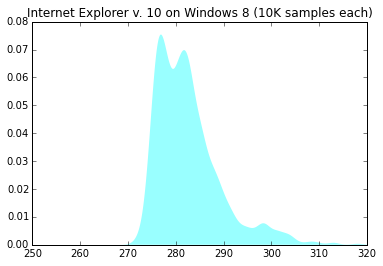

In [37]:
pyplot.xlim(250,320)
for i, t in enumerate(tests_ie_w8):
    n = len(t['data'])
    dev = numpy.std(t['data'])
    med = numpy.median(t['data'])
    v = t['browser_version']
    label = "v. %s (n=%.0f, std=%.0f, med=%.0f)" % (v, n, dev, med)
    d = t['data']
    alpha = (i+1.0) / len(tests_ie_w8)
    pyplot.fill_between(xs, histograma(d, .125), facecolor='cyan', linewidth=0, alpha=0.4)
    print "v.%s \t dev=%.0f ms \t med.=%.0f ms" % (v, dev, med)
pyplot.title("Internet Explorer v. 10 on Windows 8 (10K samples each)")
pyplot.show()

tests_ie_w8_all = []
for t in tests_ie_w8:
    tests_ie_w8_all += t['data']

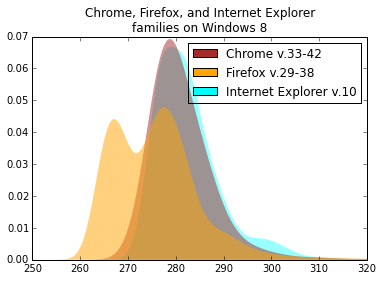

In [39]:
# Comparison
pyplot.xlim(250,320)
pyplot.title("Chrome, Firefox, and Internet Explorer\nfamilies on Windows 8")
pyplot.fill_between(xs, histograma_lognormal(tests_ie_w8_all), facecolor='cyan', linewidth=0, alpha=.4)
pyplot.fill_between(xs, histograma_lognormal(tests_chrome_w8_all), facecolor='brown', linewidth=0, alpha=.5)
pyplot.fill_between(xs, histograma_lognormal(tests_ff_w8_all), facecolor='orange', linewidth=0, alpha=.5)
p1 = Rectangle((0, 0), 1, 1, fc="brown", label="Chrome")
p2 = Rectangle((0, 0), 1, 1, fc="orange", label="Firefox")
p3 = Rectangle((0, 0), 1, 1, fc="cyan", label="Internet Explorer")
legend([p1, p2, p3], ["Chrome v.33-42", "Firefox v.29-38", "Internet Explorer v.10"])
pyplot.legend()
pyplot.show()

v.33 	 dev=7 ms 	 med.=273 ms (Δ=7 ms)
v.34 	 dev=7 ms 	 med.=282 ms (Δ=-2 ms)
v.35 	 dev=7 ms 	 med.=281 ms (Δ=-1 ms)
v.37 	 dev=13 ms 	 med.=272 ms (Δ=8 ms)
v.38 	 dev=8 ms 	 med.=280 ms (Δ=0 ms)
v.39 	 dev=12 ms 	 med.=268 ms (Δ=12 ms)
v.40 	 dev=19 ms 	 med.=268 ms (Δ=12 ms)
v.41 	 dev=31 ms 	 med.=269 ms (Δ=11 ms)
v.42 	 dev=15 ms 	 med.=280 ms (Δ=0 ms)
------------------------------
Tot. 	 dev=16 ms 	 med.=276 ms


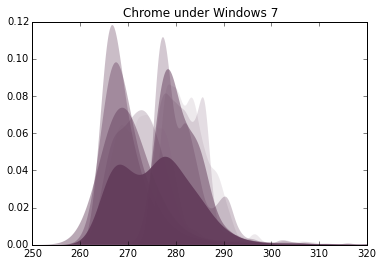

v.33 	 dev=7 ms 	 med.=273 ms (Δ=0 ms)
v.34 	 dev=7 ms 	 med.=282 ms (Δ=0 ms)
v.35 	 dev=7 ms 	 med.=281 ms (Δ=0 ms)
v.37 	 dev=13 ms 	 med.=272 ms (Δ=0 ms)
v.38 	 dev=8 ms 	 med.=280 ms (Δ=0 ms)
v.39 	 dev=12 ms 	 med.=268 ms (Δ=0 ms)
v.40 	 dev=19 ms 	 med.=268 ms (Δ=0 ms)
v.41 	 dev=31 ms 	 med.=269 ms (Δ=0 ms)
v.42 	 dev=15 ms 	 med.=280 ms (Δ=0 ms)
------------------------------
Tot. 	 dev=15 ms 	 med.=280 ms


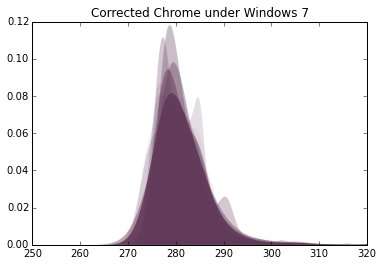

In [16]:
chart_result(tests_chrome_w7, "#623B5A", "Chrome under Windows 7", False)
chart_result(tests_chrome_w7, "#623B5A", "Corrected Chrome under Windows 7", True)

v.33 	 dev=5 ms 	 med.=272 ms (Δ=8 ms)
v.34 	 dev=5 ms 	 med.=272 ms (Δ=8 ms)
v.35 	 dev=5 ms 	 med.=272 ms (Δ=8 ms)
v.36 	 dev=10 ms 	 med.=261 ms (Δ=19 ms)
v.37 	 dev=16 ms 	 med.=262 ms (Δ=18 ms)
v.38 	 dev=12 ms 	 med.=260 ms (Δ=20 ms)
v.39 	 dev=14 ms 	 med.=271 ms (Δ=9 ms)
v.40 	 dev=5 ms 	 med.=262 ms (Δ=18 ms)
v.41 	 dev=10 ms 	 med.=261 ms (Δ=19 ms)
v.42 	 dev=9 ms 	 med.=273 ms (Δ=7 ms)
------------------------------
Tot. 	 dev=11 ms 	 med.=270 ms


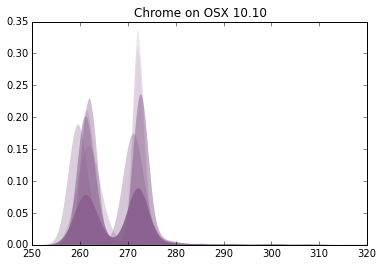

v.33 	 dev=5 ms 	 med.=272 ms (Δ=0 ms)
v.34 	 dev=5 ms 	 med.=272 ms (Δ=0 ms)
v.35 	 dev=5 ms 	 med.=272 ms (Δ=0 ms)
v.36 	 dev=10 ms 	 med.=261 ms (Δ=0 ms)
v.37 	 dev=16 ms 	 med.=262 ms (Δ=0 ms)
v.38 	 dev=12 ms 	 med.=260 ms (Δ=0 ms)
v.39 	 dev=14 ms 	 med.=271 ms (Δ=0 ms)
v.40 	 dev=5 ms 	 med.=262 ms (Δ=0 ms)
v.41 	 dev=10 ms 	 med.=261 ms (Δ=0 ms)
v.42 	 dev=9 ms 	 med.=273 ms (Δ=0 ms)
------------------------------
Tot. 	 dev=10 ms 	 med.=280 ms


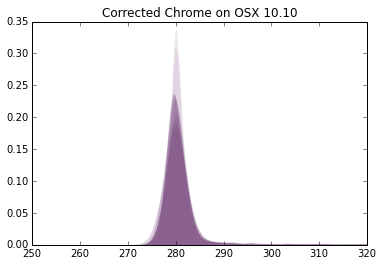

In [17]:
chart_result(tests_chrome_osx1010, "#89608E", "Chrome on OSX 10.10", False)
chart_result(tests_chrome_osx1010, "#89608E", "Corrected Chrome on OSX 10.10", True)

v.33 	 dev=13 ms 	 med.=283 ms (Δ=-3 ms)
v.34 	 dev=7 ms 	 med.=273 ms (Δ=7 ms)
v.35 	 dev=18 ms 	 med.=272 ms (Δ=8 ms)
v.36 	 dev=7 ms 	 med.=280 ms (Δ=0 ms)
v.37 	 dev=10 ms 	 med.=272 ms (Δ=8 ms)
v.38 	 dev=7 ms 	 med.=274 ms (Δ=6 ms)
v.39 	 dev=18 ms 	 med.=273 ms (Δ=7 ms)
v.40 	 dev=17 ms 	 med.=273 ms (Δ=7 ms)
v.41 	 dev=7 ms 	 med.=283 ms (Δ=-3 ms)
v.42 	 dev=7 ms 	 med.=272 ms (Δ=8 ms)
------------------------------
Tot. 	 dev=13 ms 	 med.=275 ms


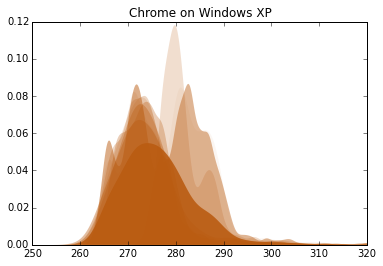

v.33 	 dev=13 ms 	 med.=283 ms (Δ=0 ms)
v.34 	 dev=7 ms 	 med.=273 ms (Δ=0 ms)
v.35 	 dev=18 ms 	 med.=272 ms (Δ=0 ms)
v.36 	 dev=7 ms 	 med.=280 ms (Δ=0 ms)
v.37 	 dev=10 ms 	 med.=272 ms (Δ=0 ms)
v.38 	 dev=7 ms 	 med.=274 ms (Δ=0 ms)
v.39 	 dev=18 ms 	 med.=273 ms (Δ=0 ms)
v.40 	 dev=17 ms 	 med.=273 ms (Δ=0 ms)
v.41 	 dev=7 ms 	 med.=283 ms (Δ=0 ms)
v.42 	 dev=7 ms 	 med.=272 ms (Δ=0 ms)
------------------------------
Tot. 	 dev=12 ms 	 med.=280 ms


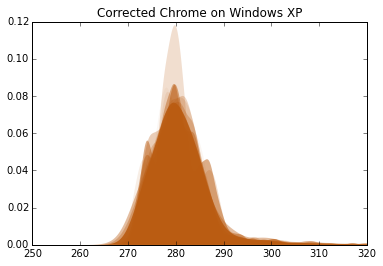

In [18]:
chart_result(tests_chrome_wxp, "#BA5C12", "Chrome on Windows XP", False)
chart_result(tests_chrome_wxp, "#BA5C12", "Corrected Chrome on Windows XP", True)

v.33 	 dev=18 ms 	 med.=284 ms (Δ=-4 ms)
v.34 	 dev=21 ms 	 med.=271 ms (Δ=9 ms)
v.35 	 dev=8 ms 	 med.=272 ms (Δ=8 ms)
v.36 	 dev=30 ms 	 med.=271 ms (Δ=9 ms)
v.37 	 dev=32 ms 	 med.=282 ms (Δ=-2 ms)
v.38 	 dev=19 ms 	 med.=280 ms (Δ=0 ms)
v.39 	 dev=7 ms 	 med.=280 ms (Δ=0 ms)
v.40 	 dev=10 ms 	 med.=282 ms (Δ=-2 ms)
v.41 	 dev=13 ms 	 med.=269 ms (Δ=11 ms)
v.42 	 dev=10 ms 	 med.=280 ms (Δ=0 ms)
------------------------------
Tot. 	 dev=20 ms 	 med.=278 ms


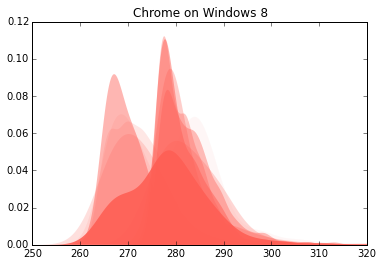

v.33 	 dev=18 ms 	 med.=284 ms (Δ=0 ms)
v.34 	 dev=21 ms 	 med.=271 ms (Δ=0 ms)
v.35 	 dev=8 ms 	 med.=272 ms (Δ=0 ms)
v.36 	 dev=30 ms 	 med.=271 ms (Δ=0 ms)
v.37 	 dev=32 ms 	 med.=282 ms (Δ=0 ms)
v.38 	 dev=19 ms 	 med.=280 ms (Δ=0 ms)
v.39 	 dev=7 ms 	 med.=280 ms (Δ=0 ms)
v.40 	 dev=10 ms 	 med.=282 ms (Δ=0 ms)
v.41 	 dev=13 ms 	 med.=269 ms (Δ=0 ms)
v.42 	 dev=10 ms 	 med.=280 ms (Δ=0 ms)
------------------------------
Tot. 	 dev=19 ms 	 med.=280 ms


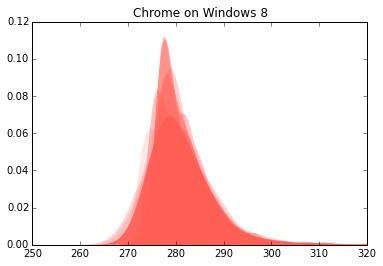

In [19]:
chart_result(tests_chrome_w8, "#FE5F55", "Chrome on Windows 8", False)
chart_result(tests_chrome_w8, "#FE5F55", "Chrome on Windows 8", True)

v.33 	 dev=13 ms 	 med.=283 ms (Δ=-3 ms)
v.34 	 dev=7 ms 	 med.=273 ms (Δ=7 ms)
v.35 	 dev=18 ms 	 med.=272 ms (Δ=8 ms)
v.36 	 dev=7 ms 	 med.=280 ms (Δ=0 ms)
v.37 	 dev=10 ms 	 med.=272 ms (Δ=8 ms)
v.38 	 dev=7 ms 	 med.=274 ms (Δ=6 ms)
v.39 	 dev=18 ms 	 med.=273 ms (Δ=7 ms)
v.40 	 dev=17 ms 	 med.=273 ms (Δ=7 ms)
v.41 	 dev=7 ms 	 med.=283 ms (Δ=-3 ms)
v.42 	 dev=7 ms 	 med.=272 ms (Δ=8 ms)
v.33 	 dev=7 ms 	 med.=273 ms (Δ=7 ms)
v.34 	 dev=7 ms 	 med.=282 ms (Δ=-2 ms)
v.35 	 dev=7 ms 	 med.=281 ms (Δ=-1 ms)
v.37 	 dev=13 ms 	 med.=272 ms (Δ=8 ms)
v.38 	 dev=8 ms 	 med.=280 ms (Δ=0 ms)
v.39 	 dev=12 ms 	 med.=268 ms (Δ=12 ms)
v.40 	 dev=19 ms 	 med.=268 ms (Δ=12 ms)
v.41 	 dev=31 ms 	 med.=269 ms (Δ=11 ms)
v.42 	 dev=15 ms 	 med.=280 ms (Δ=0 ms)
v.33 	 dev=18 ms 	 med.=284 ms (Δ=-4 ms)
v.34 	 dev=21 ms 	 med.=271 ms (Δ=9 ms)
v.35 	 dev=8 ms 	 med.=272 ms (Δ=8 ms)
v.36 	 dev=30 ms 	 med.=271 ms (Δ=9 ms)
v.37 	 dev=32 ms 	 med.=282 ms (Δ=-2 ms)
v.38 	 dev=19 ms 	 med.=280 ms (Δ=0 ms)
v

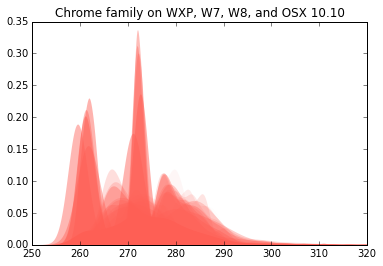

v.33 	 dev=13 ms 	 med.=283 ms (Δ=0 ms)
v.34 	 dev=7 ms 	 med.=273 ms (Δ=0 ms)
v.35 	 dev=18 ms 	 med.=272 ms (Δ=0 ms)
v.36 	 dev=7 ms 	 med.=280 ms (Δ=0 ms)
v.37 	 dev=10 ms 	 med.=272 ms (Δ=0 ms)
v.38 	 dev=7 ms 	 med.=274 ms (Δ=0 ms)
v.39 	 dev=18 ms 	 med.=273 ms (Δ=0 ms)
v.40 	 dev=17 ms 	 med.=273 ms (Δ=0 ms)
v.41 	 dev=7 ms 	 med.=283 ms (Δ=0 ms)
v.42 	 dev=7 ms 	 med.=272 ms (Δ=0 ms)
v.33 	 dev=7 ms 	 med.=273 ms (Δ=0 ms)
v.34 	 dev=7 ms 	 med.=282 ms (Δ=0 ms)
v.35 	 dev=7 ms 	 med.=281 ms (Δ=0 ms)
v.37 	 dev=13 ms 	 med.=272 ms (Δ=0 ms)
v.38 	 dev=8 ms 	 med.=280 ms (Δ=0 ms)
v.39 	 dev=12 ms 	 med.=268 ms (Δ=0 ms)
v.40 	 dev=19 ms 	 med.=268 ms (Δ=0 ms)
v.41 	 dev=31 ms 	 med.=269 ms (Δ=0 ms)
v.42 	 dev=15 ms 	 med.=280 ms (Δ=0 ms)
v.33 	 dev=18 ms 	 med.=284 ms (Δ=0 ms)
v.34 	 dev=21 ms 	 med.=271 ms (Δ=0 ms)
v.35 	 dev=8 ms 	 med.=272 ms (Δ=0 ms)
v.36 	 dev=30 ms 	 med.=271 ms (Δ=0 ms)
v.37 	 dev=32 ms 	 med.=282 ms (Δ=0 ms)
v.38 	 dev=19 ms 	 med.=280 ms (Δ=0 ms)
v.39 	 dev

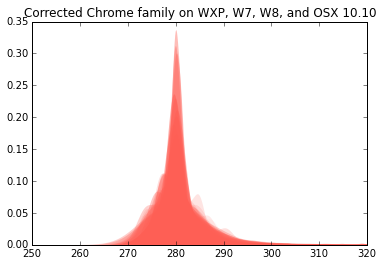

In [20]:
chart_result(tests_chrome_wxp+tests_chrome_w7+tests_chrome_w8+tests_chrome_osx1010, "#FE5F55", "Chrome family on WXP, W7, W8, and OSX 10.10", False)
chart_result(tests_chrome_wxp+tests_chrome_w7+tests_chrome_w8+tests_chrome_osx1010, "#FE5F55", "Corrected Chrome family on WXP, W7, W8, and OSX 10.10", True)

# How does performance vary throughout the day?
When running the test suit multiple times, we perceived that the tests results changed slightly. Our aim now is to measure *how much* do they change, and in what quantities throughout the time-of-day (and probably the day-of-week).

v.39 	 dev=9 ms 	 med.=270 ms (Δ=10 ms)
v.39 	 dev=12 ms 	 med.=281 ms (Δ=-1 ms)
v.39 	 dev=117 ms 	 med.=272 ms (Δ=8 ms)
v.39 	 dev=11 ms 	 med.=262 ms (Δ=18 ms)
------------------------------
Tot. 	 dev=60 ms 	 med.=271 ms


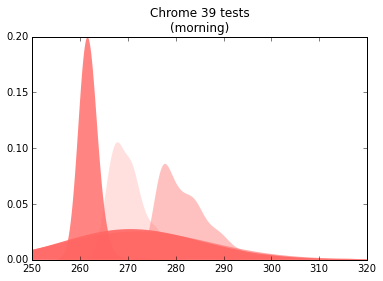

v.39 	 dev=27 ms 	 med.=270 ms (Δ=10 ms)
v.39 	 dev=21 ms 	 med.=268 ms (Δ=12 ms)
v.39 	 dev=8 ms 	 med.=270 ms (Δ=10 ms)
v.39 	 dev=14 ms 	 med.=261 ms (Δ=19 ms)
------------------------------
Tot. 	 dev=19 ms 	 med.=267 ms


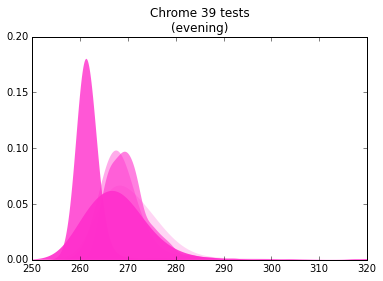

v.39 	 dev=28 ms 	 med.=279 ms (Δ=1 ms)
v.39 	 dev=16 ms 	 med.=281 ms (Δ=-1 ms)
v.39 	 dev=7 ms 	 med.=282 ms (Δ=-2 ms)
v.39 	 dev=5 ms 	 med.=273 ms (Δ=7 ms)
------------------------------
Tot. 	 dev=17 ms 	 med.=279 ms


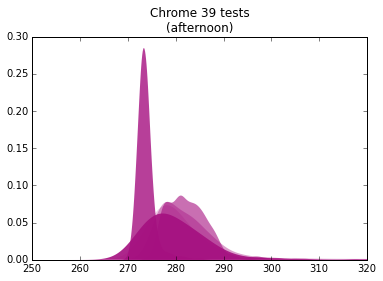

v.39 	 dev=9 ms 	 med.=270 ms (Δ=10 ms)
v.39 	 dev=12 ms 	 med.=281 ms (Δ=-1 ms)
v.39 	 dev=117 ms 	 med.=272 ms (Δ=8 ms)
v.39 	 dev=11 ms 	 med.=262 ms (Δ=18 ms)
v.39 	 dev=27 ms 	 med.=270 ms (Δ=10 ms)
v.39 	 dev=21 ms 	 med.=268 ms (Δ=12 ms)
v.39 	 dev=8 ms 	 med.=270 ms (Δ=10 ms)
v.39 	 dev=14 ms 	 med.=261 ms (Δ=19 ms)
v.39 	 dev=28 ms 	 med.=279 ms (Δ=1 ms)
v.39 	 dev=16 ms 	 med.=281 ms (Δ=-1 ms)
v.39 	 dev=7 ms 	 med.=282 ms (Δ=-2 ms)
v.39 	 dev=5 ms 	 med.=273 ms (Δ=7 ms)
------------------------------
Tot. 	 dev=38 ms 	 med.=273 ms


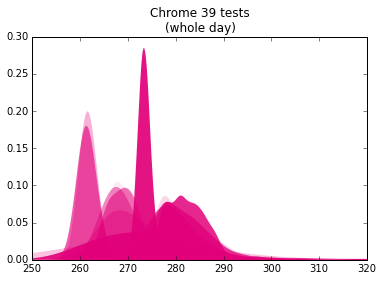

In [36]:
# Tests running in the morning
chart_result(tests_chrome_39, "#FF6663", "Chrome 39 tests\n(morning)", correct=False)

# Tests running in the evening
chart_result(tests_chrome_39_2, "#FF2ECC", "Chrome 39 tests\n(evening)", correct=False)

# Tests running in the afternoon
chart_result(tests_chrome_39_3, "#A51080", "Chrome 39 tests\n(afternoon)", correct=False)

chart_result(tests_chrome_39+tests_chrome_39_2+tests_chrome_39_3, "#E1007A", "Chrome 39 tests\n(whole day)", correct=False)